## UNIDAD 8 
# Matplotlib<br> 
Es el paquete Python más utilizado en el ámbito de la ciencia de datos para
representaciones gráficas<br>
Source https://aprendepython.es/pypi/datascience/matplotlib/
       https://interactivechaos.com/es/manual/tutorial-de-matplotlib/grid

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

Figura<br>
La figura es el elemento base sobre el que se construyen todos los gráficos en matplotlib.

In [98]:
fig = plt.figure()
type(fig)


matplotlib.figure.Figure

<Figure size 5760x3240 with 0 Axes>

La resolución final de una figura viene determinada por su altura (height) y anchura (width)<br>
especificadas en pulgadas que, a su vez, se multiplican por los puntos por pulgada o dpi.<br>
Veamos el funcionamiento:<br>

In [99]:
fig

<Figure size 5760x3240 with 0 Axes>

In [100]:
fig.get_figwidth()

19.2

In [101]:
fig.get_figheight()

10.8

In [102]:
fig.get_dpi()

300.0

Por tanto, cuando creamos una figura podemos modificar los parámetros por defecto para
obtener la resolución deseada:

In [103]:
fig = plt.figure(figsize=(19.2, 10.8)) # 100 dpi


fig = plt.figure(figsize=(19.2, 10.8), dpi=300)


<Figure size 5760x3240 with 0 Axes>

<Figure size 5760x3240 with 0 Axes>

Si nos interesa que cualquier figura tome unos valores concretos de resolución, podemos
modificar los valores por defecto del entorno. Para ello, matplotlib hace uso de un
diccionario plt.rcParams que contiene los parámetros globales de configuración. Veamos
cómo modificarlo:

In [104]:
plt.rcParams['figure.figsize'] = (19.2, 10.8)
plt.rcParams['figure.dpi'] = 300
print(fig.get_figwidth())
print(fig.get_figheight())
print(fig.dpi)

19.2
10.8
300


# Marcos <br>
Para poder empezar a graficar necesitamos tener, al menos, un marco. Utilizaremos la
función add_subplot() que requiere pasar como parámetros el número de filas, el número
de columnas y el marco activo:

<AxesSubplot: >

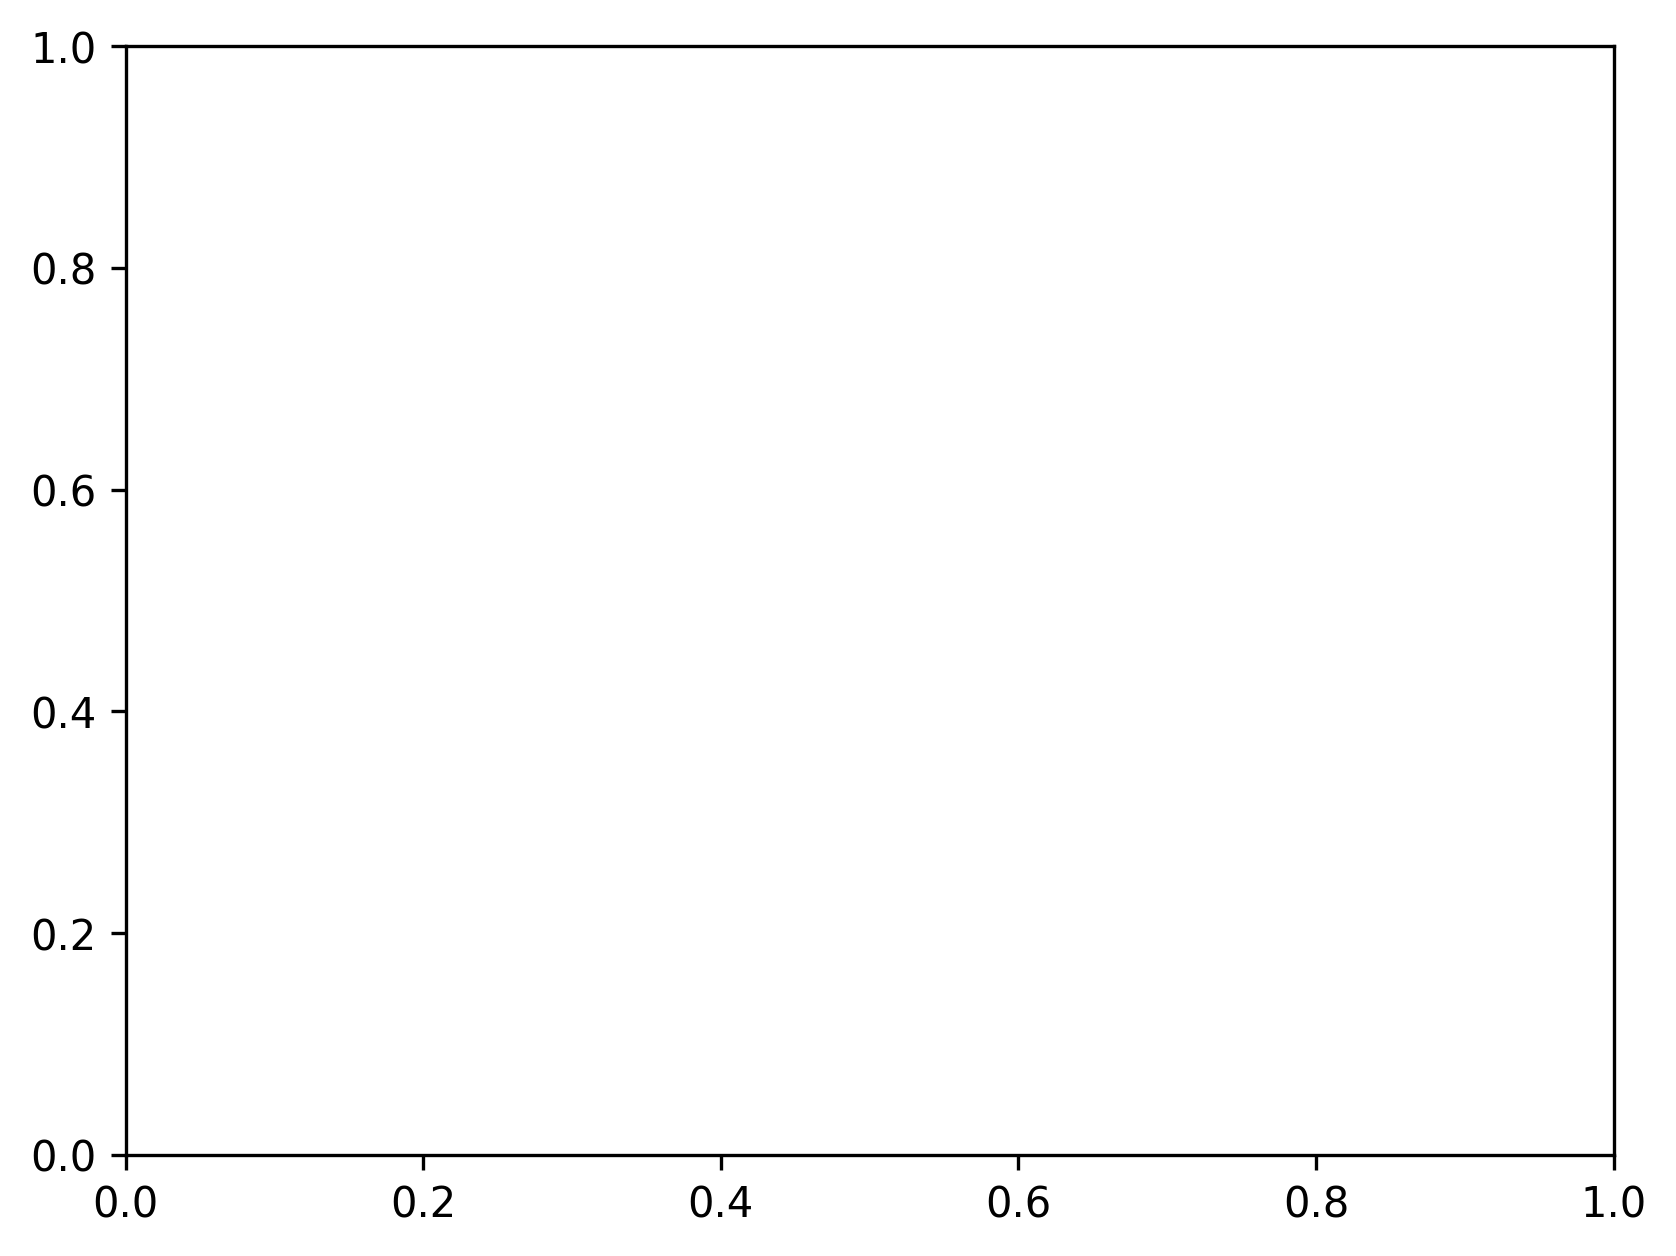

In [105]:
# Creando solo un marco
fig = plt.figure(figsize=(6.4, 4.8)) # 100 dpi

ax = fig.add_subplot(1,1,1) # idem (111)
ax 
# Truco: Suele ser habitual encontrar ax como nombre de variable del «axes» 
# devuelto por la función add_subplot().

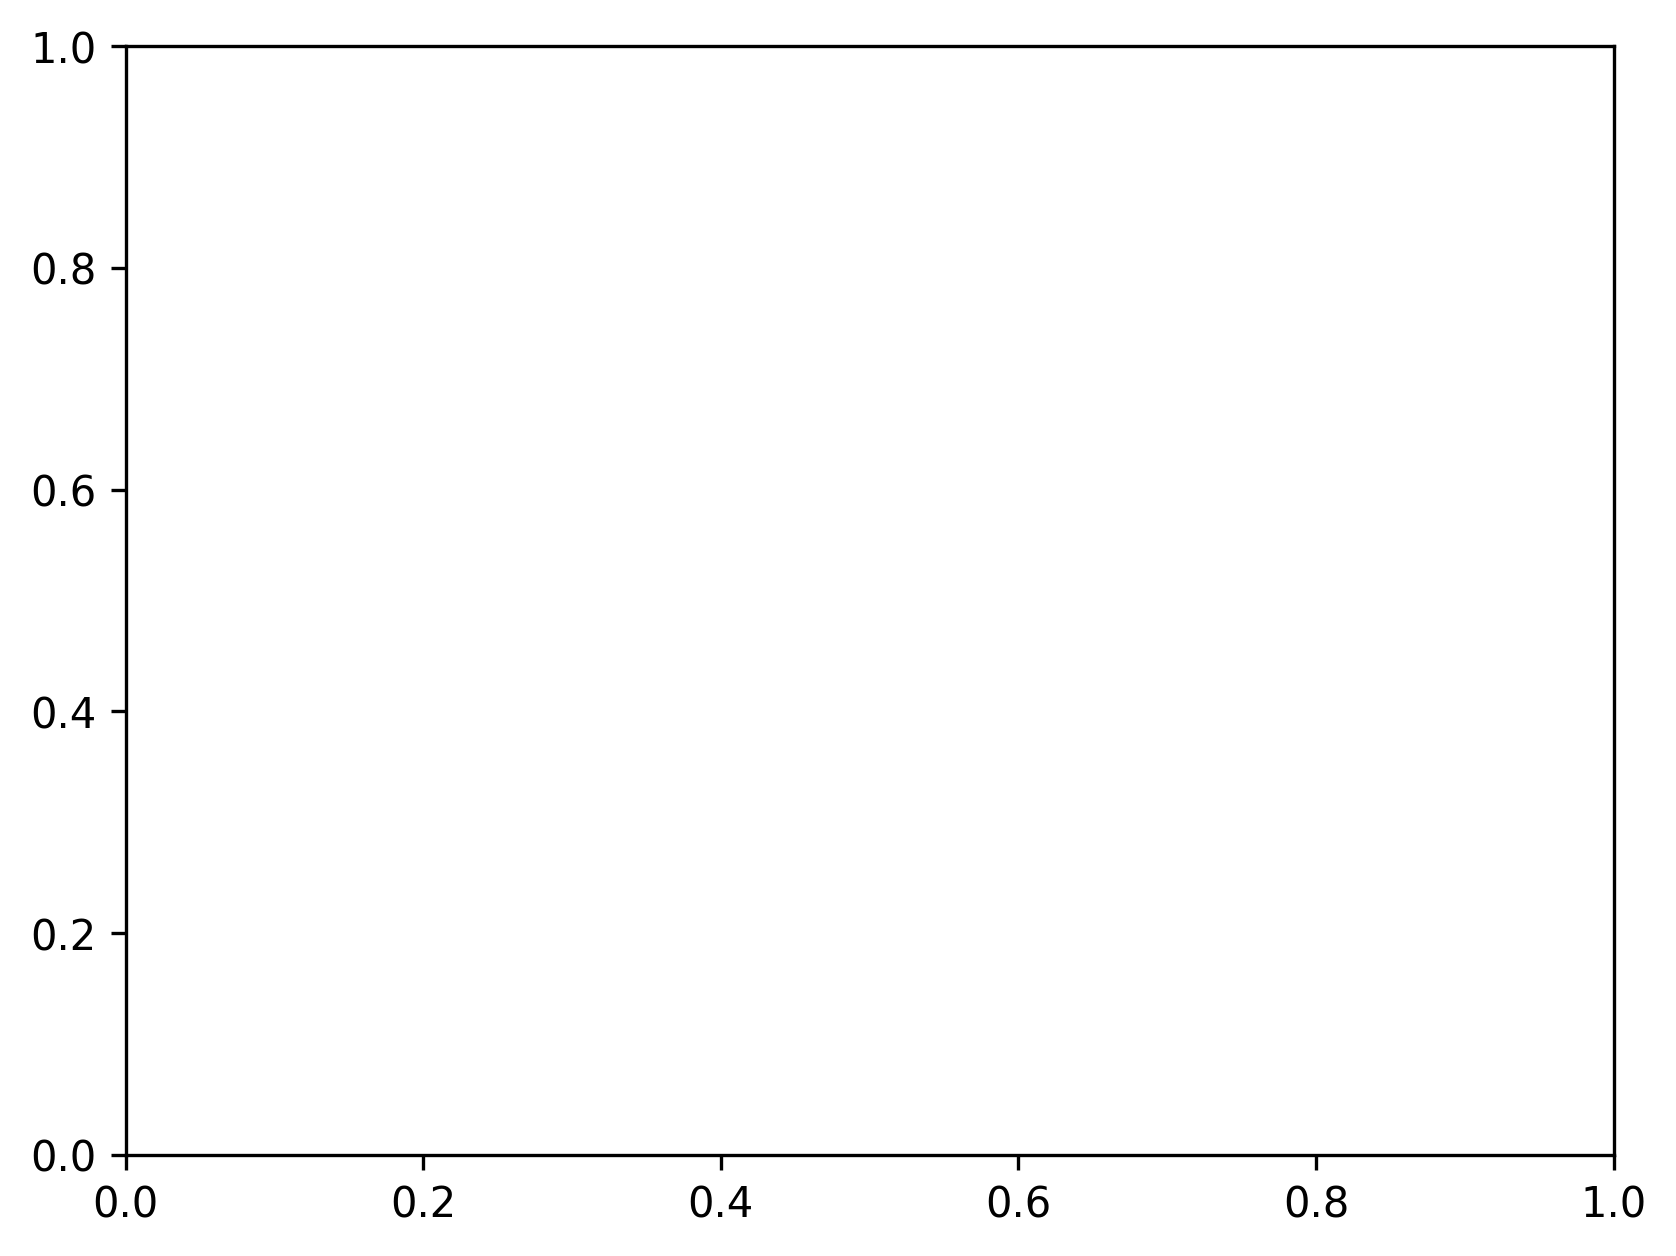

In [106]:
fig

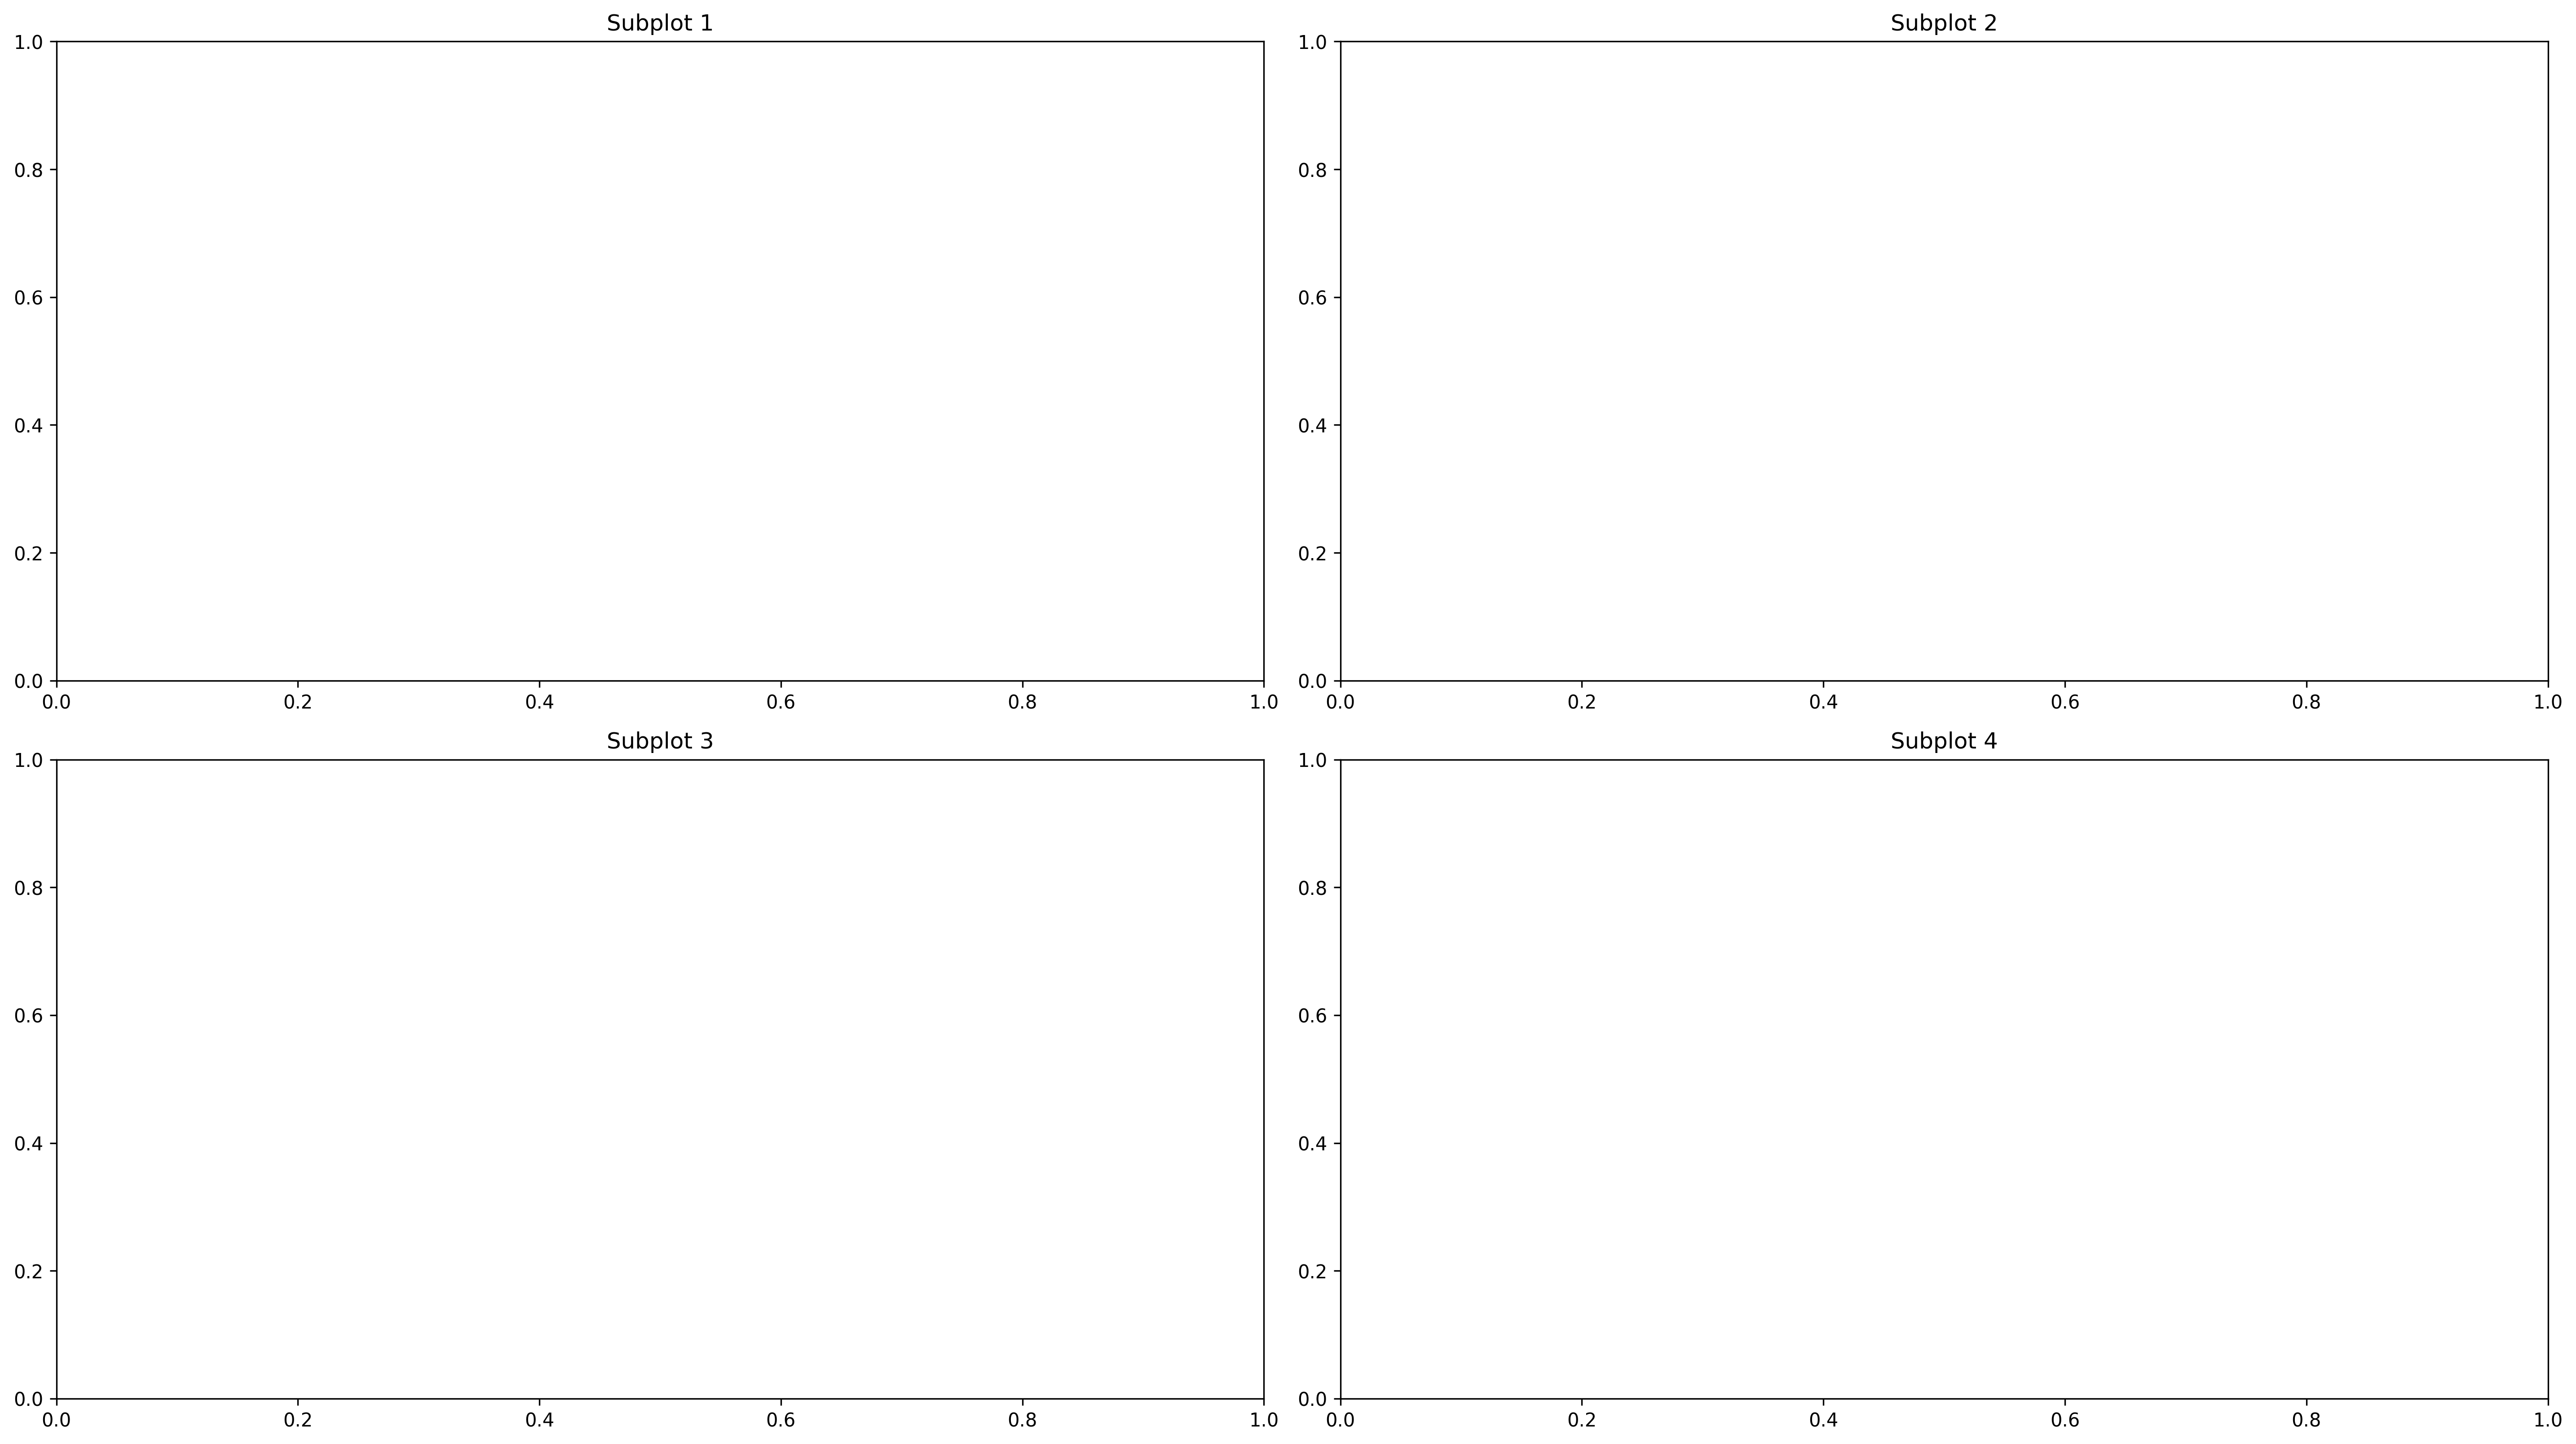

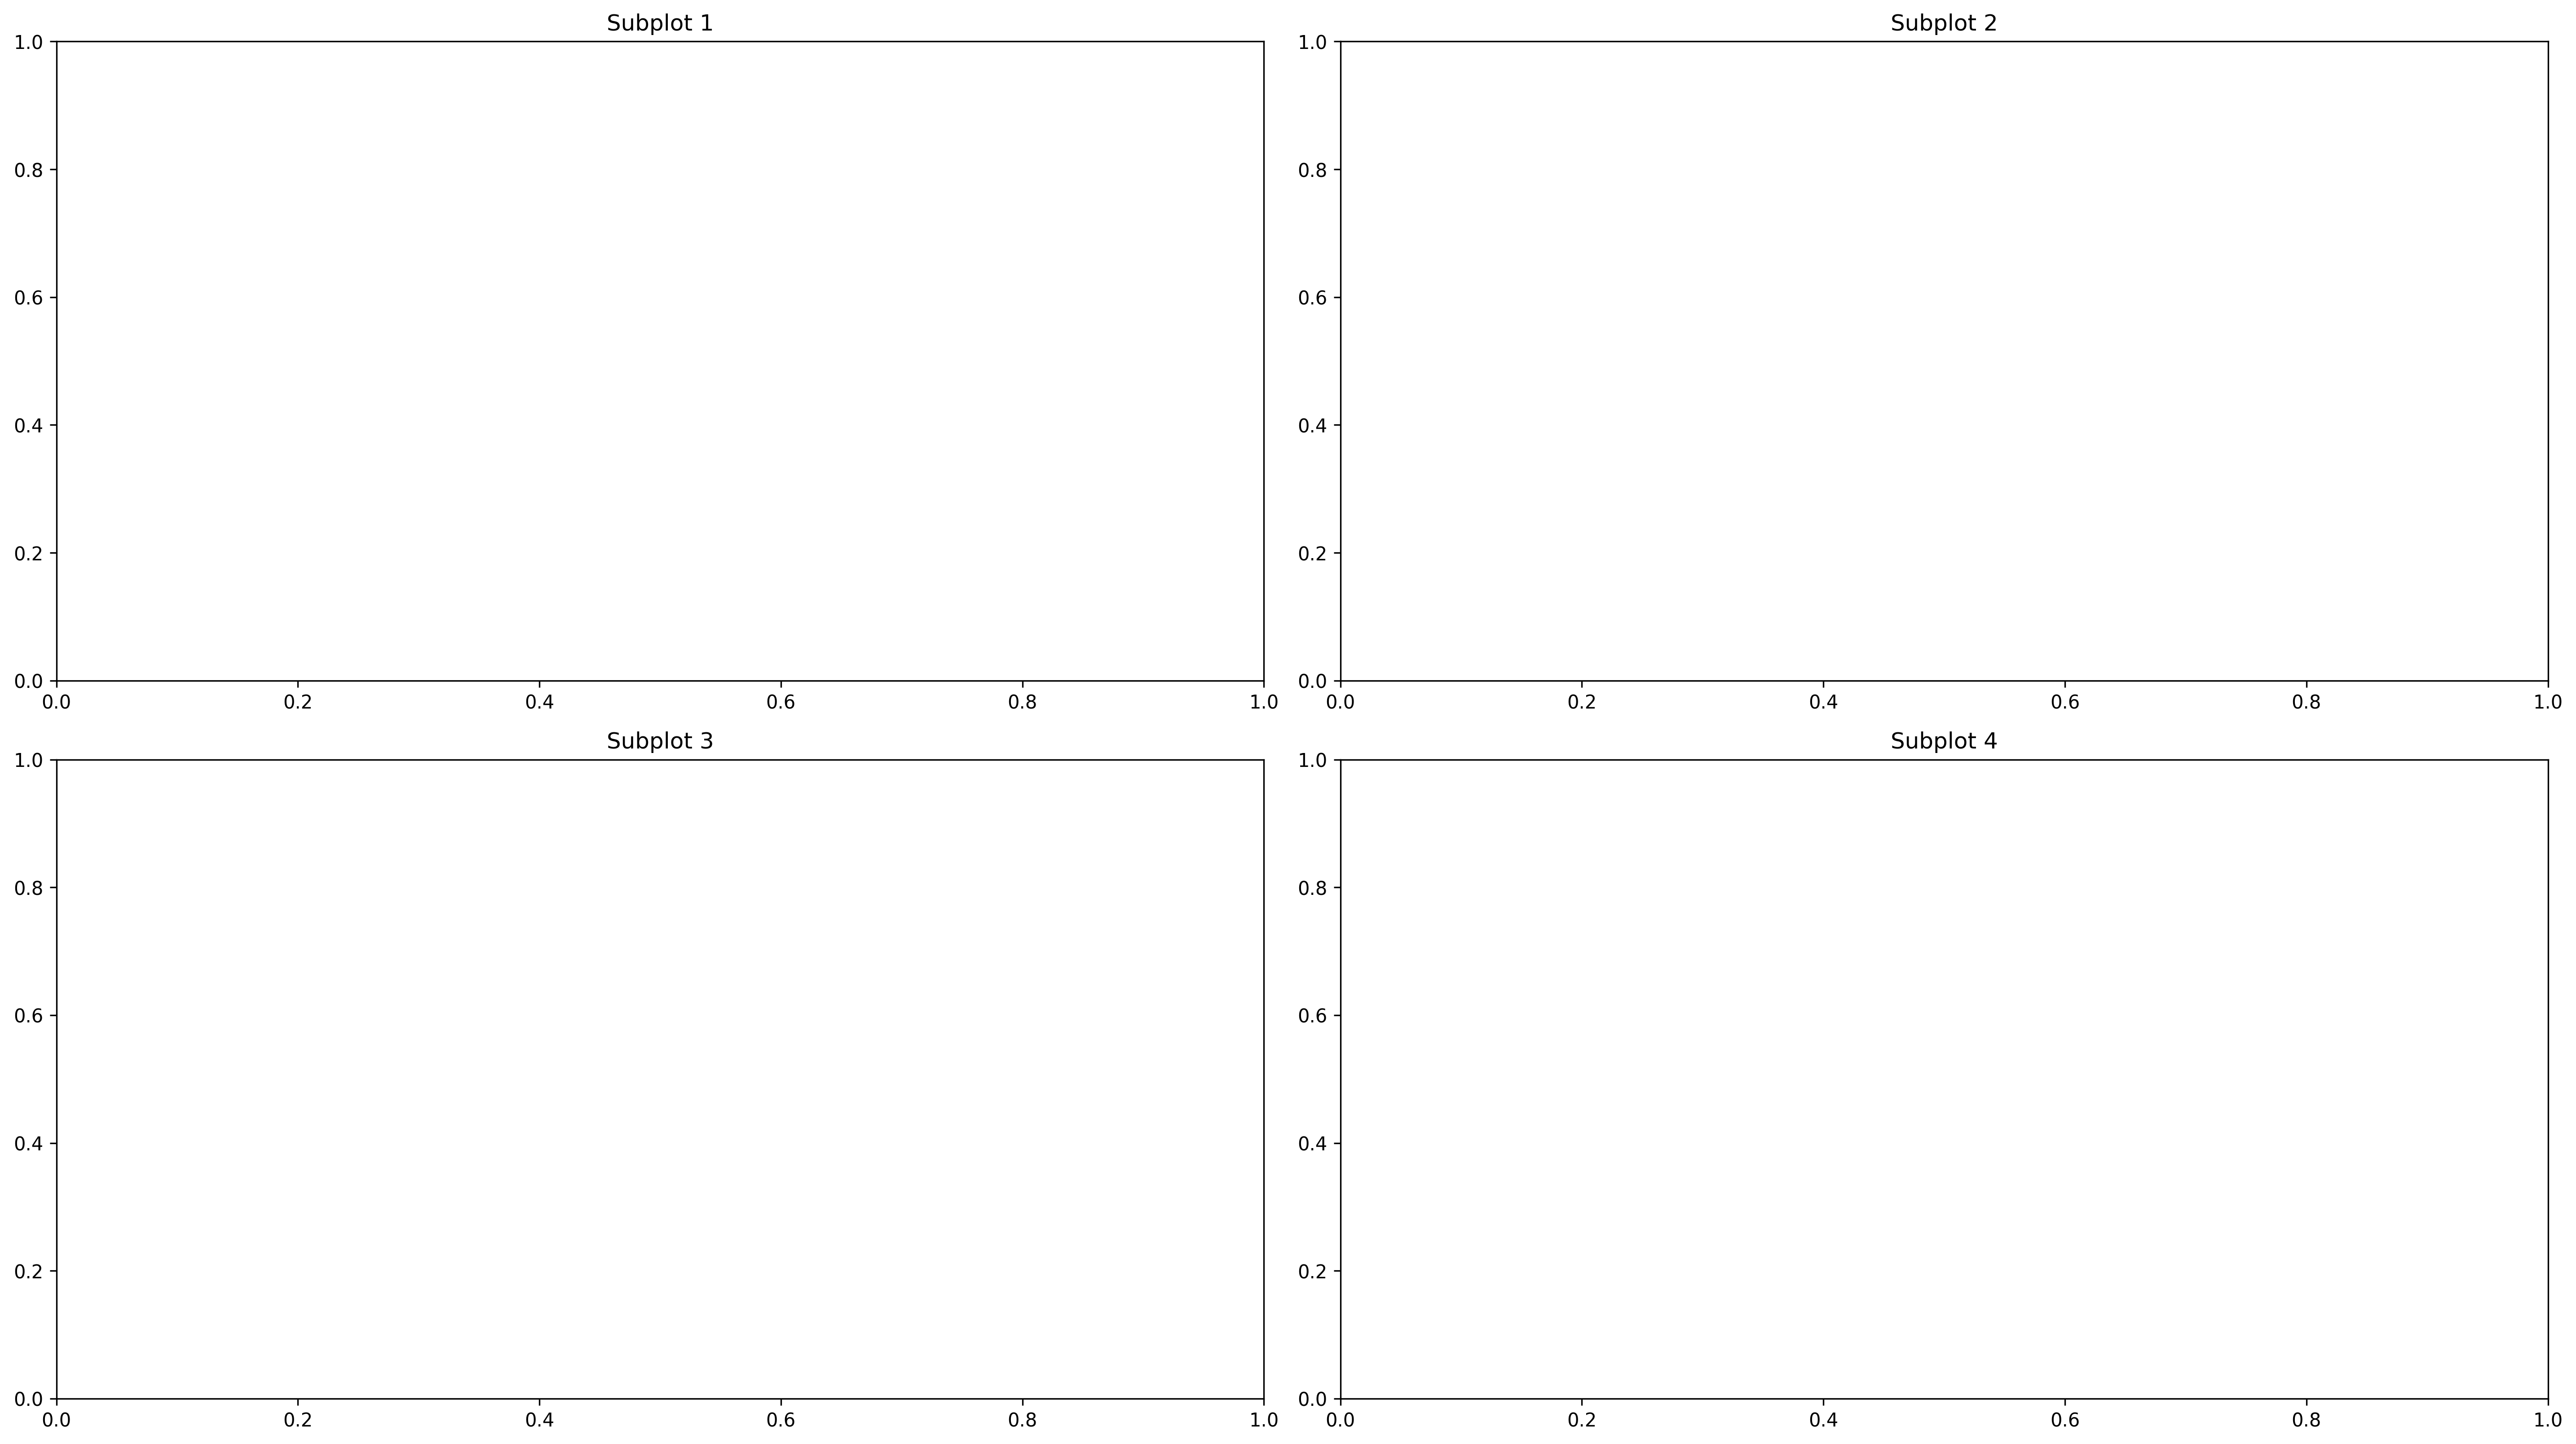

In [107]:
# Creando 4 marcos
fig = plt.figure() 
for i in range(1,5):
    ax = fig.add_subplot(2,2,i)
    ax.set_title(f'Subplot {i}')
fig.tight_layout(pad=1) # Ajusta el espacio entre los subplots
fig
    

Atajo para subgráficos <br>
Matplotlib nos ofrece una forma compacta de crear a la vez tanto la figura como los marcos
que necesitemos.<br>
Para ello utilizaremos la función plt.subplots() que recibe como parámetros el número de
filas y el número de columnas para la disposición de los marcos, y devuelve una tupla con la
figura y los marcos.

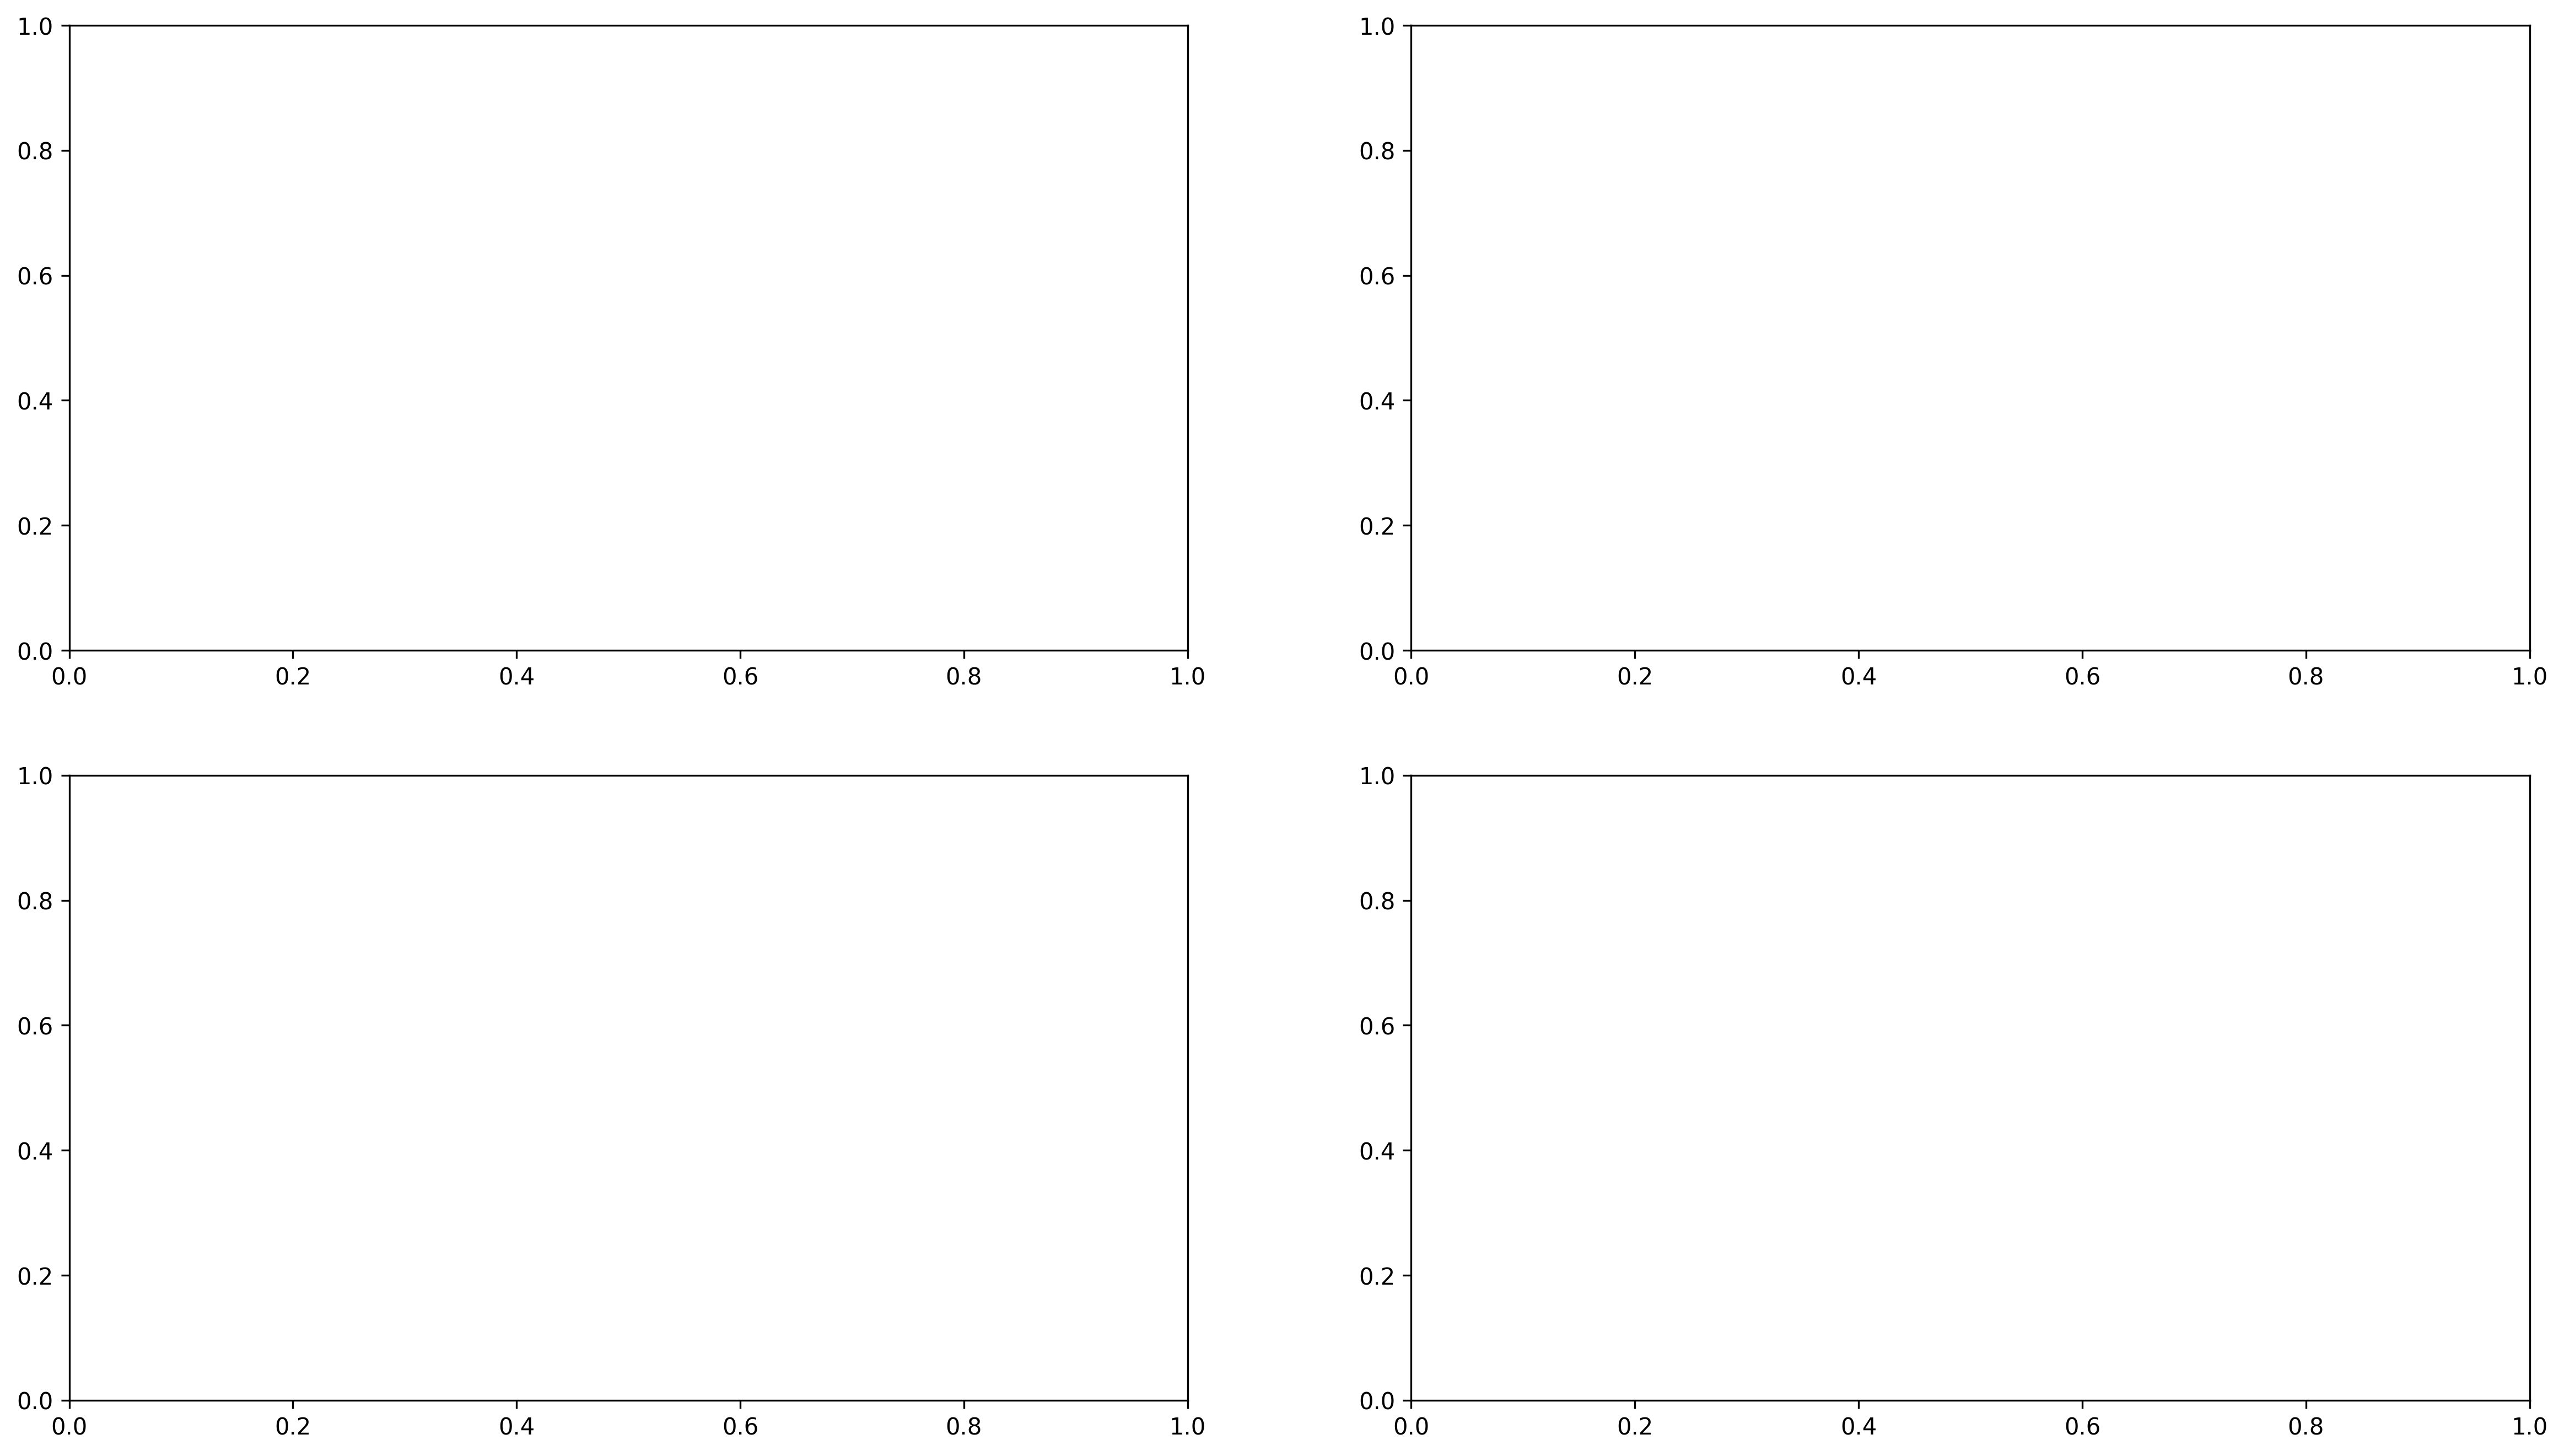

In [108]:
fig,ax = plt.subplots(2,2)

Etiquetas <br>
Dentro de un marco también es posible fijar las etiquetas de los ejes (X e Y). Veamos cómo
hacerlo:

Text(0, 0.5, 'Etiqueta para el eje Y')

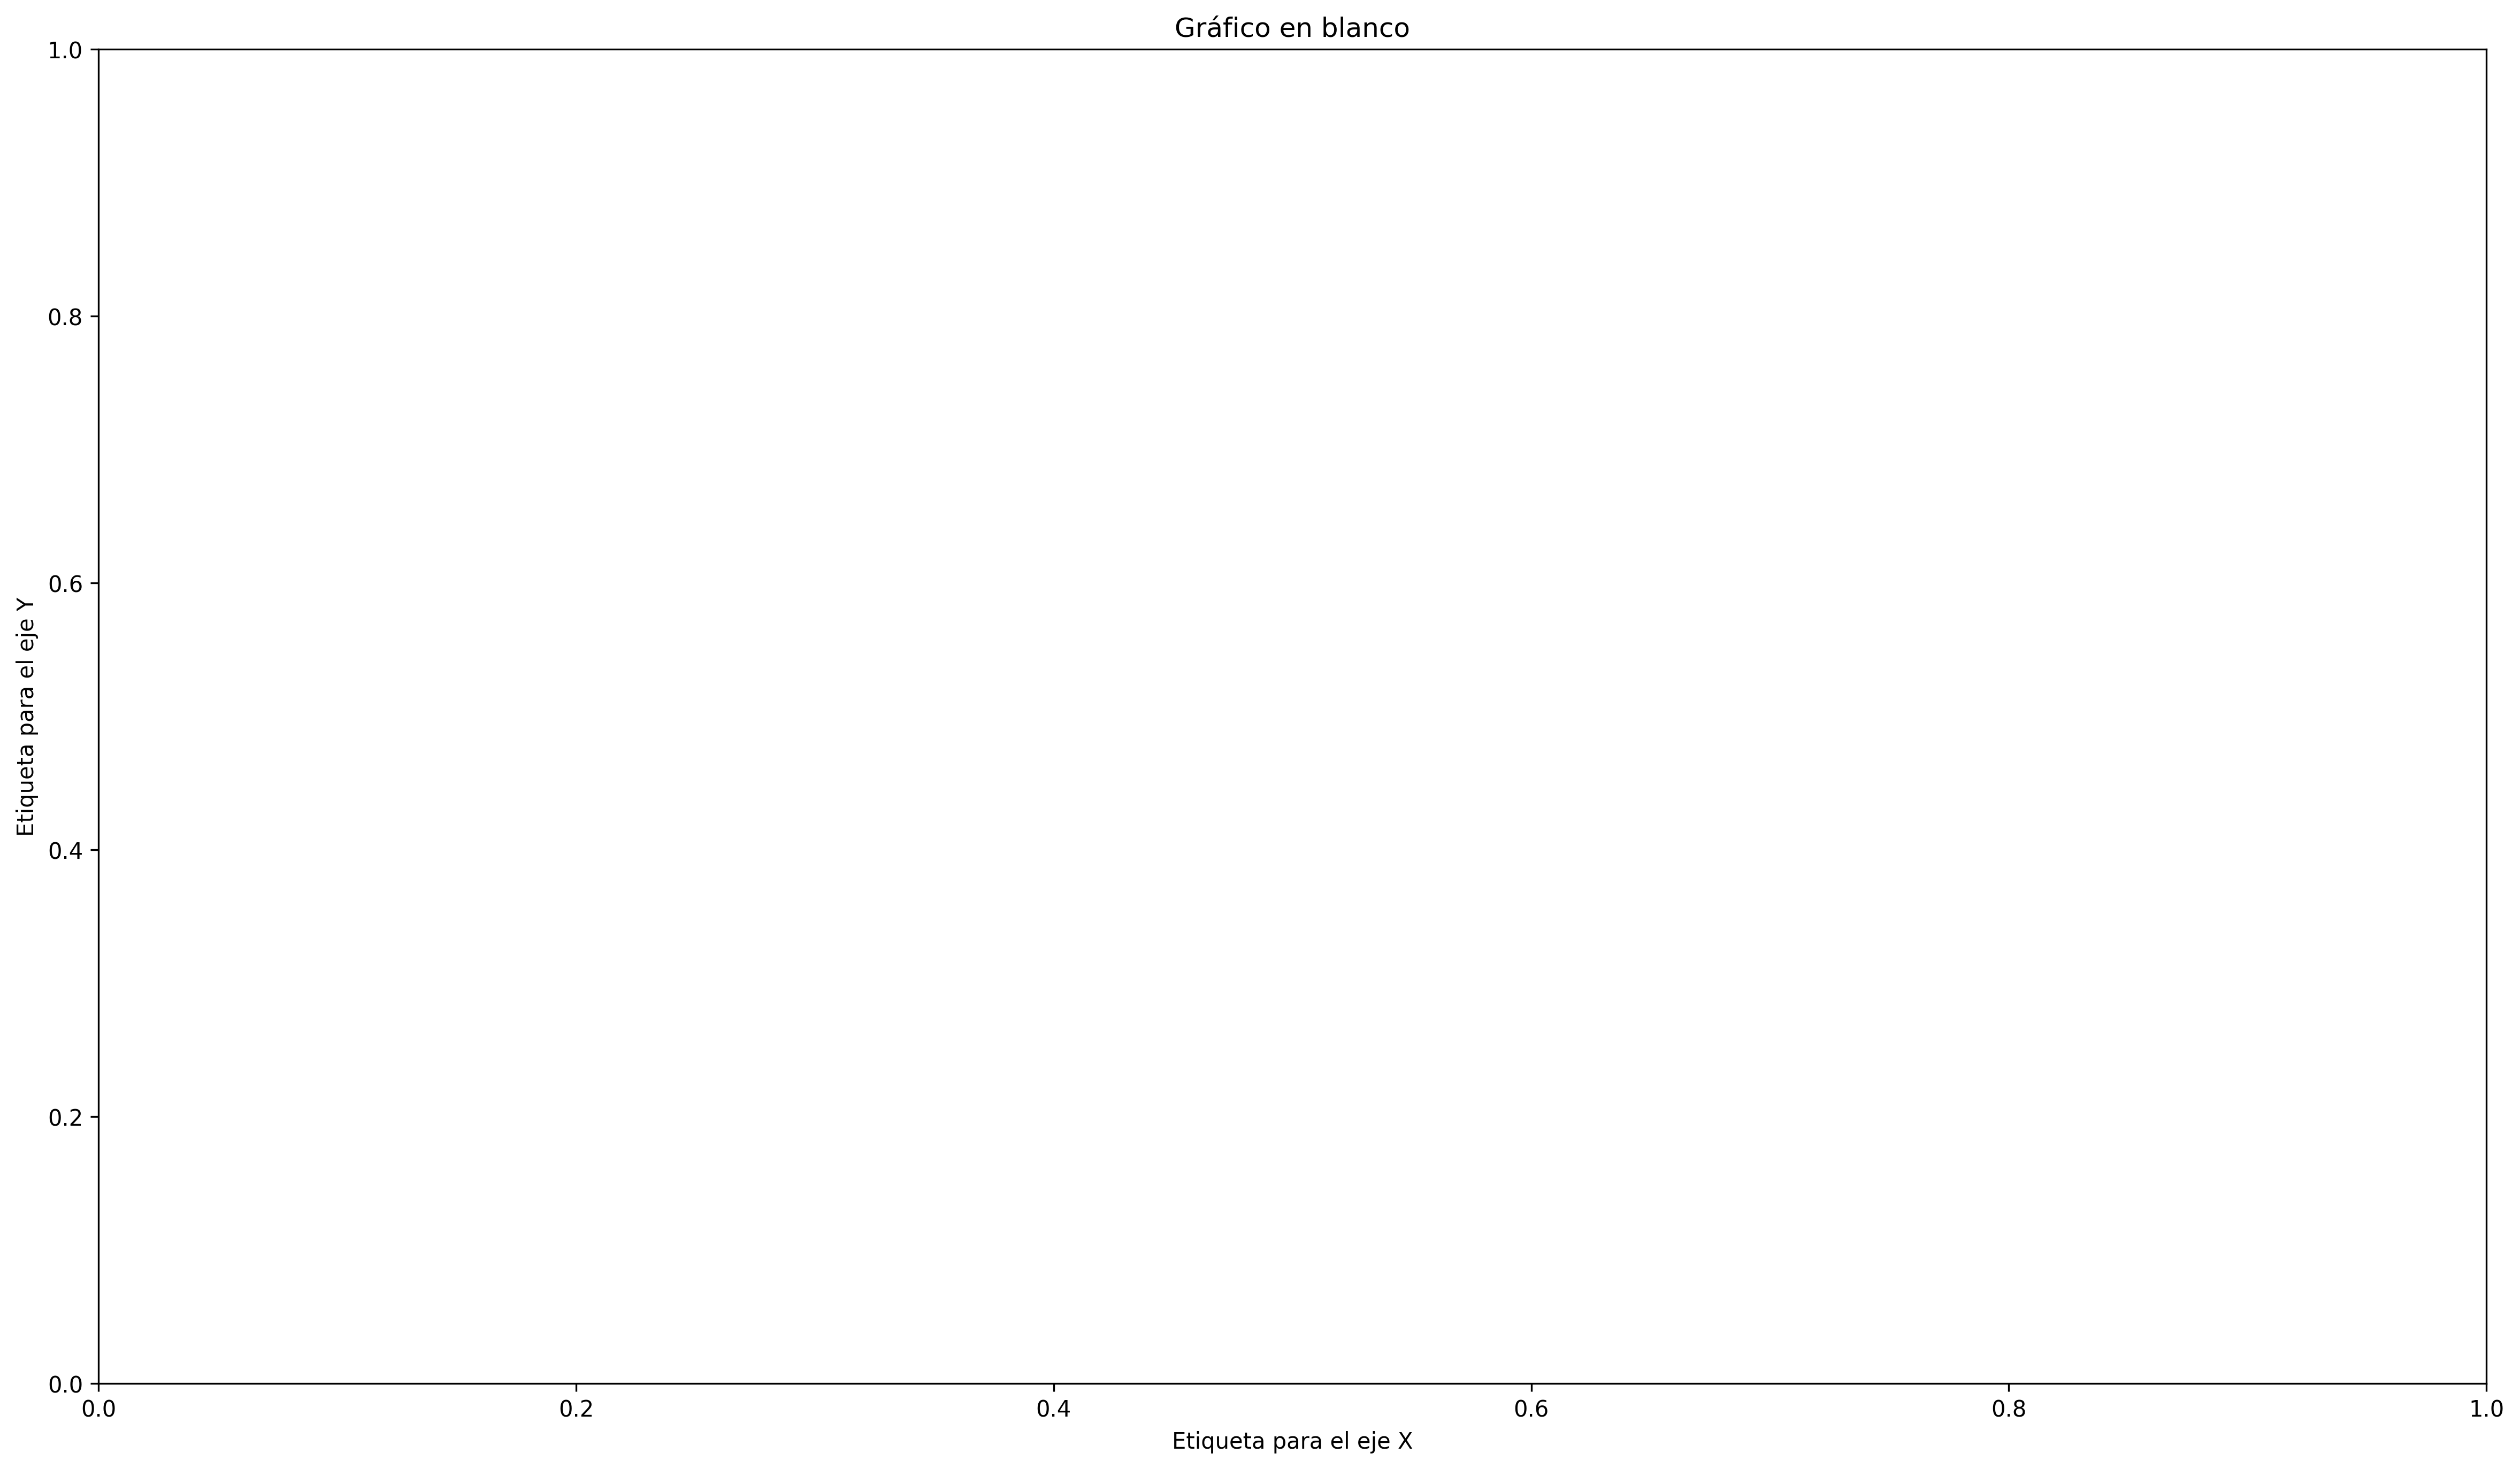

In [109]:
fig, ax = plt.subplots()
ax.set_title('Gráfico en blanco')

ax.set_xlabel('Etiqueta para el eje X')

ax.set_ylabel('Etiqueta para el eje Y')




Ejes<br>
Un marco (2D) está compuesto por dos ejes: eje X e eje Y. Podemos acceder a cada eje
mediante sendos atributos:

In [110]:
ax.xaxis

In [111]:
ax.yaxis

Rejilla<br>
En cada eje podemos activar o desactivar la rejilla, así como indicar su estilo.
En primer lugar vamos a activar la rejilla en ambos ejes:

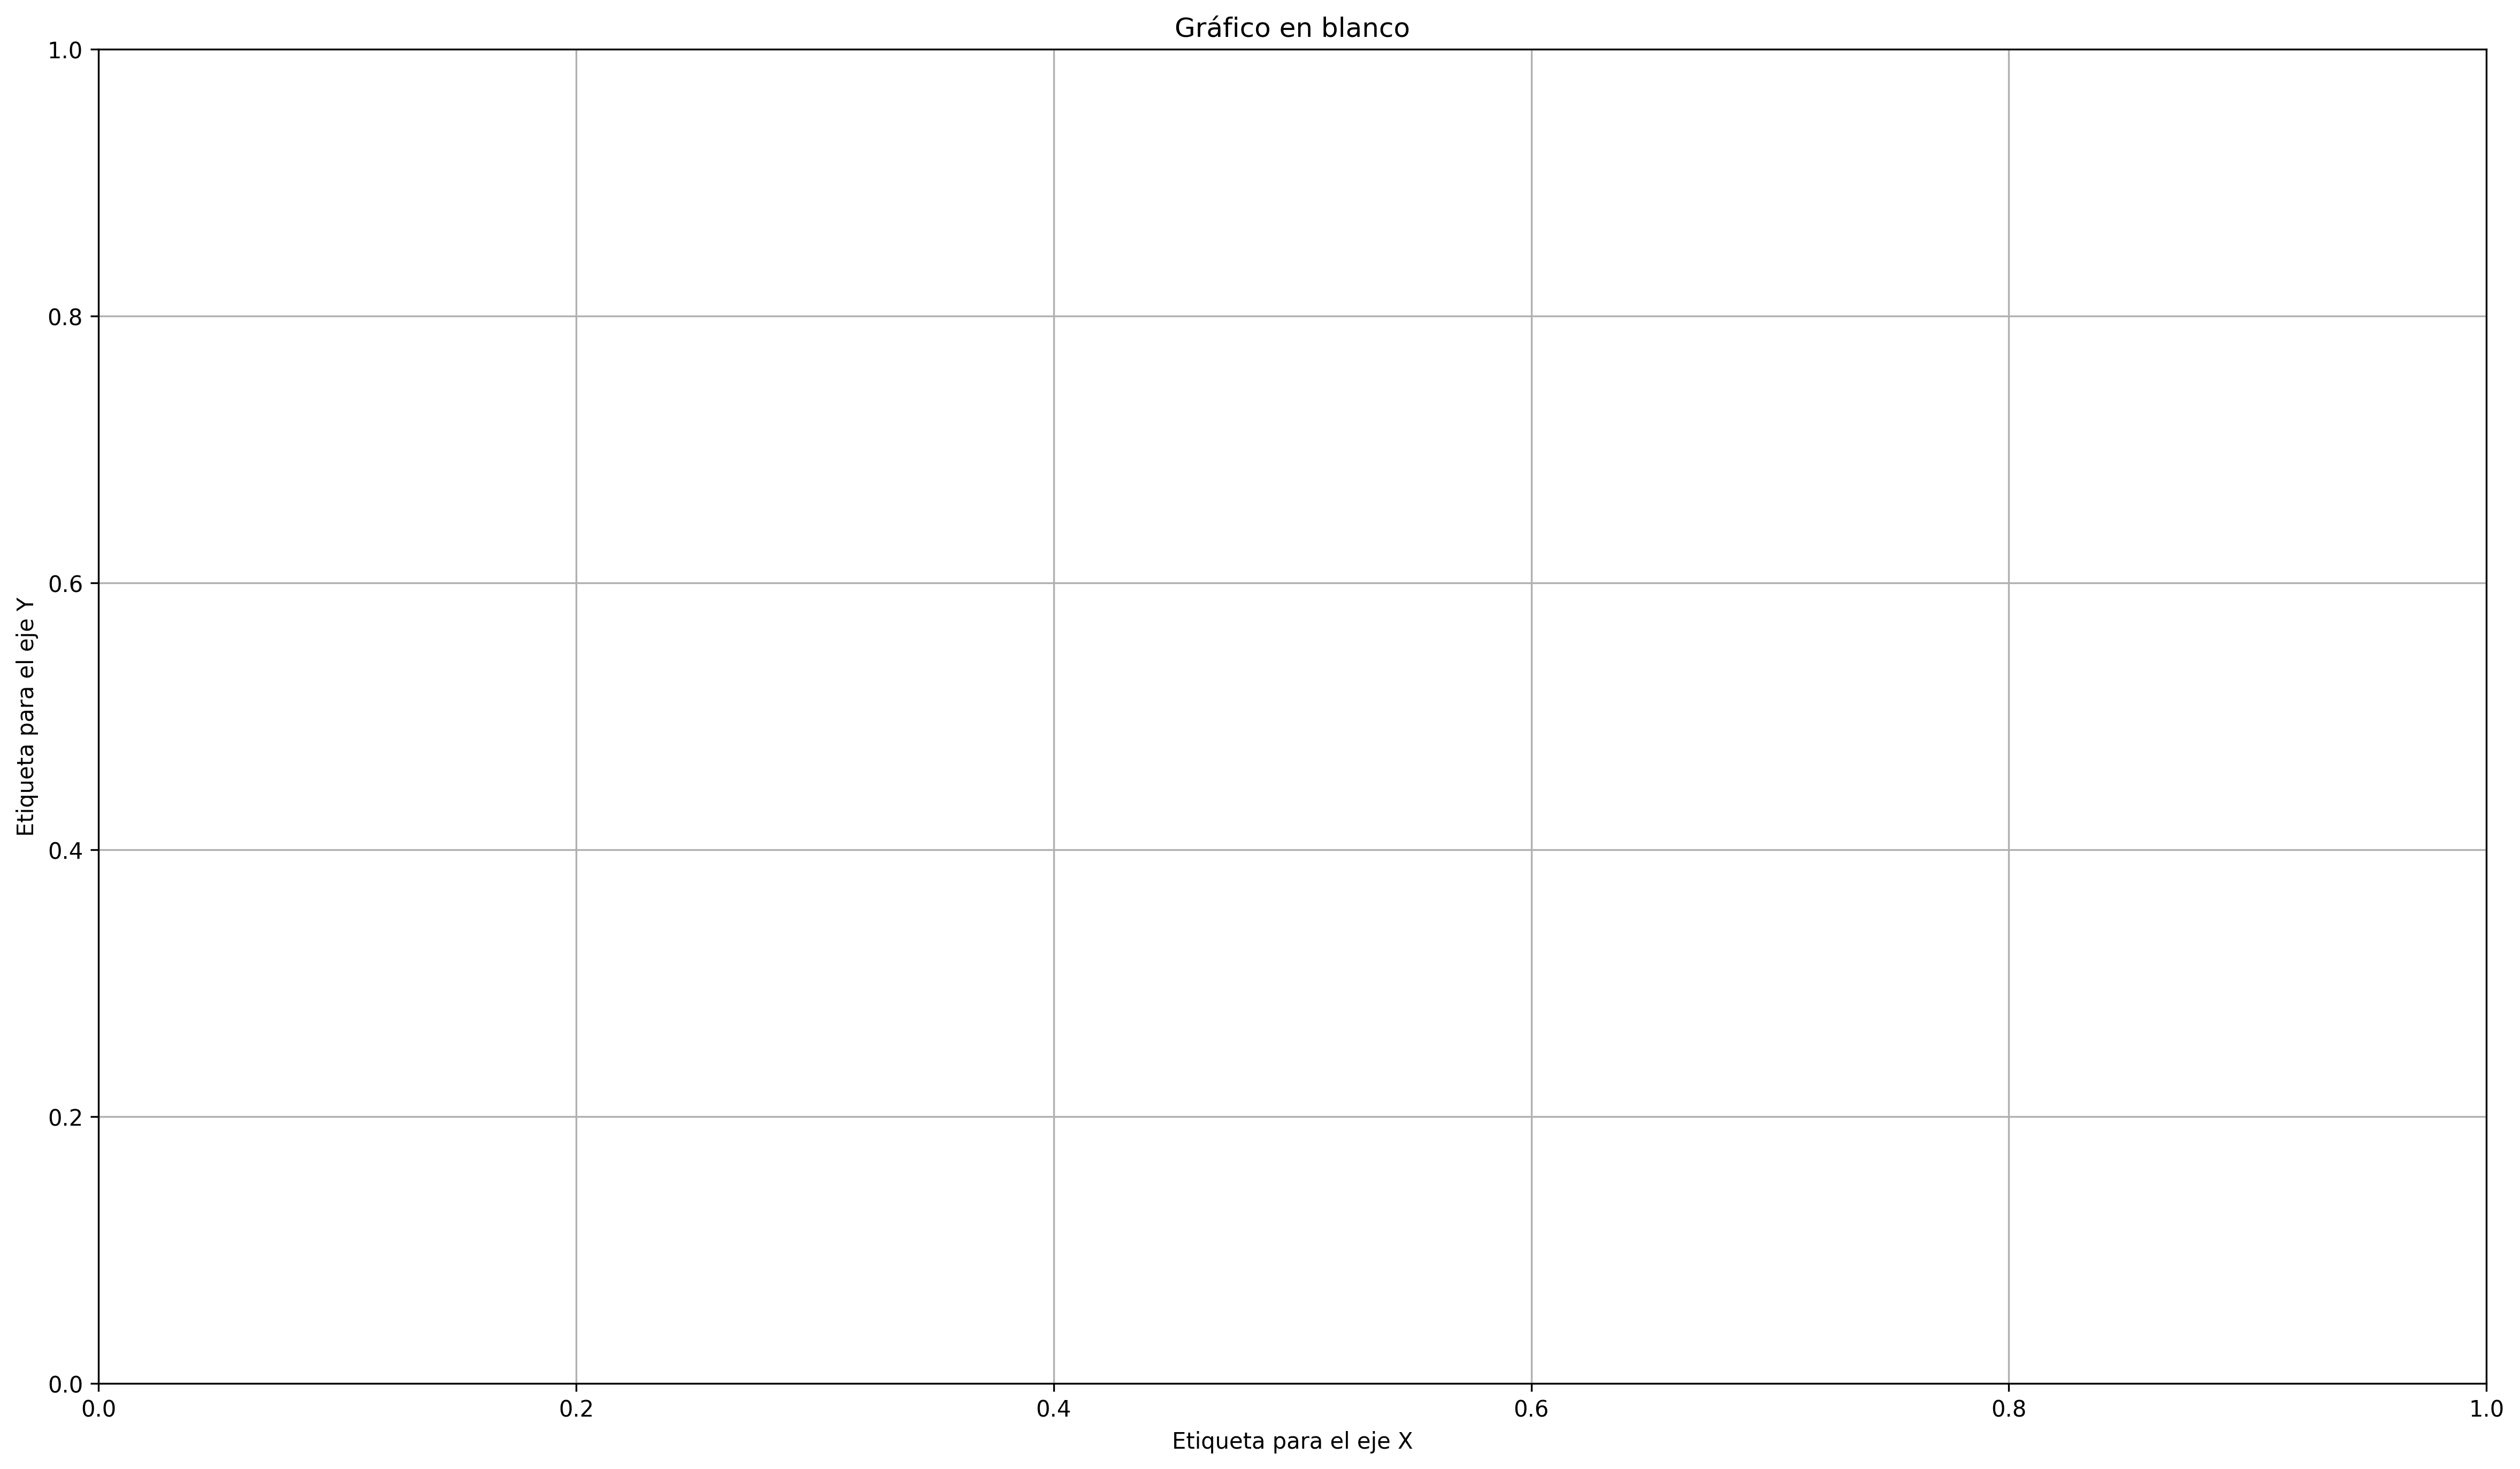

In [112]:
ax.xaxis.grid(True) 
ax.yaxis.grid(True)
# ax.grid(True) # idem
fig


Truco: Las funciones de matplotlib que actúan como «interruptores» tienen por defecto el
valor verdadero. En este sentido ax.grid() invocada sin parámetros hace que se muestre la
rejilla. Esto se puede aplicar a muchas otras funciones.


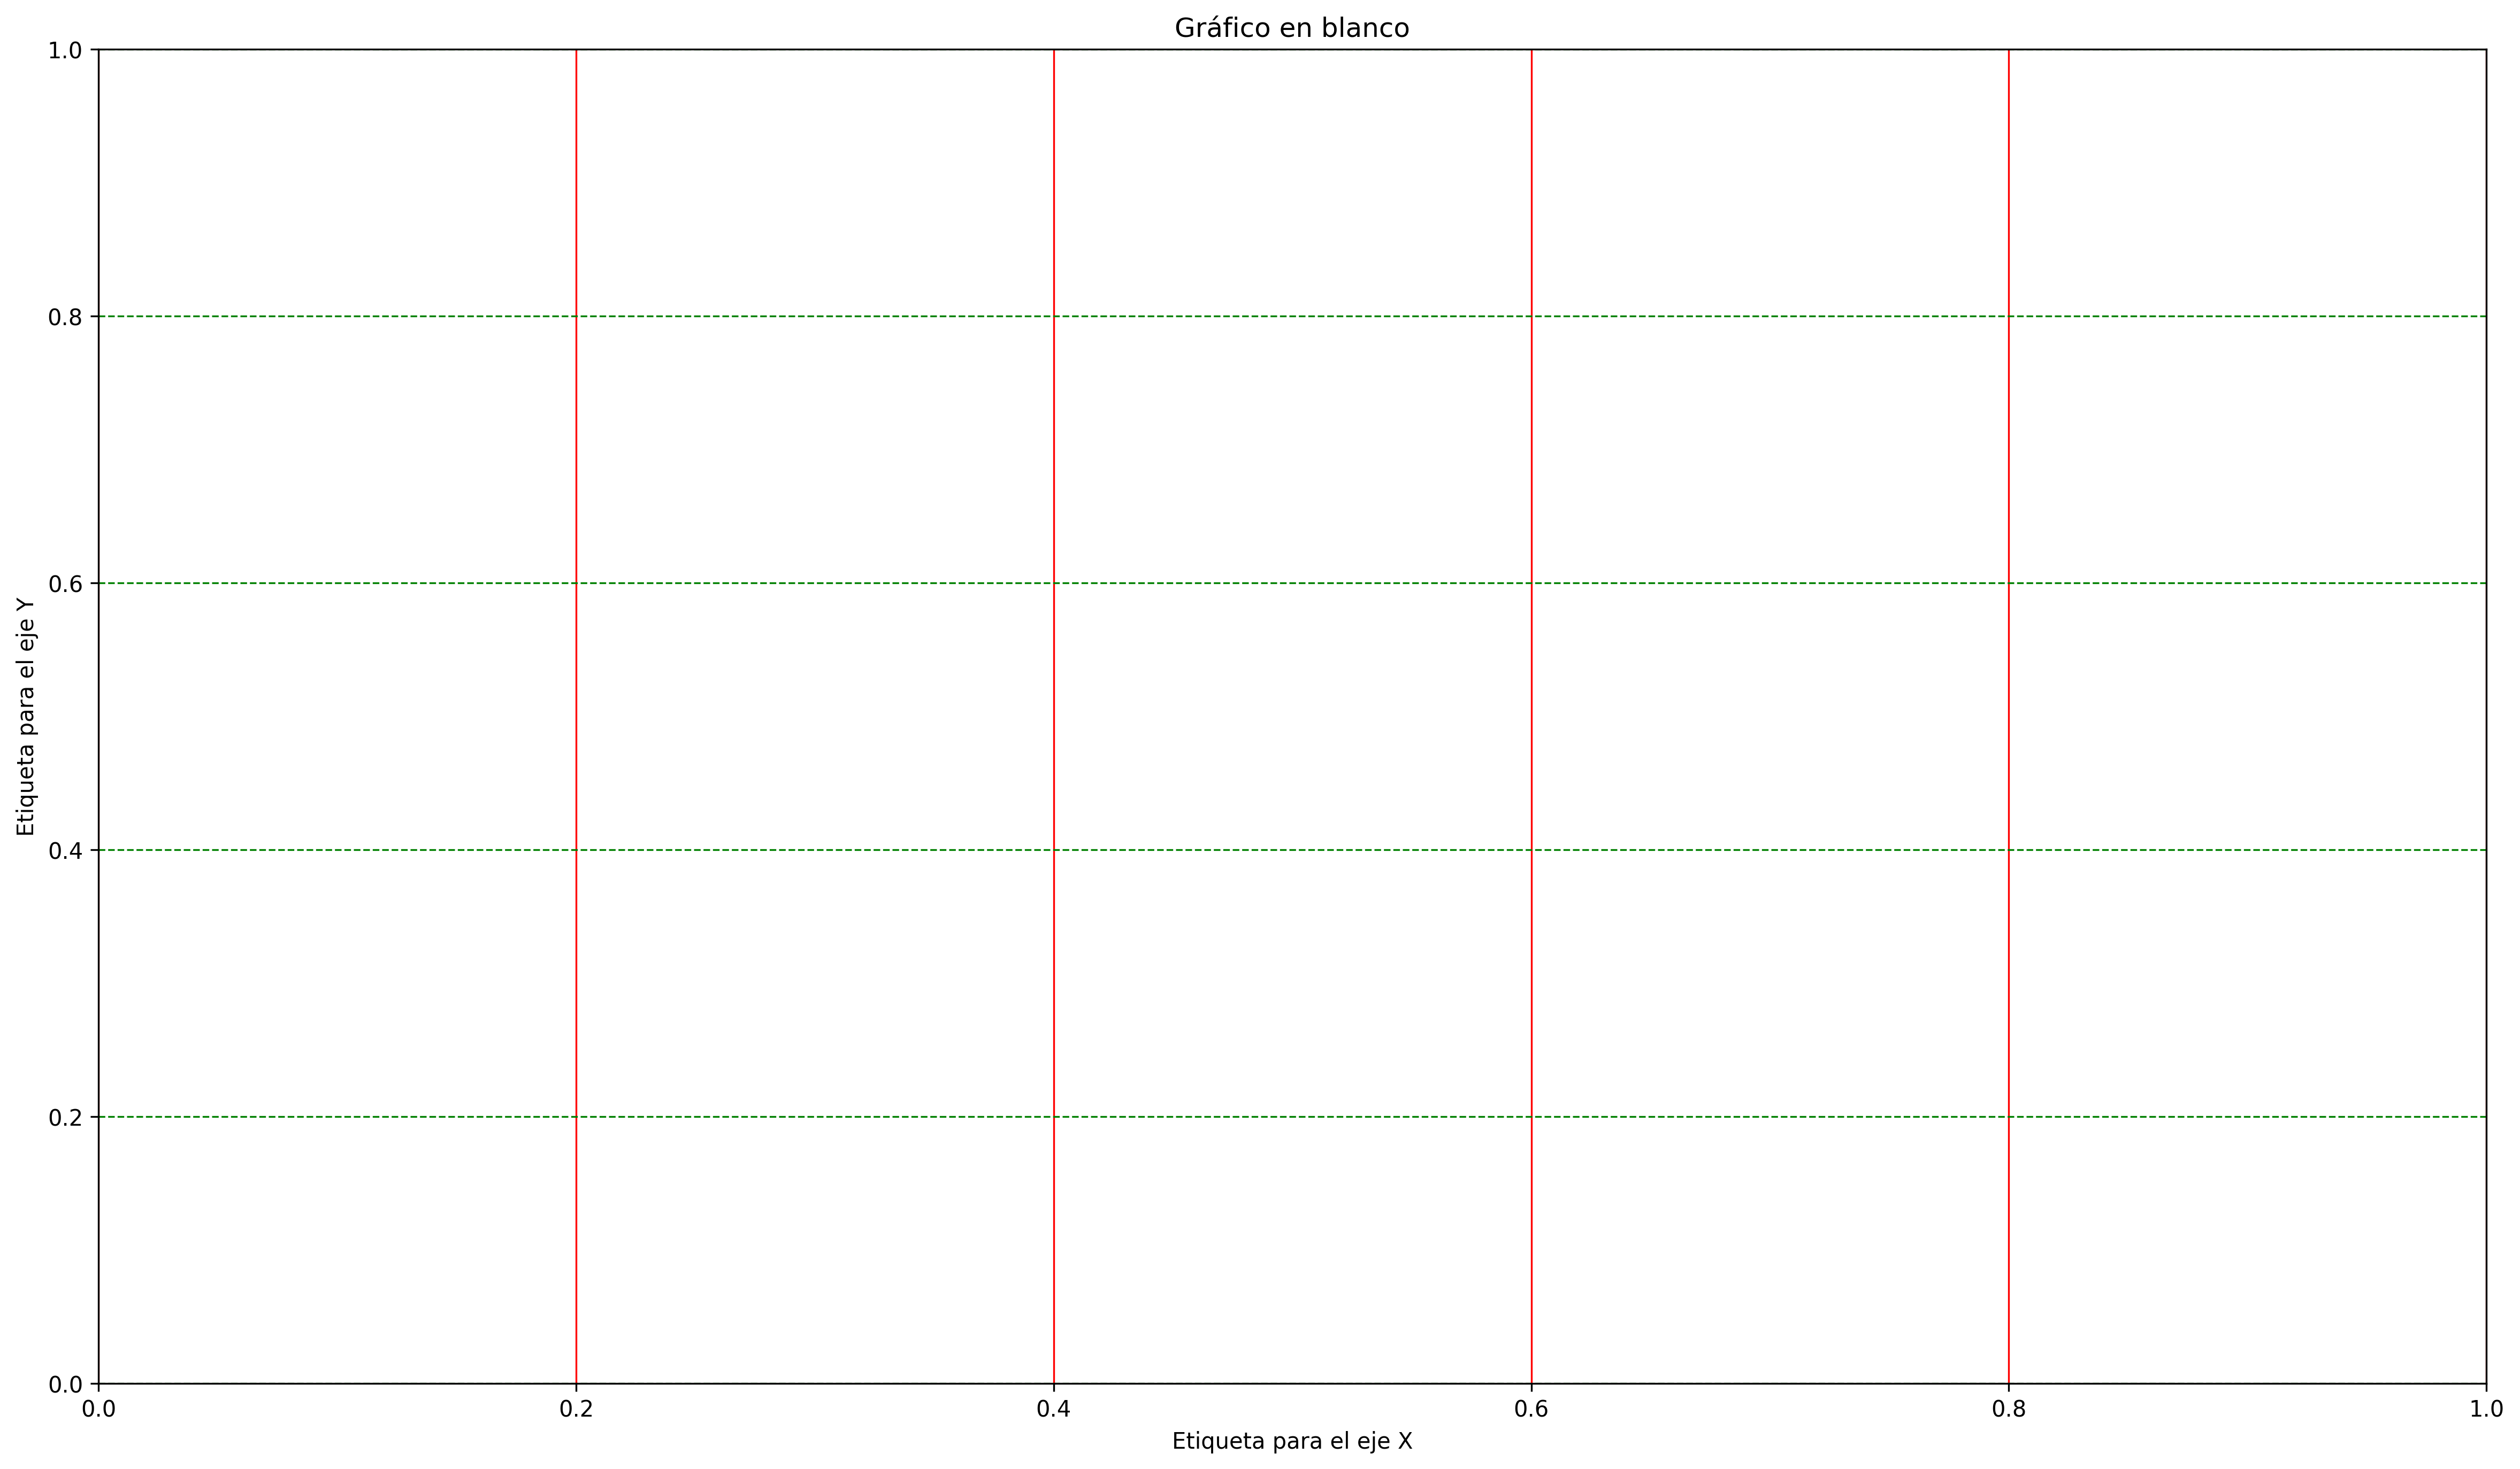

In [113]:
ax.xaxis.grid(color='r', linestyle='-') # equivale a color='red', linestyle='solid'
ax.yaxis.grid(color='g', linestyle='--') # equivale a color='green', linestyle='dashed'
fig

Marcas<br>
Por defecto, los ejes del marco tienen unas marcas equiespaciadas que constituyen las marcas
mayores. Igualmente existen unas marcas menores que, a priori, no están activadas.<br>
Ambos elementos son susceptibles de modificarse. Veamos un ejemplo en el que establecemos
las marcas menores con distinto espaciado en cada eje y además le damos un estilo
diferente a cada rejilla:

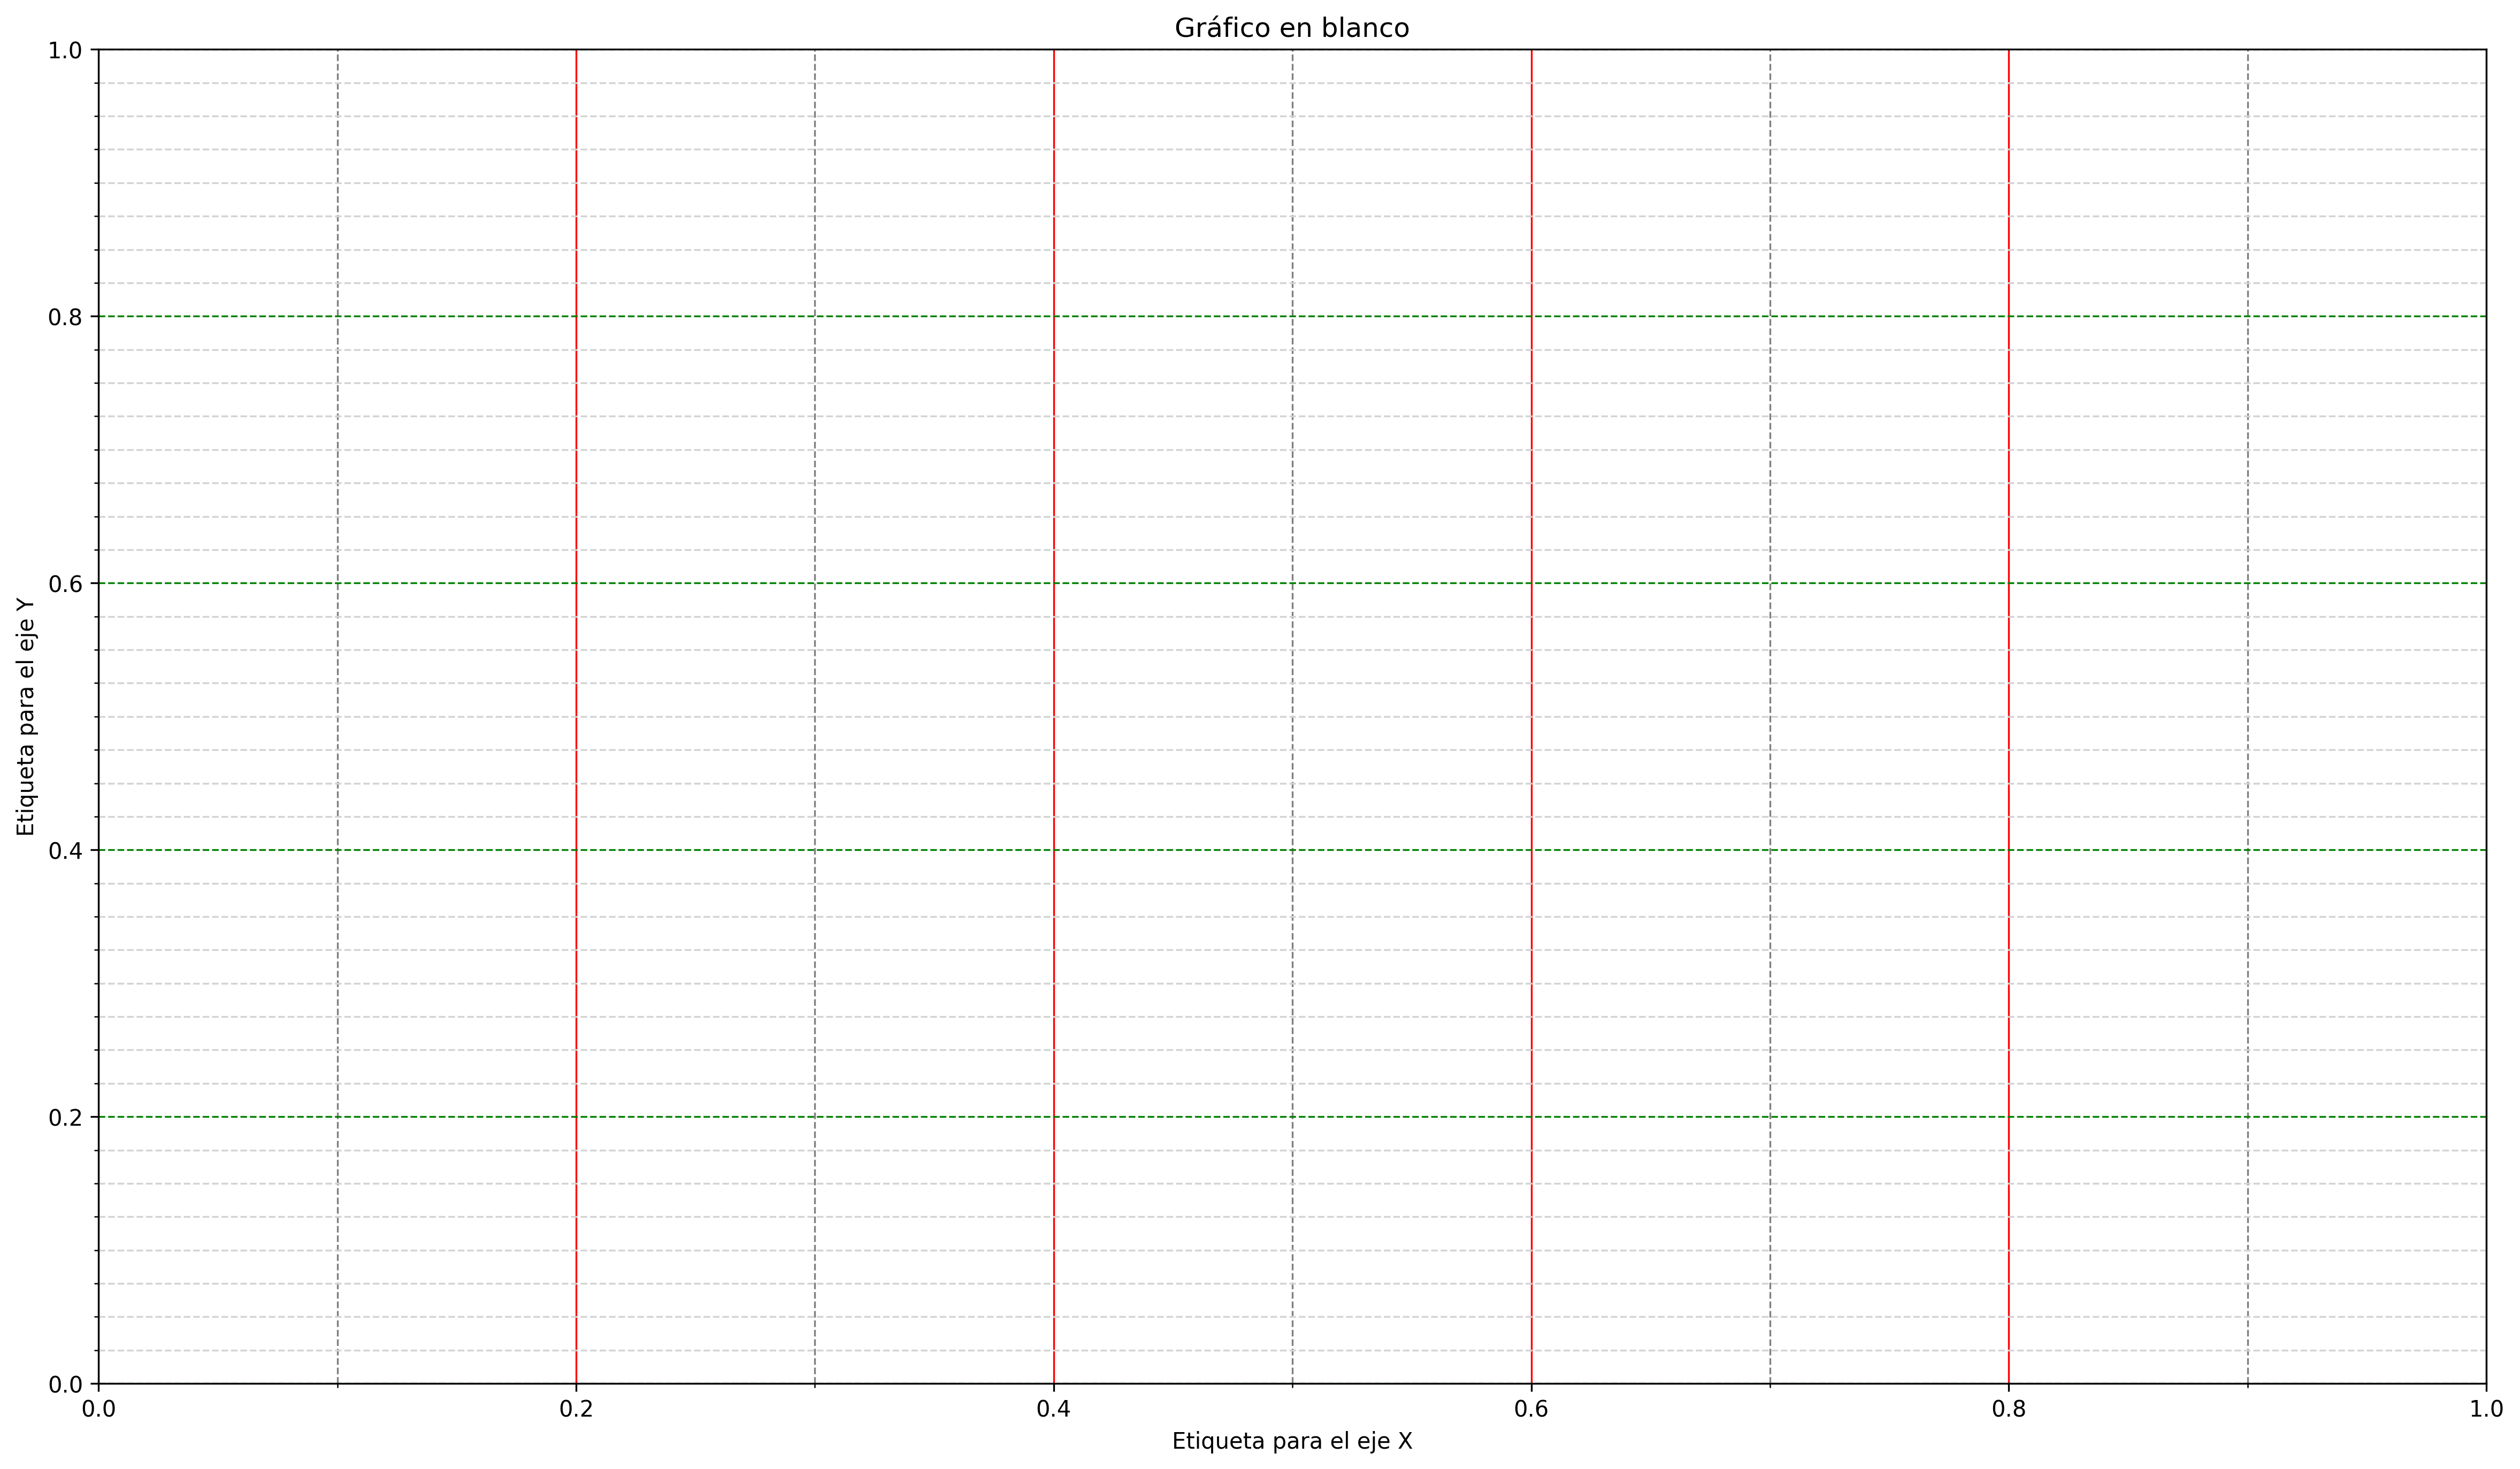

In [114]:
from matplotlib.ticker import MultipleLocator
ax.xaxis.set_minor_locator(MultipleLocator(0.1)) # X: Separación de las marcas menores
ax.yaxis.set_minor_locator(MultipleLocator(0.025)) # Y: Separación de las marcas menores
ax.xaxis.grid(which='minor', linestyle='dashed',color='gray')
ax.yaxis.grid(which='minor', linestyle='dashed',color='lightgray')
fig

También es posible asignar etiquetas a las marcas menores. En ese sentido, veremos un<br>
ejemplo en el que incorporamos los valores a los ejes con estilos propios:<br>
• Marcas menores en el eje X: precisión de 1 decimal, tamaño de letra 8 y color gris.<br>
• Marcas menores en el eje Y: precisión de 2 decimales, tamaño de letra 8 y color azul.<br>

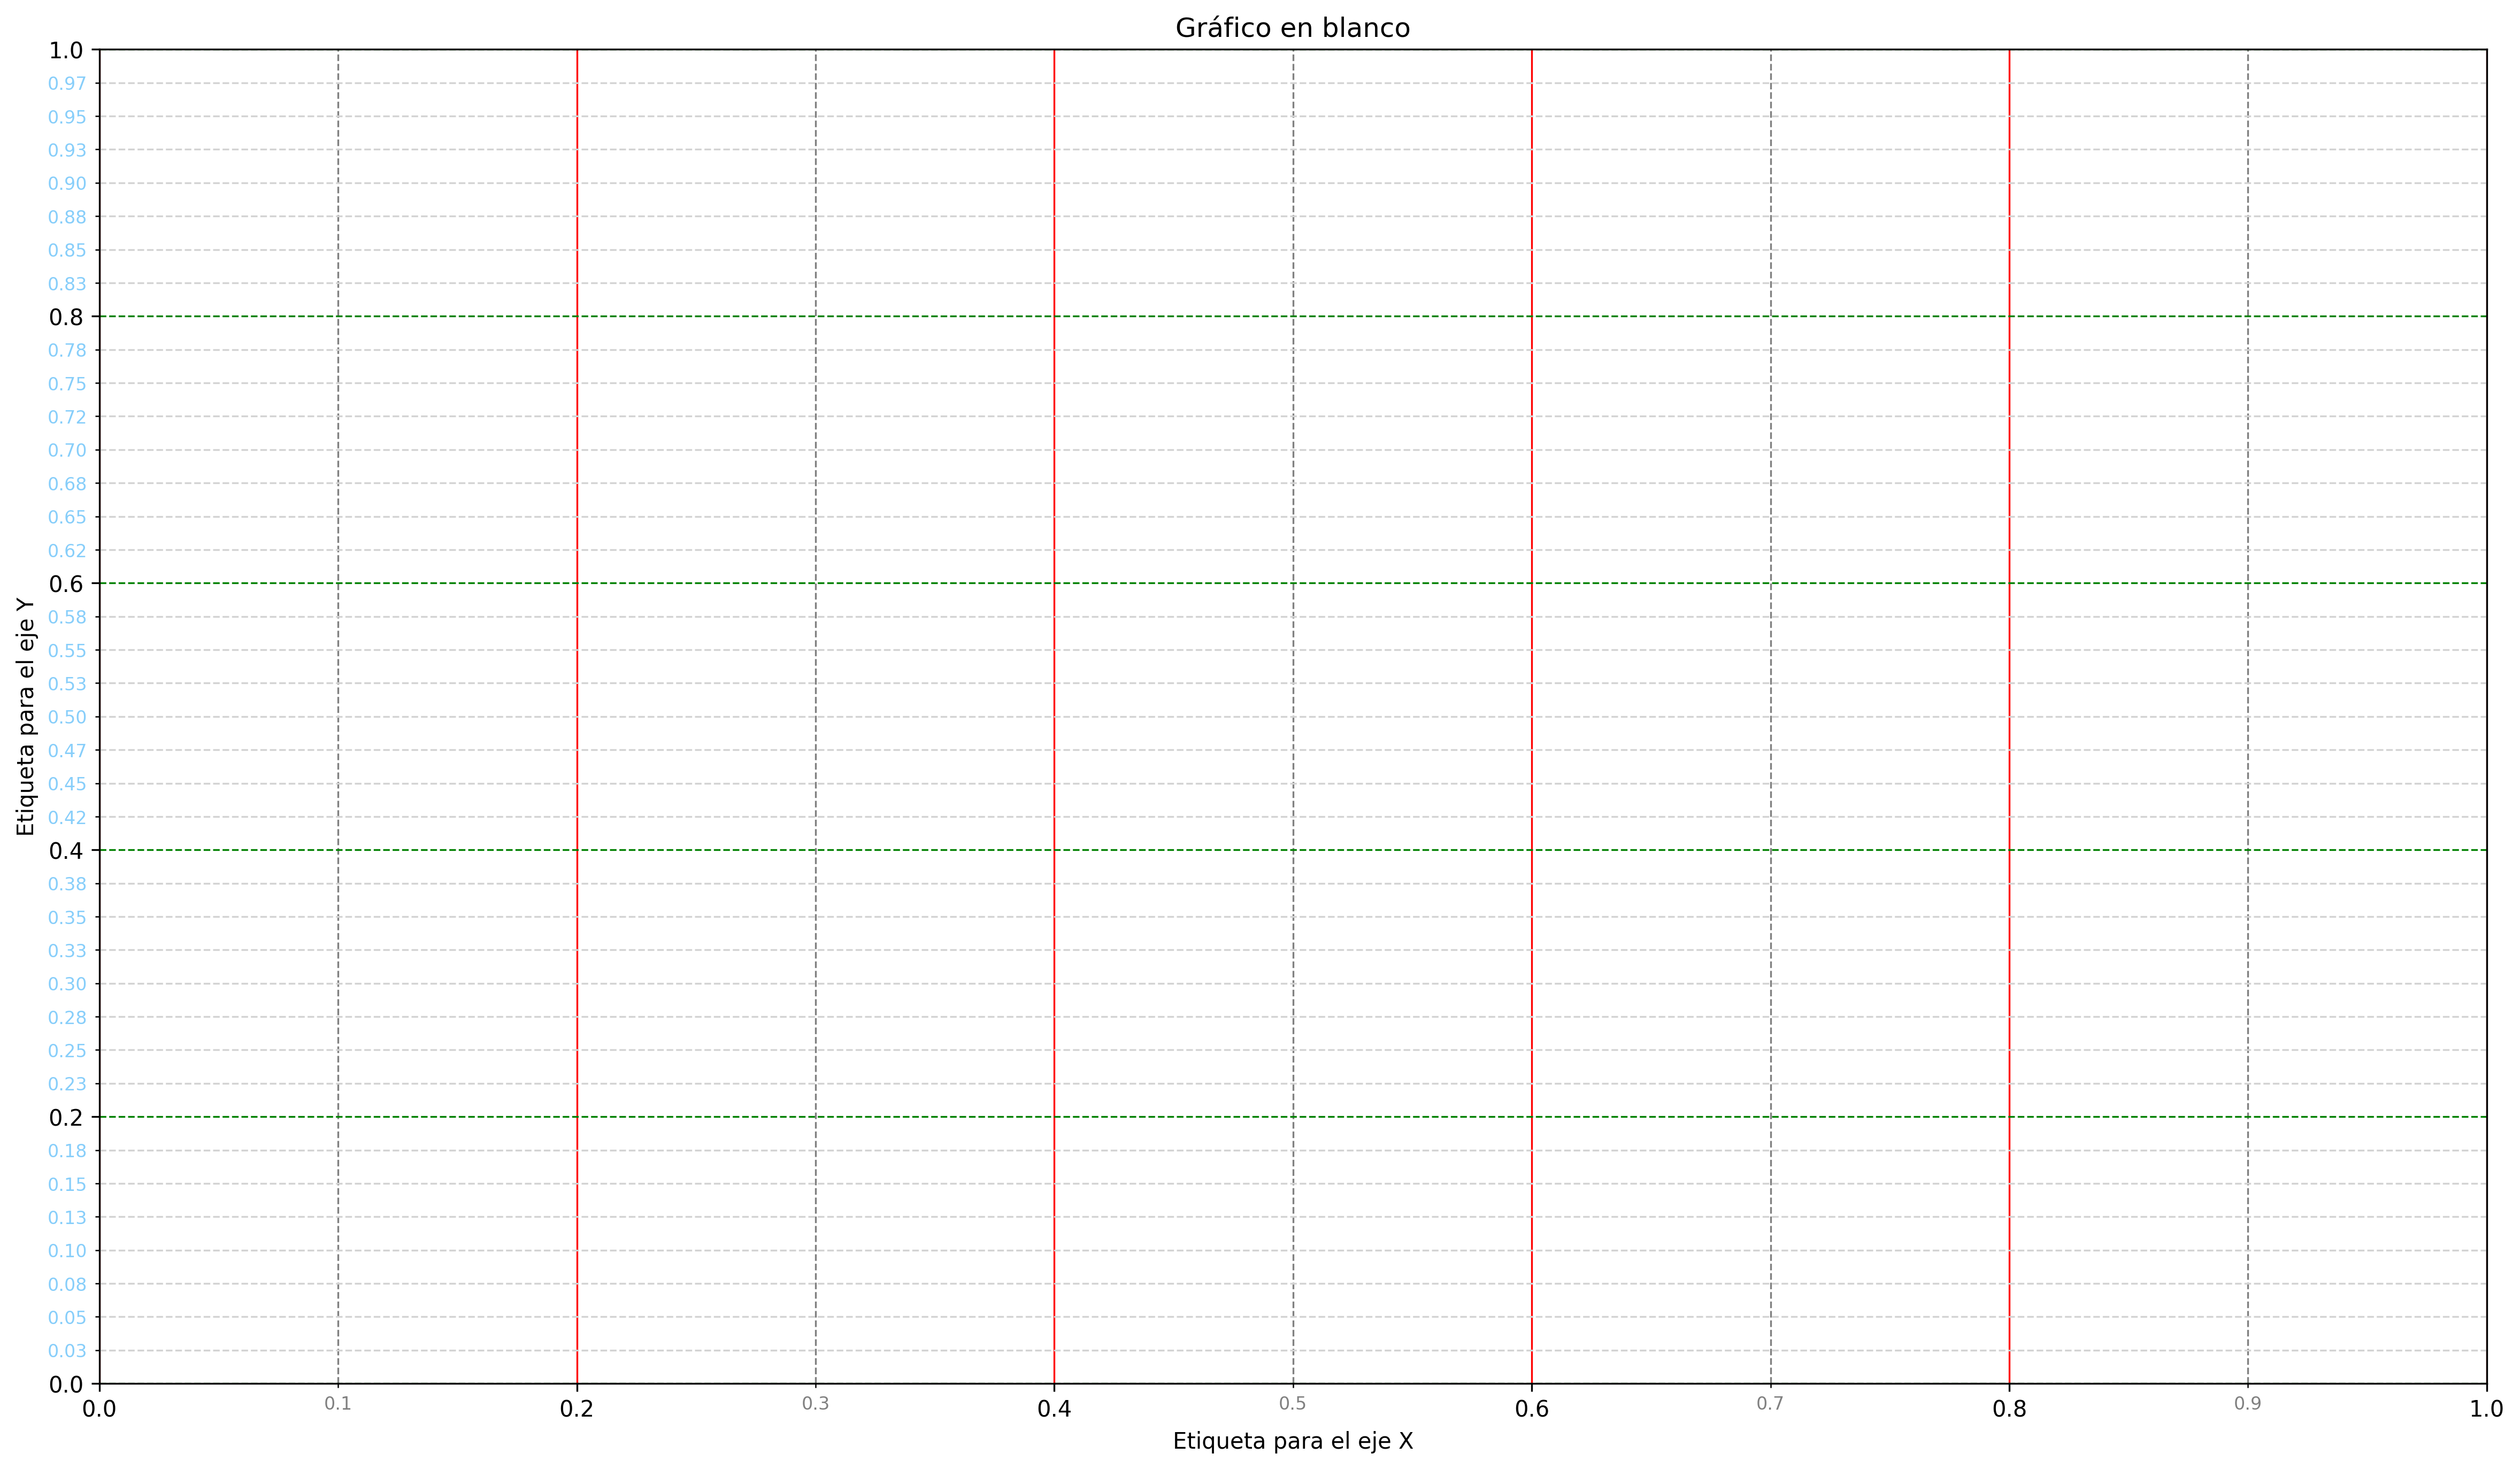

In [115]:
# Eje x
ax.xaxis.set_minor_formatter('{x:.1f}') #
ax.tick_params(axis='x', which='minor', labelsize=8,labelcolor='gray')
# Eje y
ax.yaxis.set_minor_formatter('{x:.2f}') #
ax.tick_params(axis='y', which='minor', labelsize=8,labelcolor='lightskyblue')
fig

Empezando a graficar:<br>
Vamos a empezar por representar la función 𝑓(𝑥) = 𝑠𝑖𝑛(𝑥). Para ello crearemos una variable<br>
𝑥 con valores flotantes equidistantes y una variable 𝑦 aplicando la función senoidal. Nos<br>
apoyamos en numpy para ello. A continuación usaremos la función plot() del marco para<br>
representar la función creada:

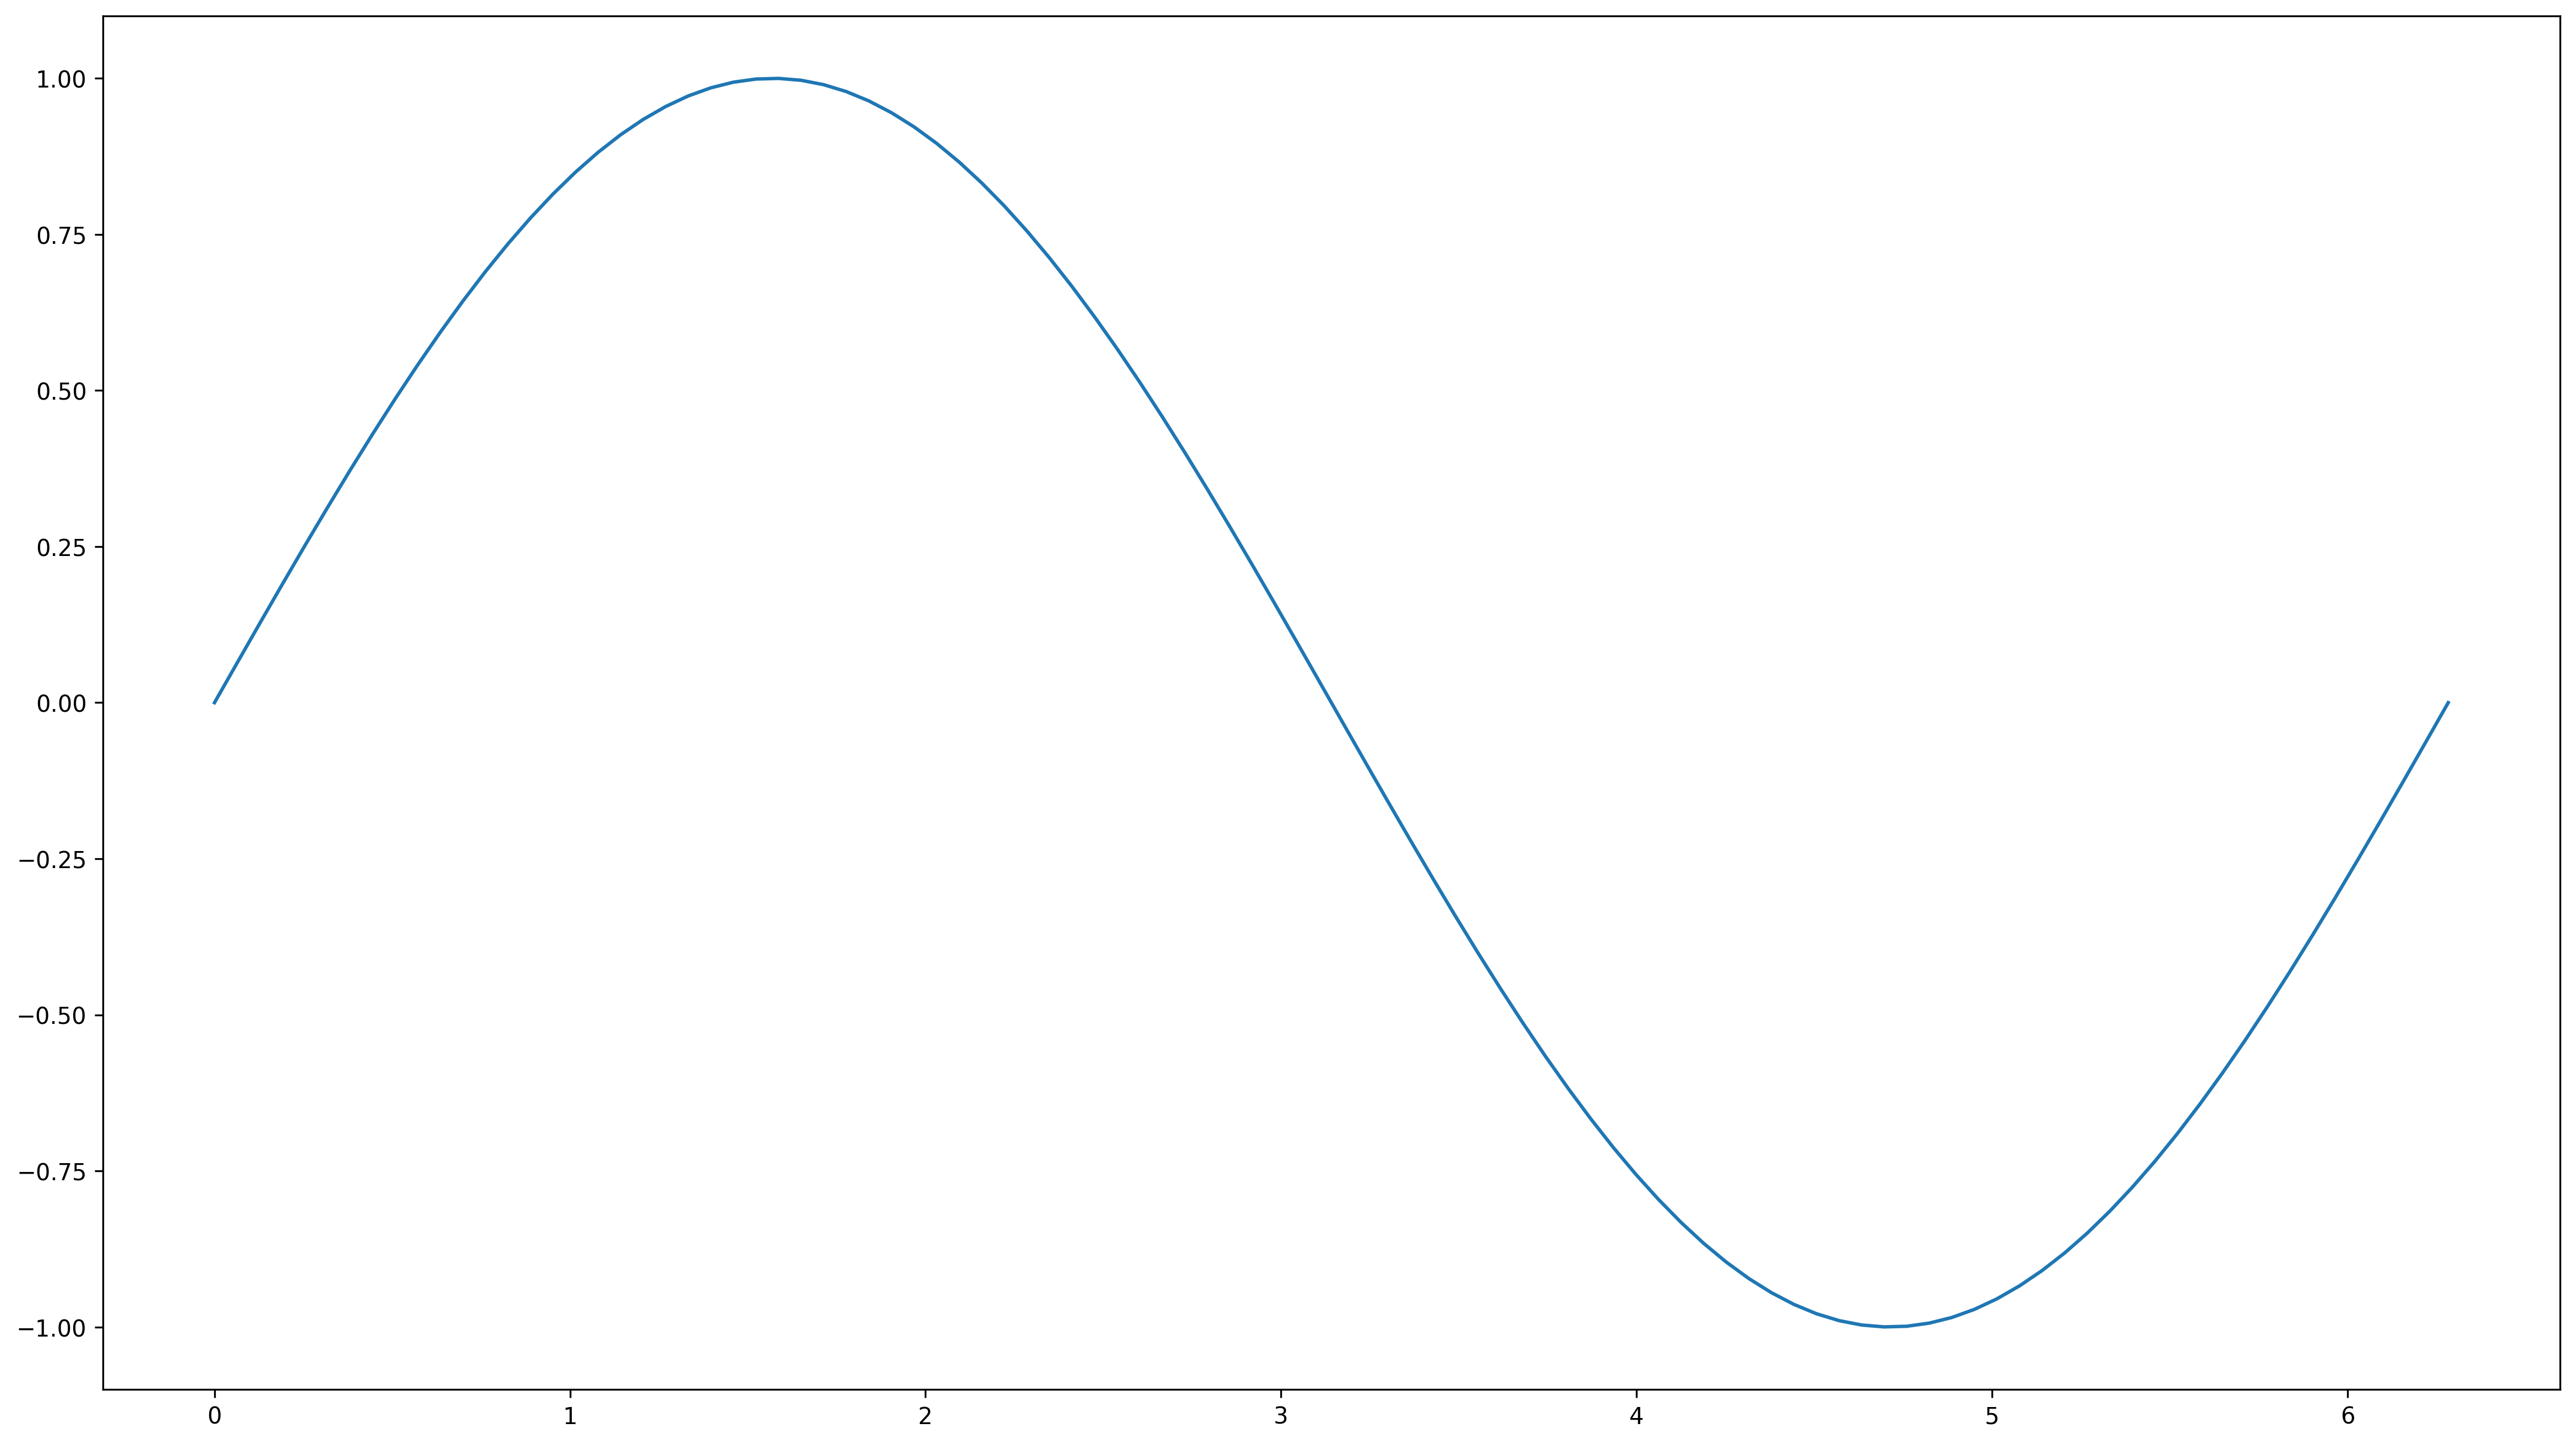

In [116]:
import numpy as np
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
fig,ax=plt.subplots()
ax.plot(x,y)

Múltiples funciones
Partiendo de un mismo marco, es posible graficar todas las funciones que necesitemos. A
continuación crearemos un marco con las funciones seno y coseno:

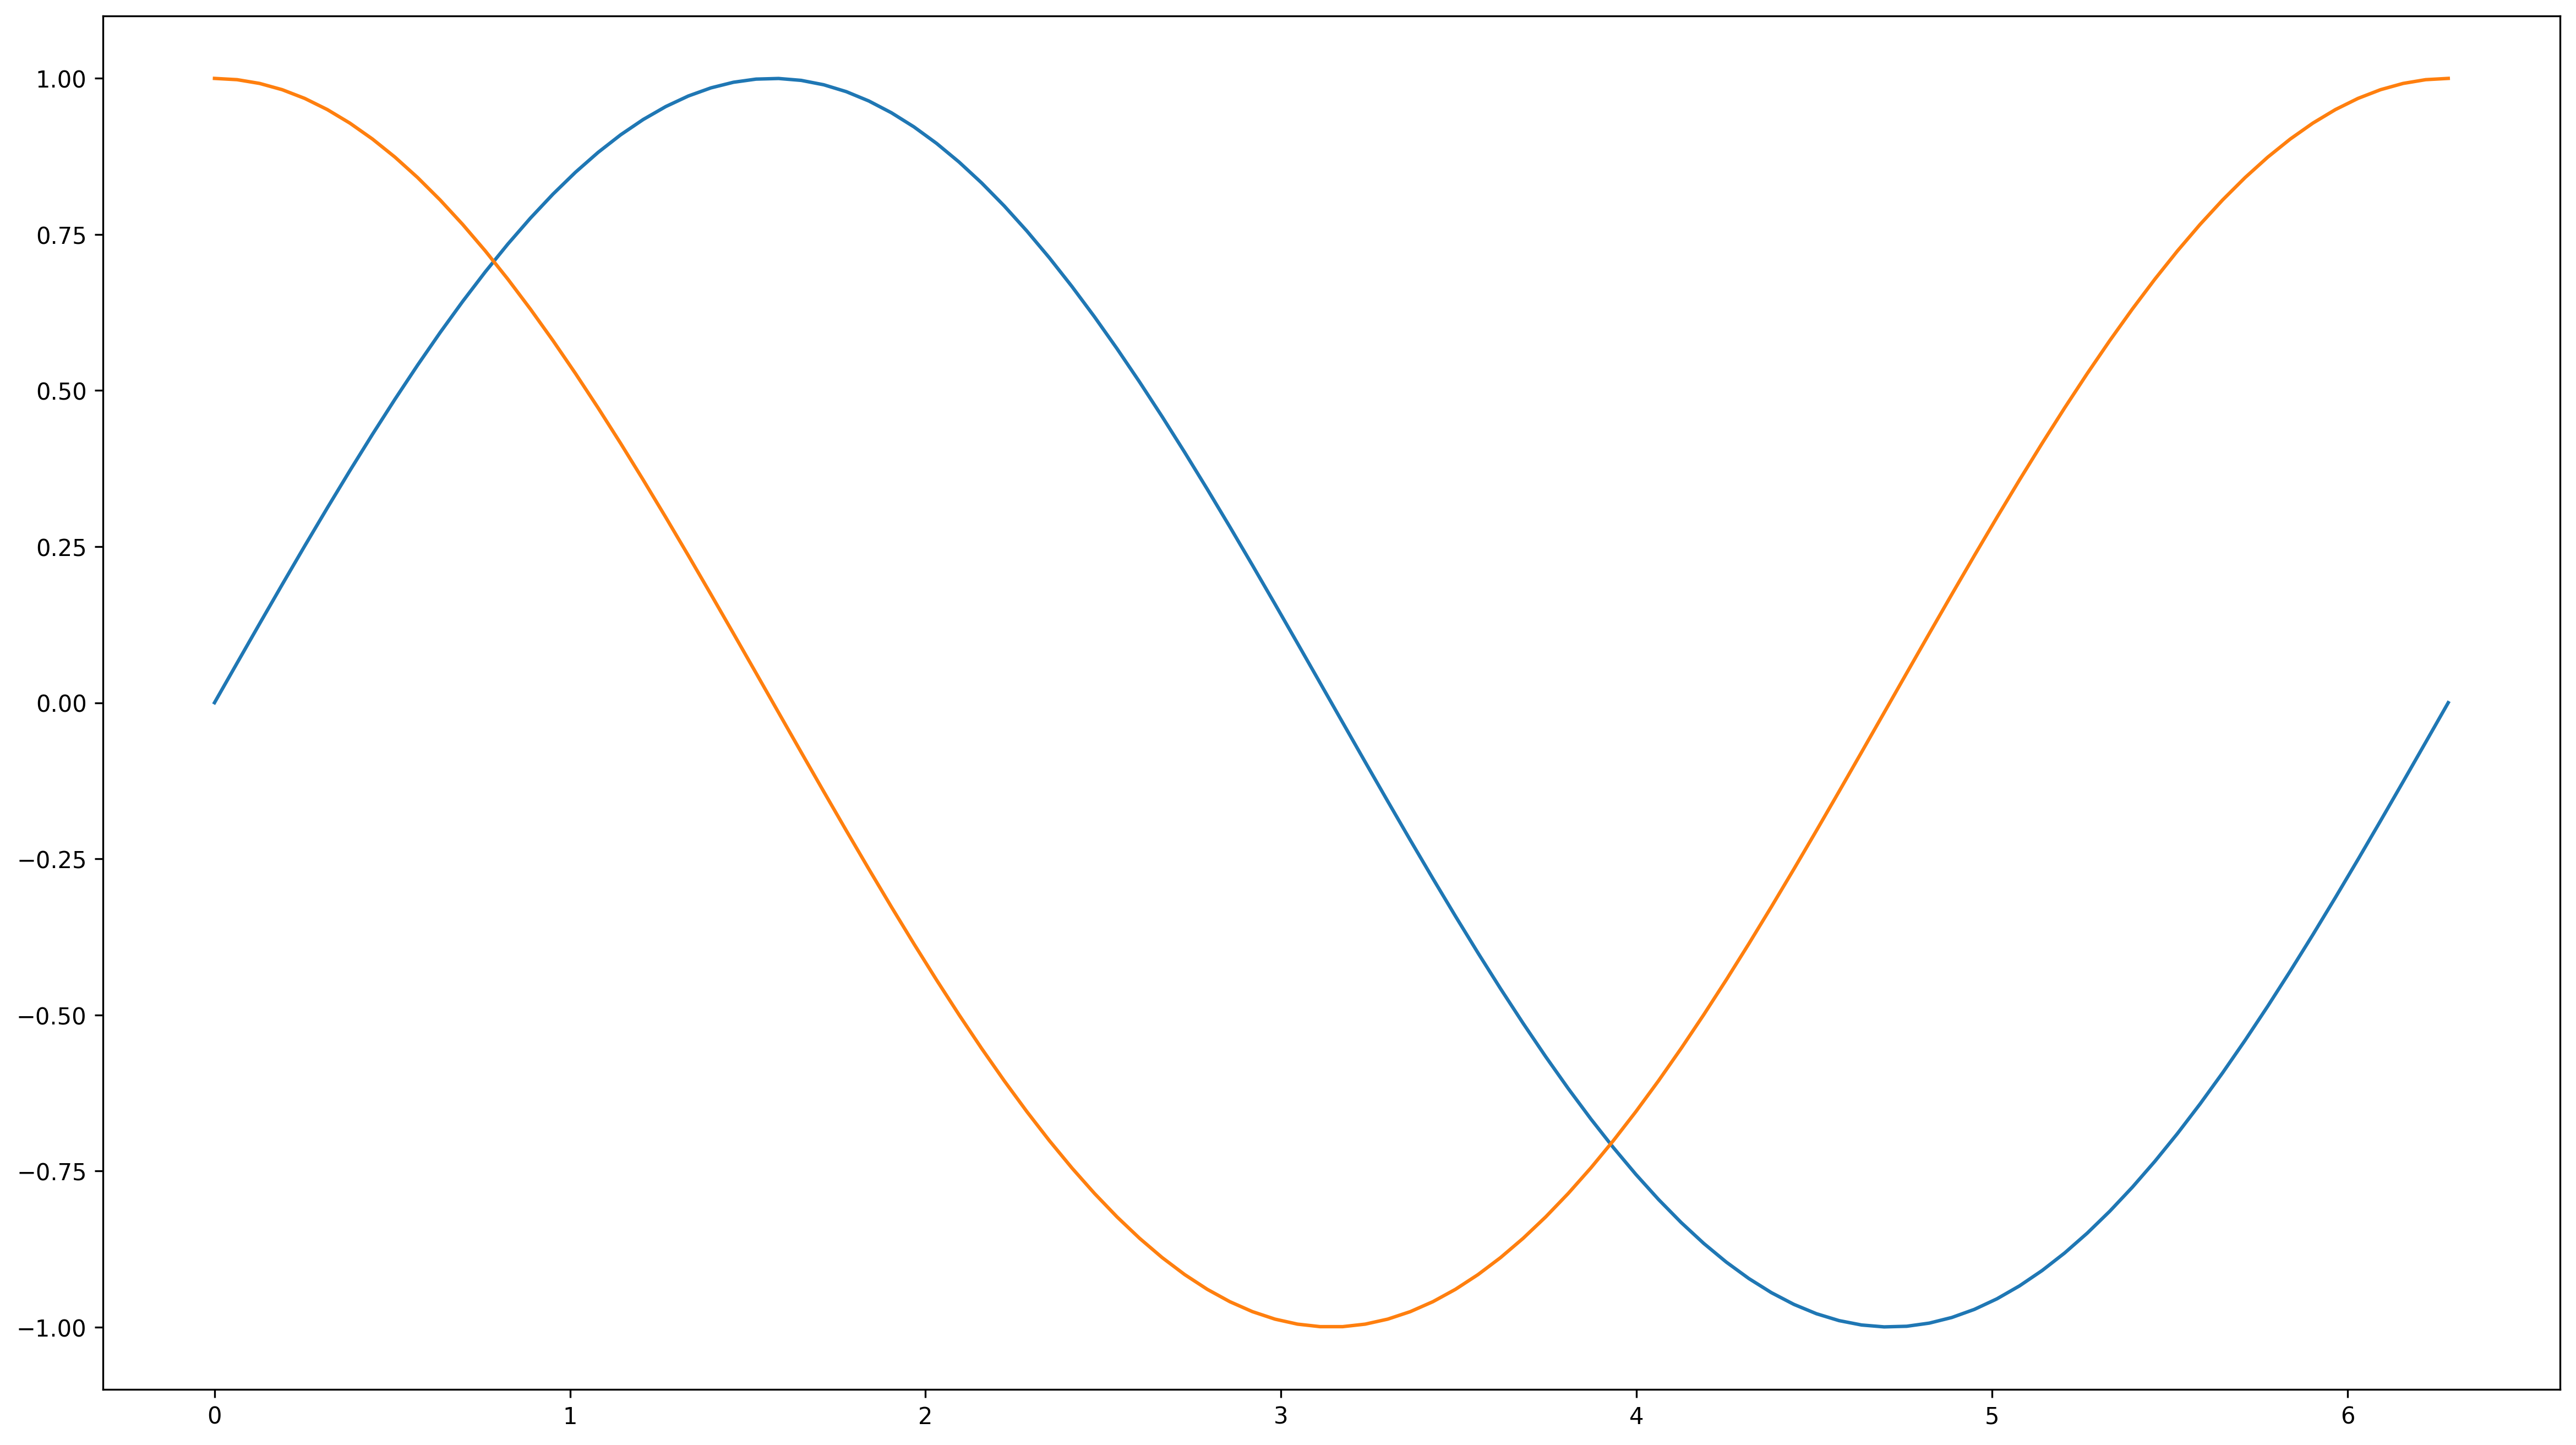

In [117]:
x = np.linspace(0, 2*np.pi, 100)
sin = np.sin(x)
cos = np.cos(x)
fig,ax=plt.subplots()
ax.plot(x,sin)
ax.plot(x,cos)

Leyenda<br>
En el caso de que tengamos múltiples gráficos en el mismo marco puede ser deseable mostrar
una leyenda identificativa. Para usarla necesitamos asignar etiquetas a cada función. Veamos
a continuación cómo incorporar una leyenda:

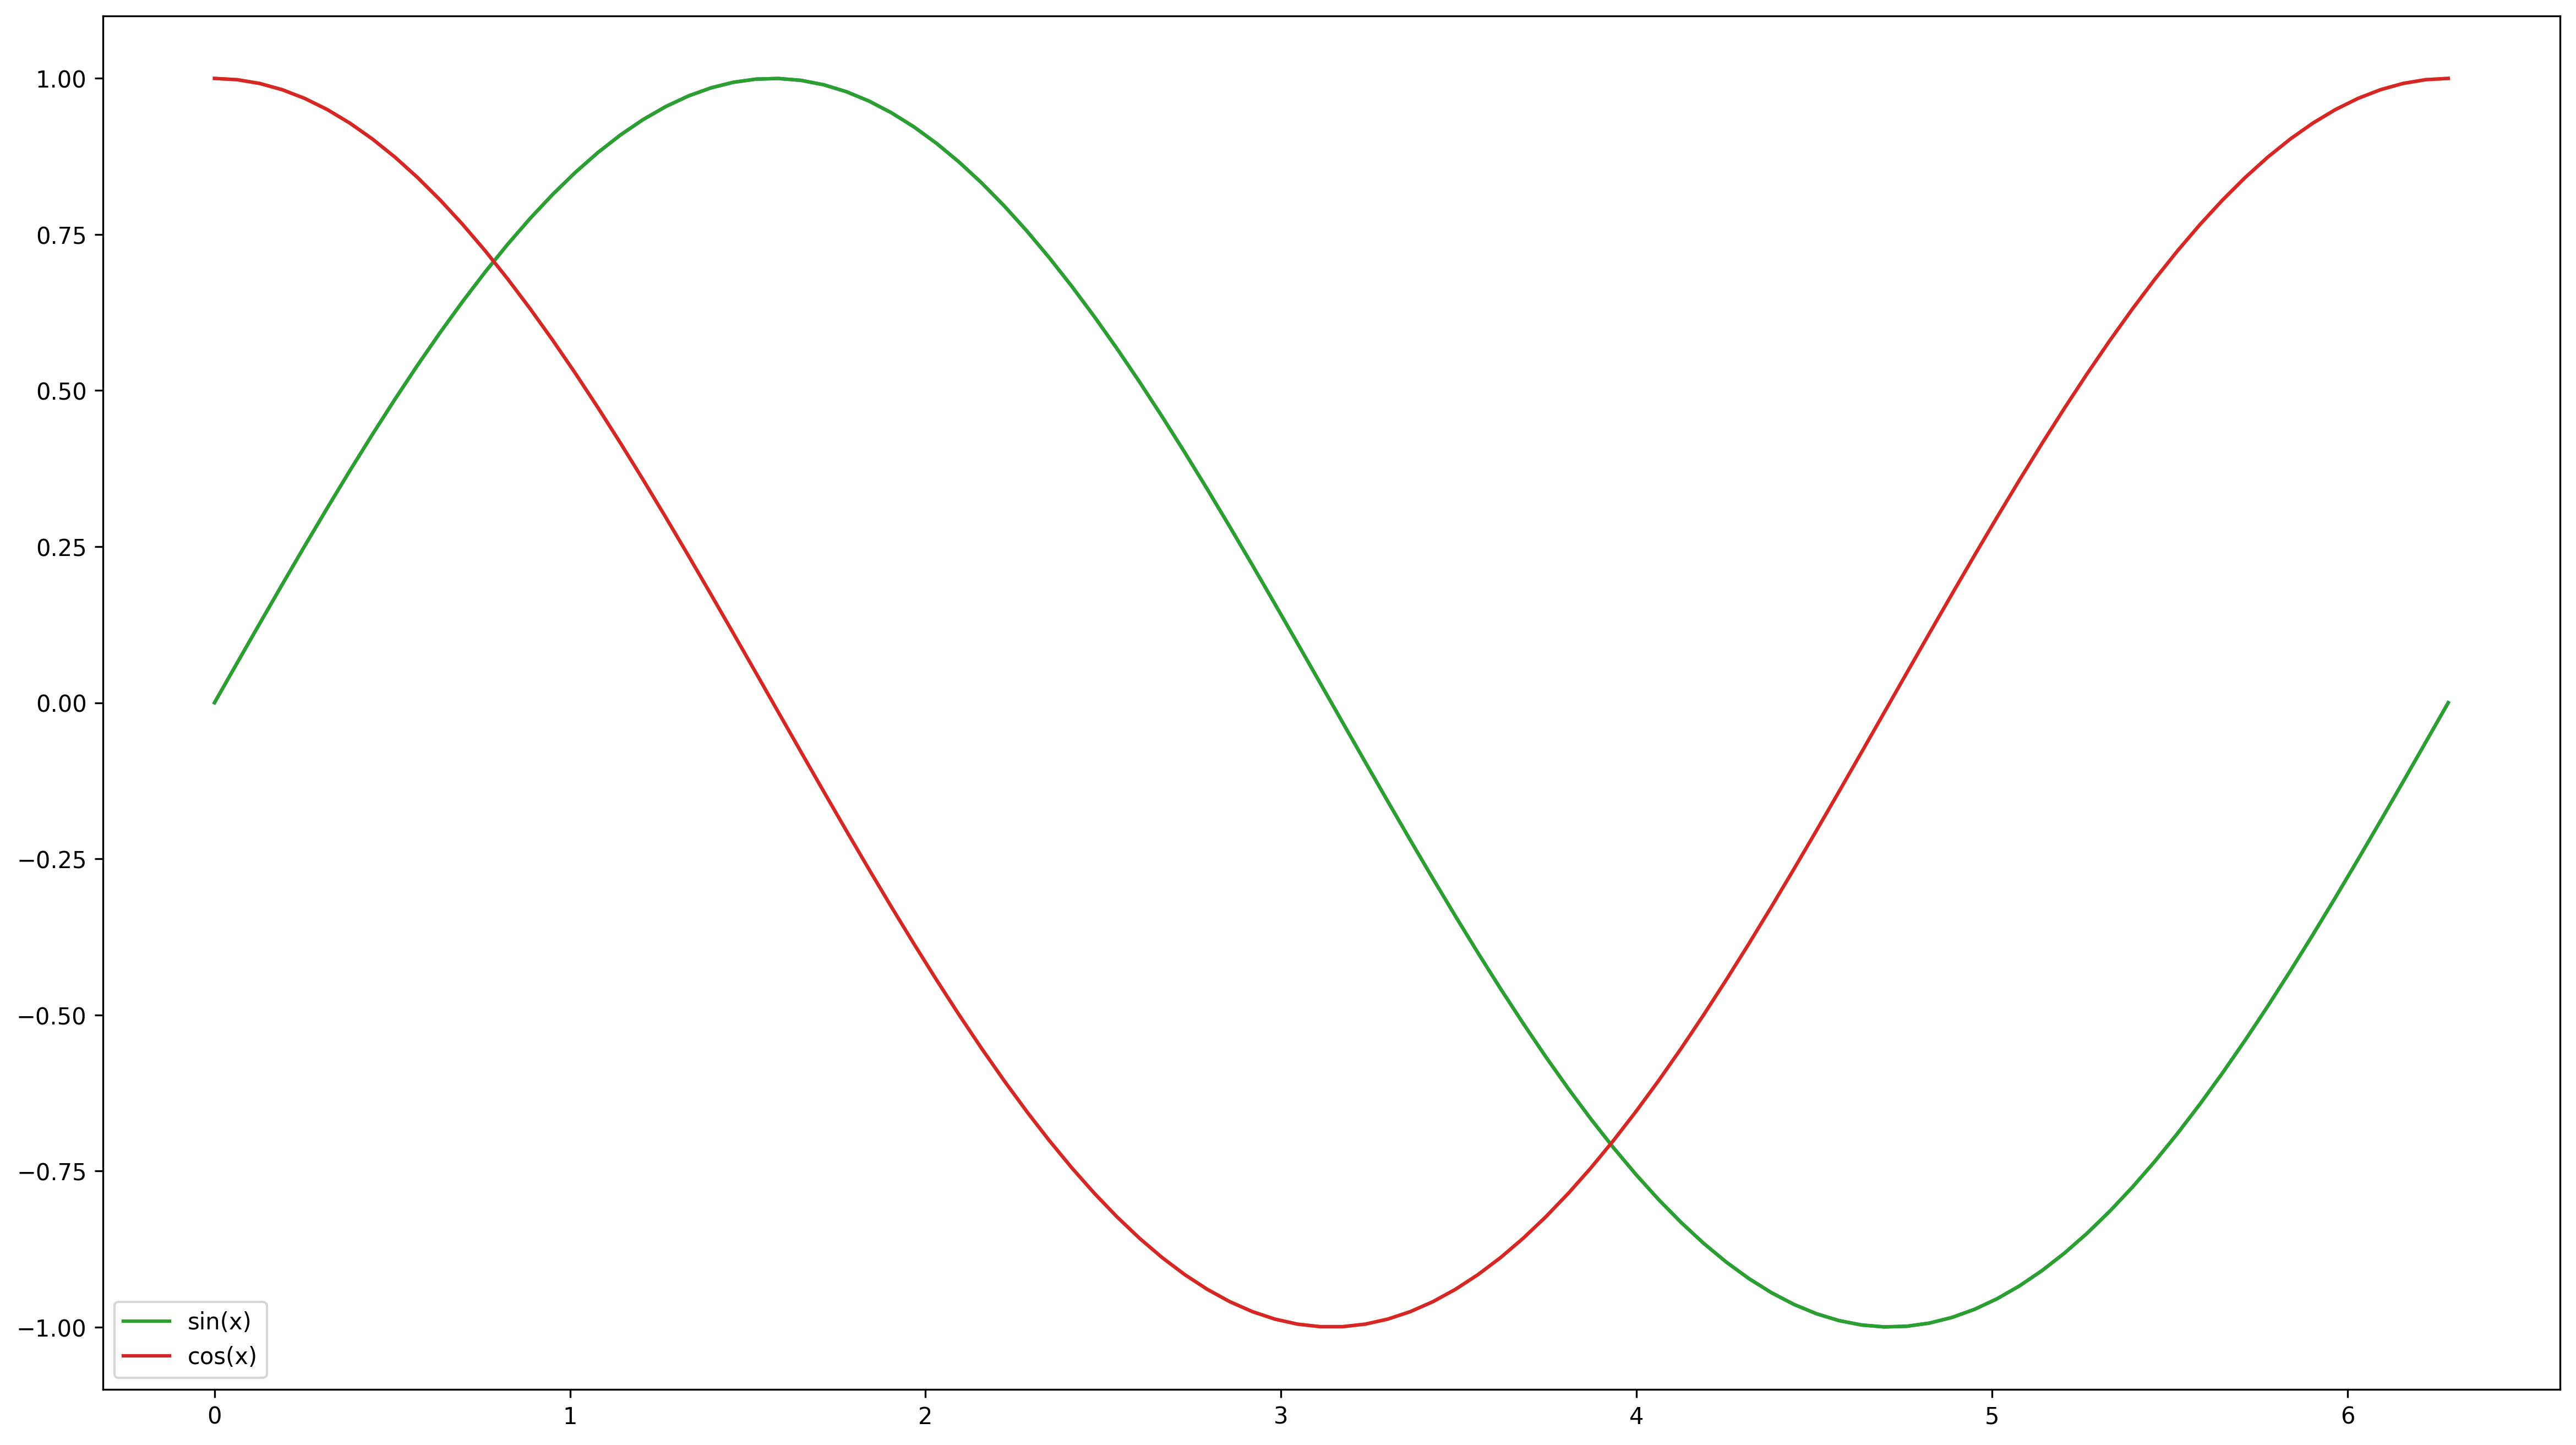

In [118]:
ax.plot(x,sin, label='sin(x)')
ax.plot(x,cos, label='cos(x)')
ax.legend()
fig


Ubicación de la leyenda<br>
Matplotlib intenta encontrar la mejor ubicación para la leyenda en el marco. Sin embargo,
también es posible personalizar el lugar en el que queremos colocarla.

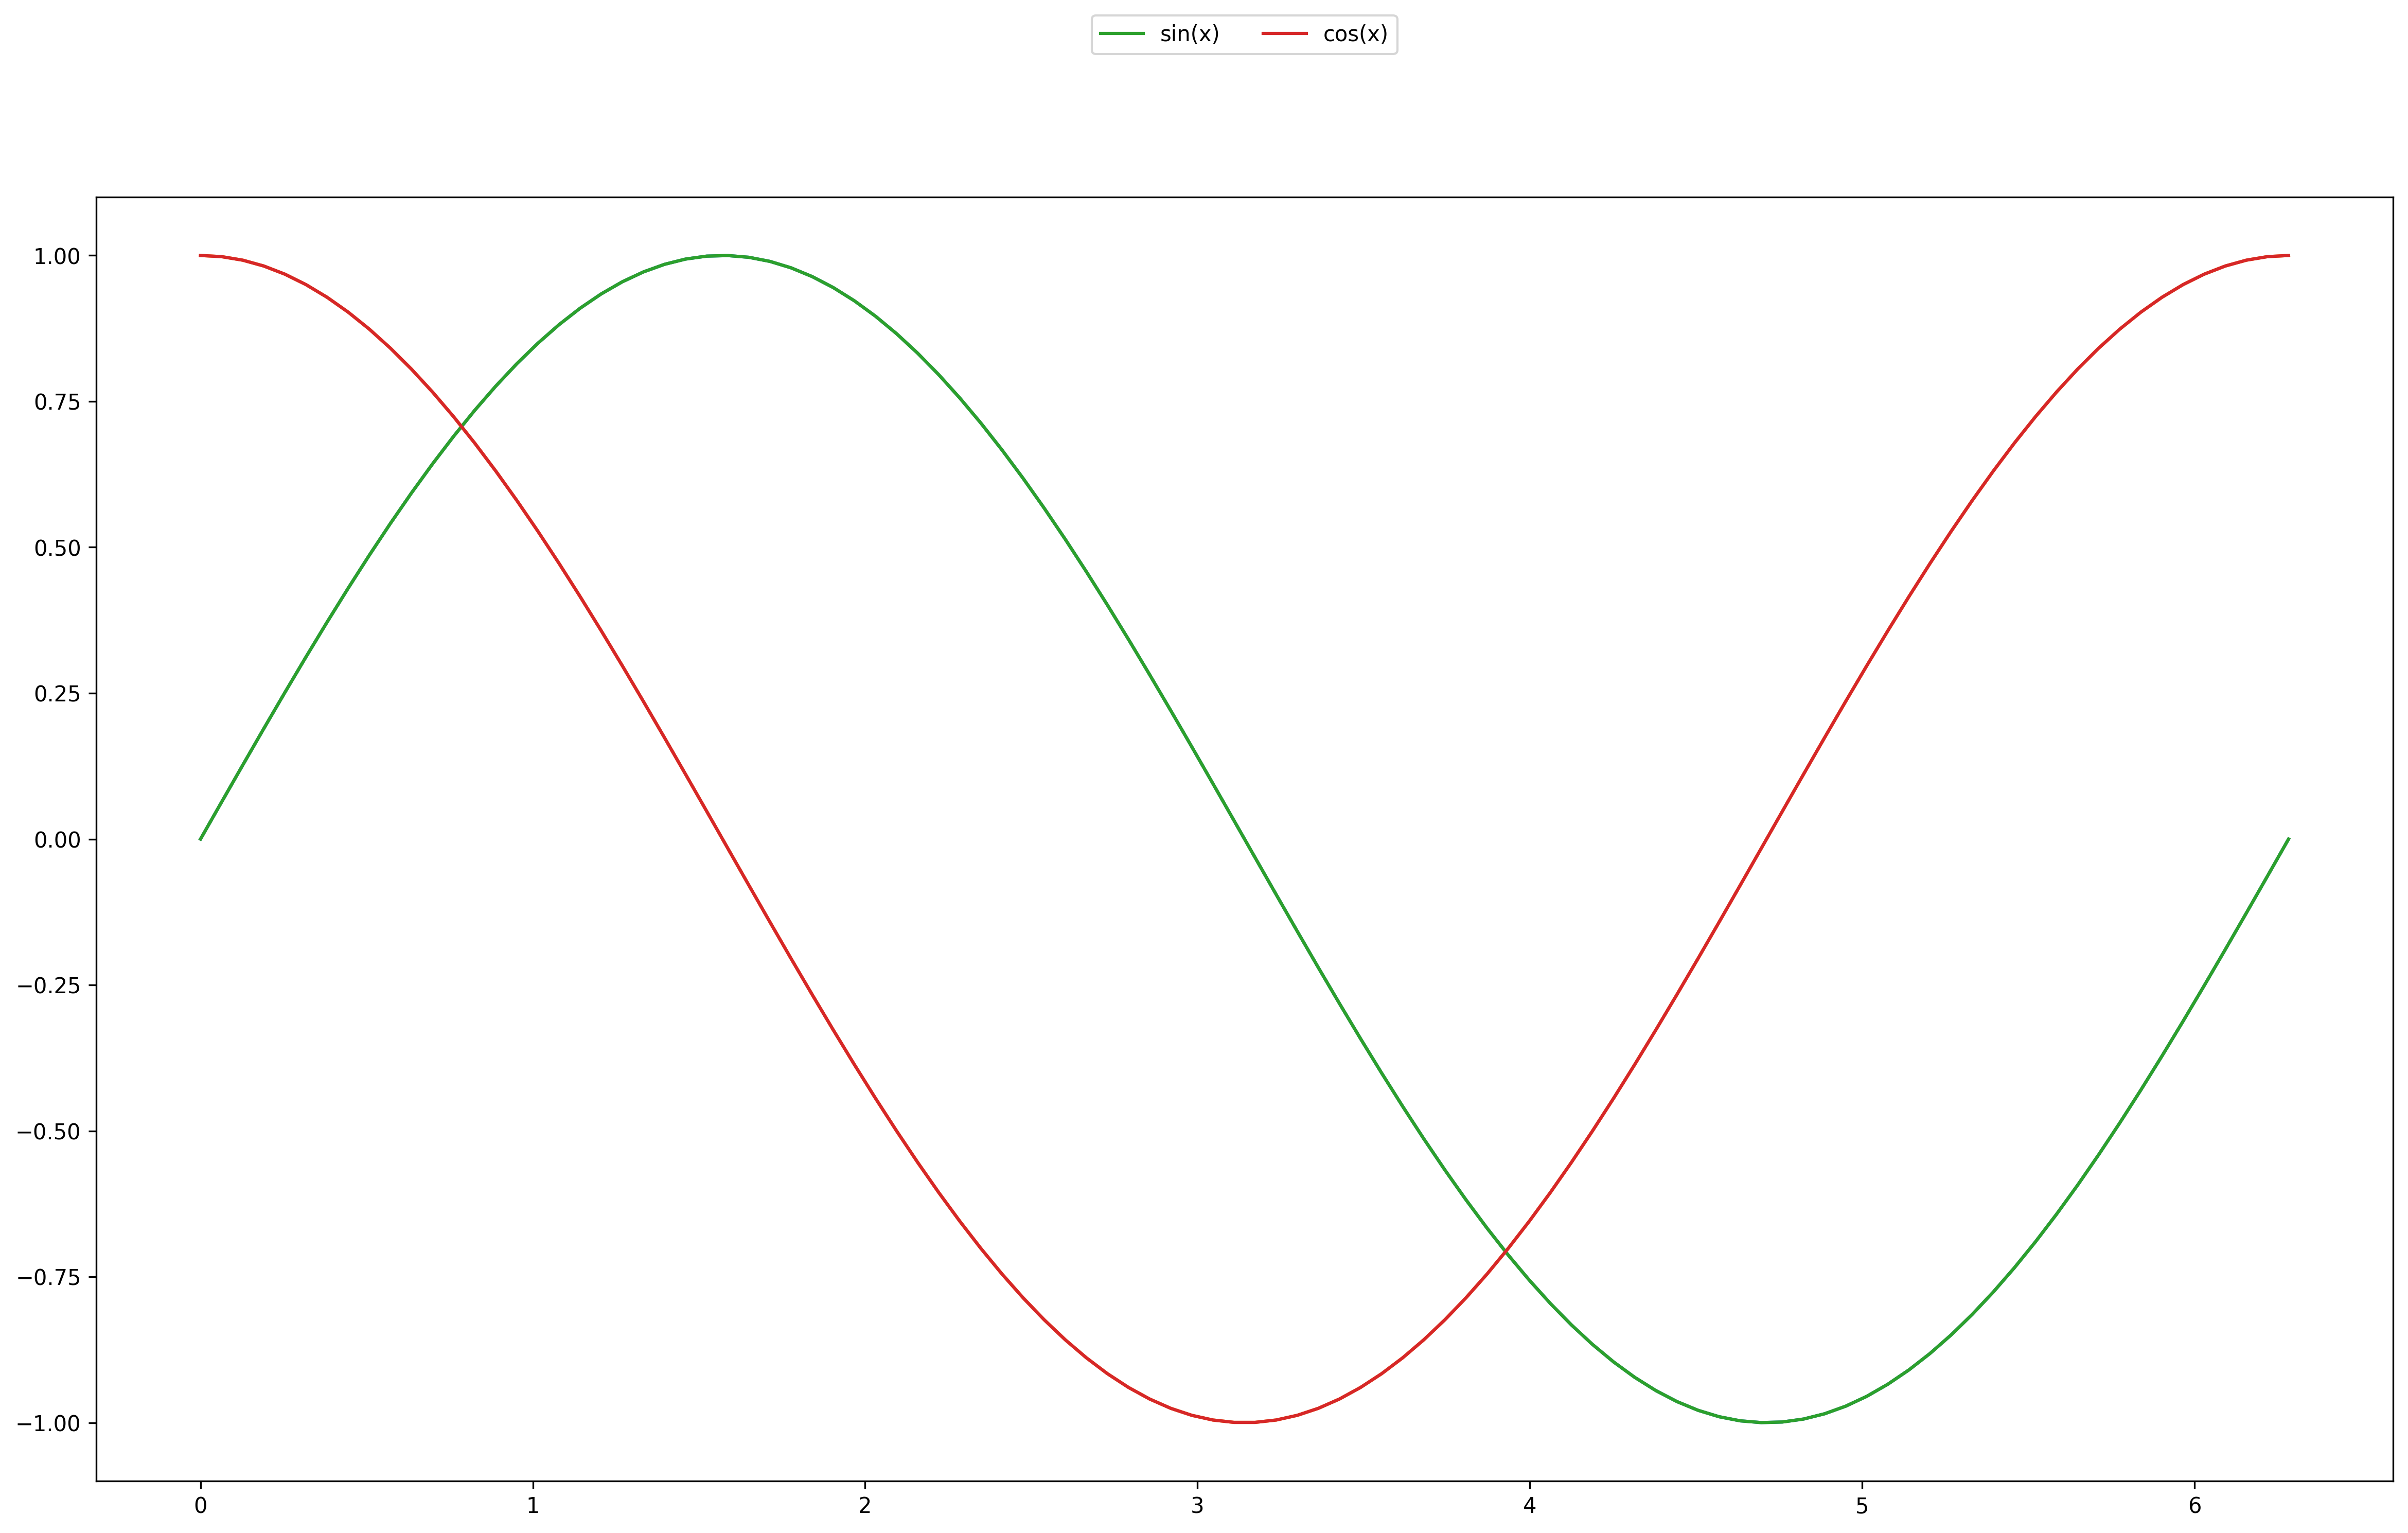

In [119]:
#Si nos interesa situar la leyenda en la parte superior central del marco haríamos lo siguiente:
ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=2)
fig

Aplicando estilos<br>
Para cada función que incluimos en el marco es posible establecer un estilo personalizado con
multitud de parámetros. Veamos la aplicación de algunos de estos parámetros a las funciones
seno y coseno con las que hemos estado trabajando:

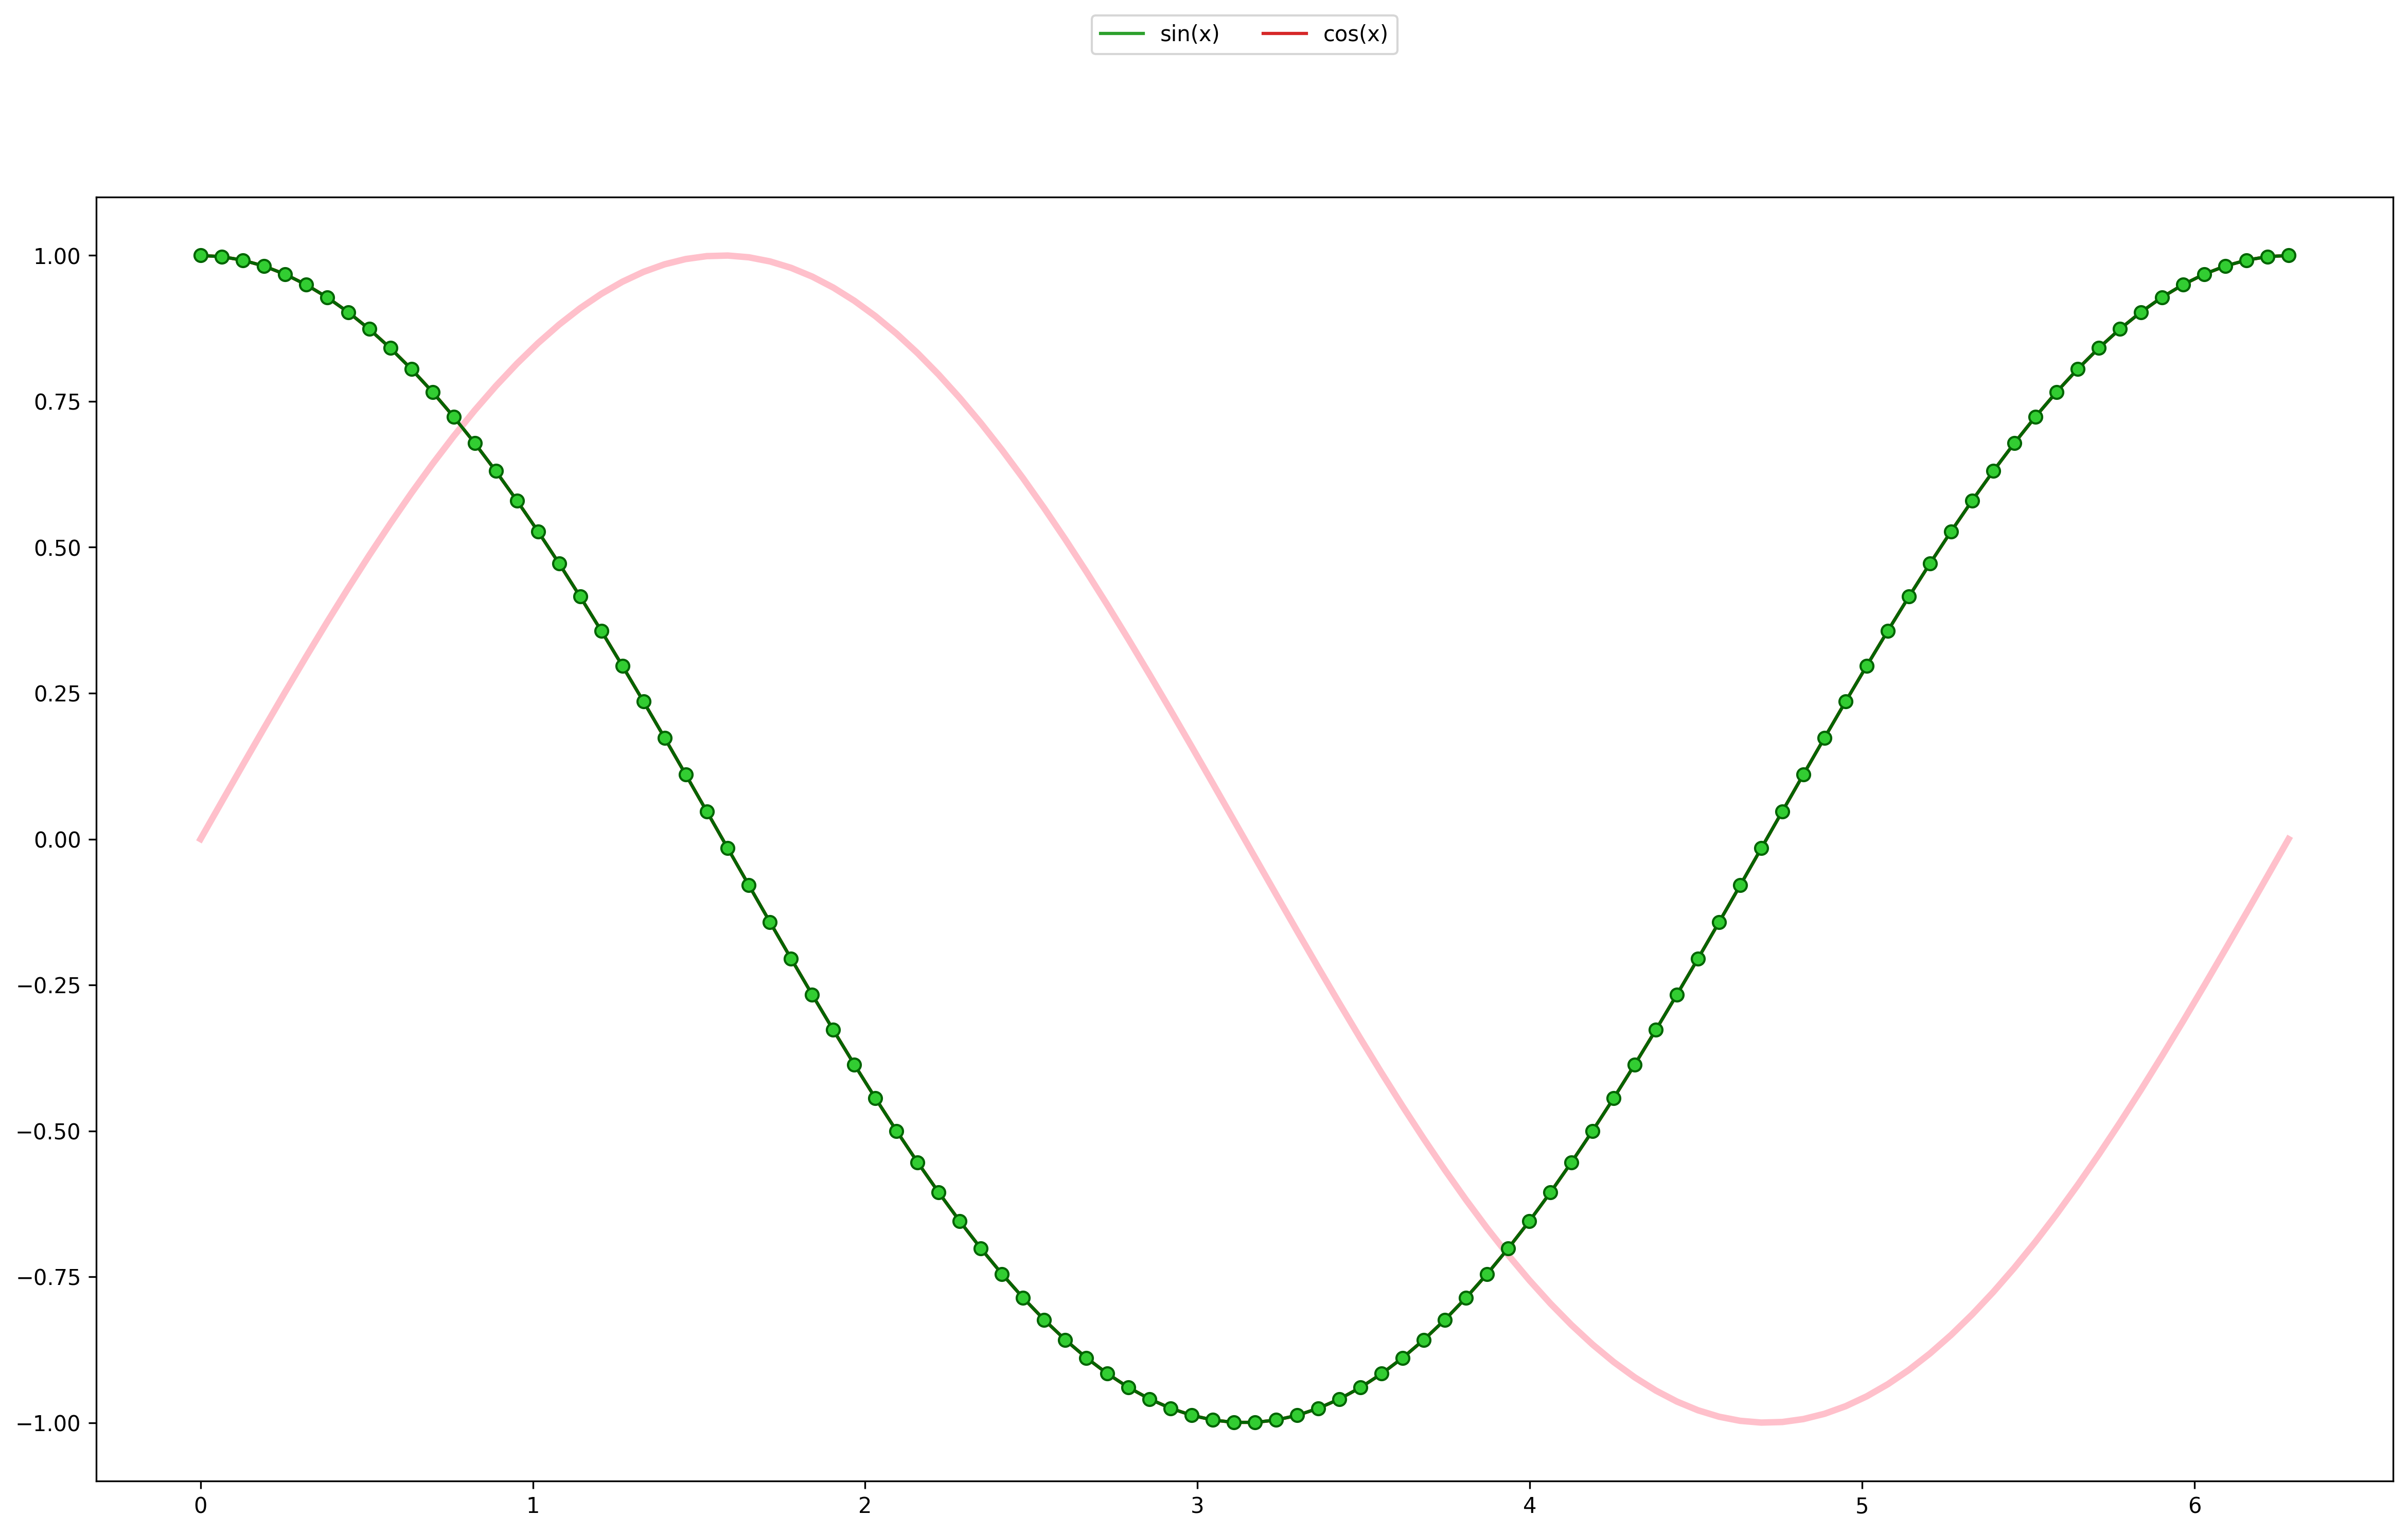

In [120]:
sin_style=dict(linewidth=3,color='pink')
cos_style=dict(marker='o',markerfacecolor='limegreen',color='darkgreen') 
ax.plot(x,sin, label='$f_1(x)=sin(x)$',**sin_style)
ax.plot(x,cos, label='$f_2(x)=cos(x)$',**cos_style)
fig

Acotando ejes
Hay veces que nos interesa definir los límites de los ejes. En ese caso, podemos hacerlo de
una manera muy sencilla:

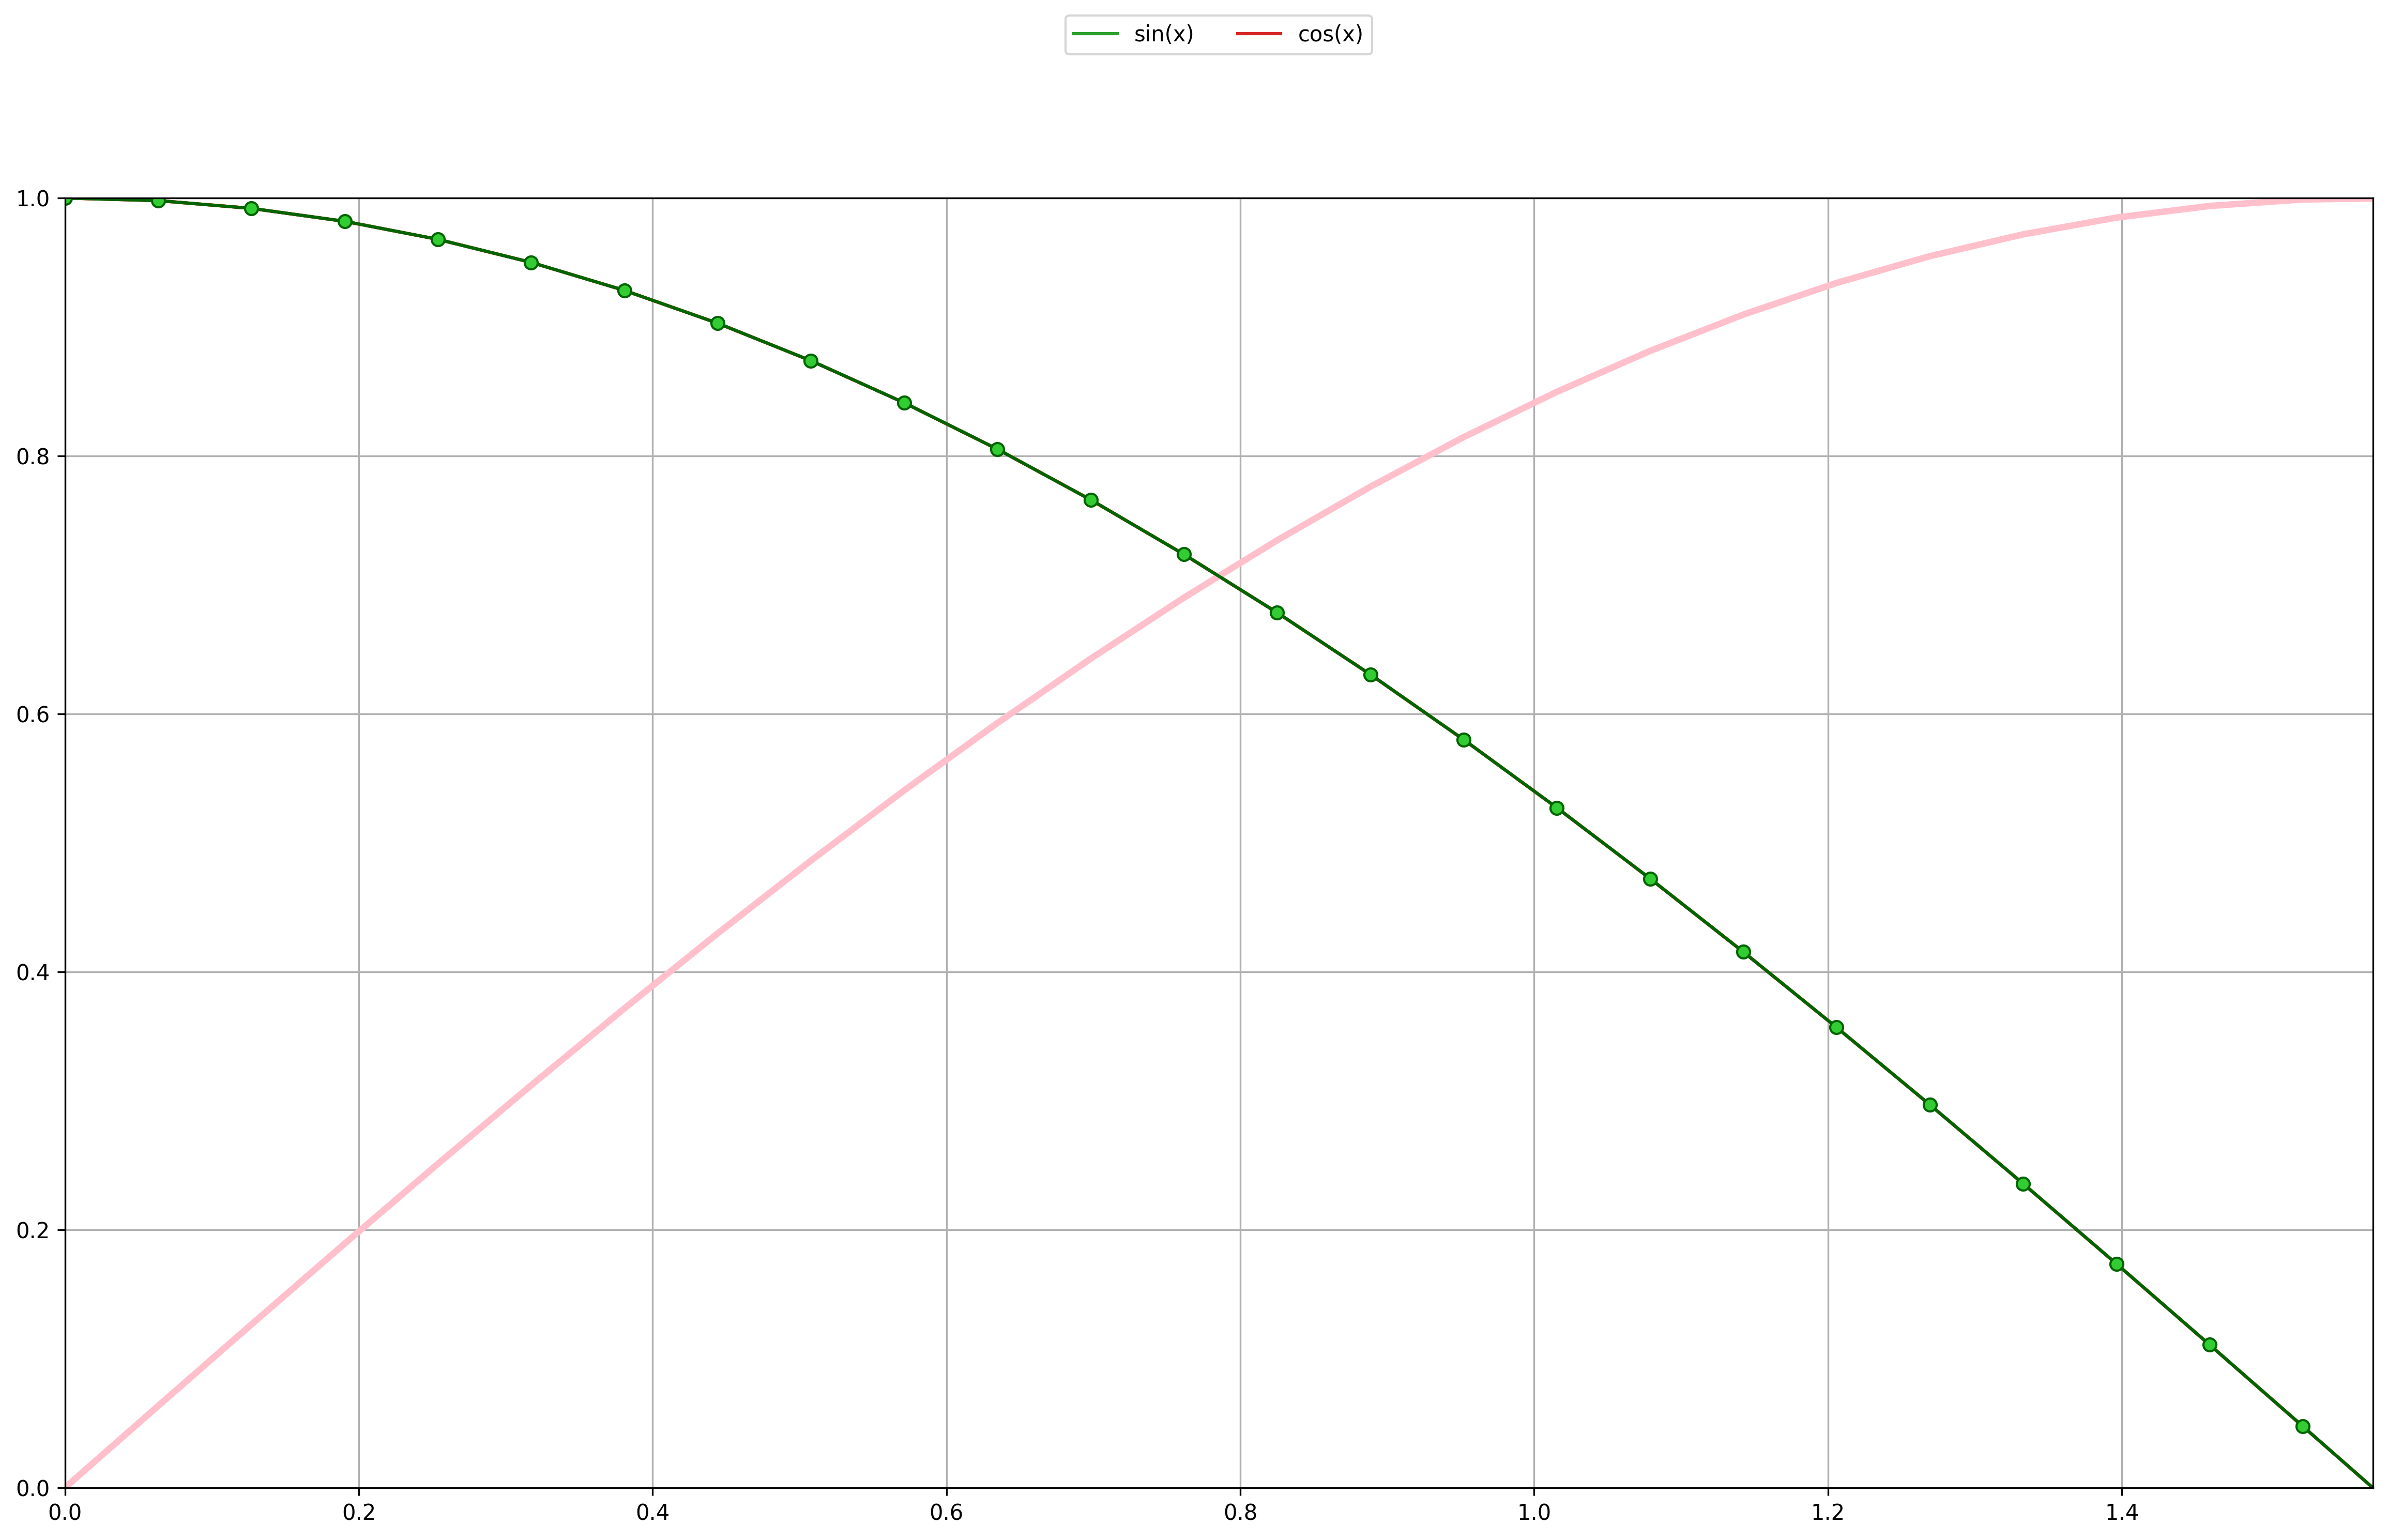

In [121]:
ax.set_xlim(0,np.pi/2)
ax.set_ylim(0,1)
ax.grid() # solo a efectos esteticos
fig


Anotaciones<br>
En ocasiones necesitamos añadir ciertas anotaciones al gráfico que estamos diseñando. Esto
permite destacar áreas o detalles que pueden ser relevantes.

![figura](interseccion.png)

In [122]:
#Para el caso que nos ocupa haríamos 𝑛 = 0 con lo que obtendríamos la siguiente solución:
xsol = np.pi /4 + np.pi * 0
ysol = np.sin(xsol)
xsol,ysol


(0.7853981633974483, 0.7071067811865476)

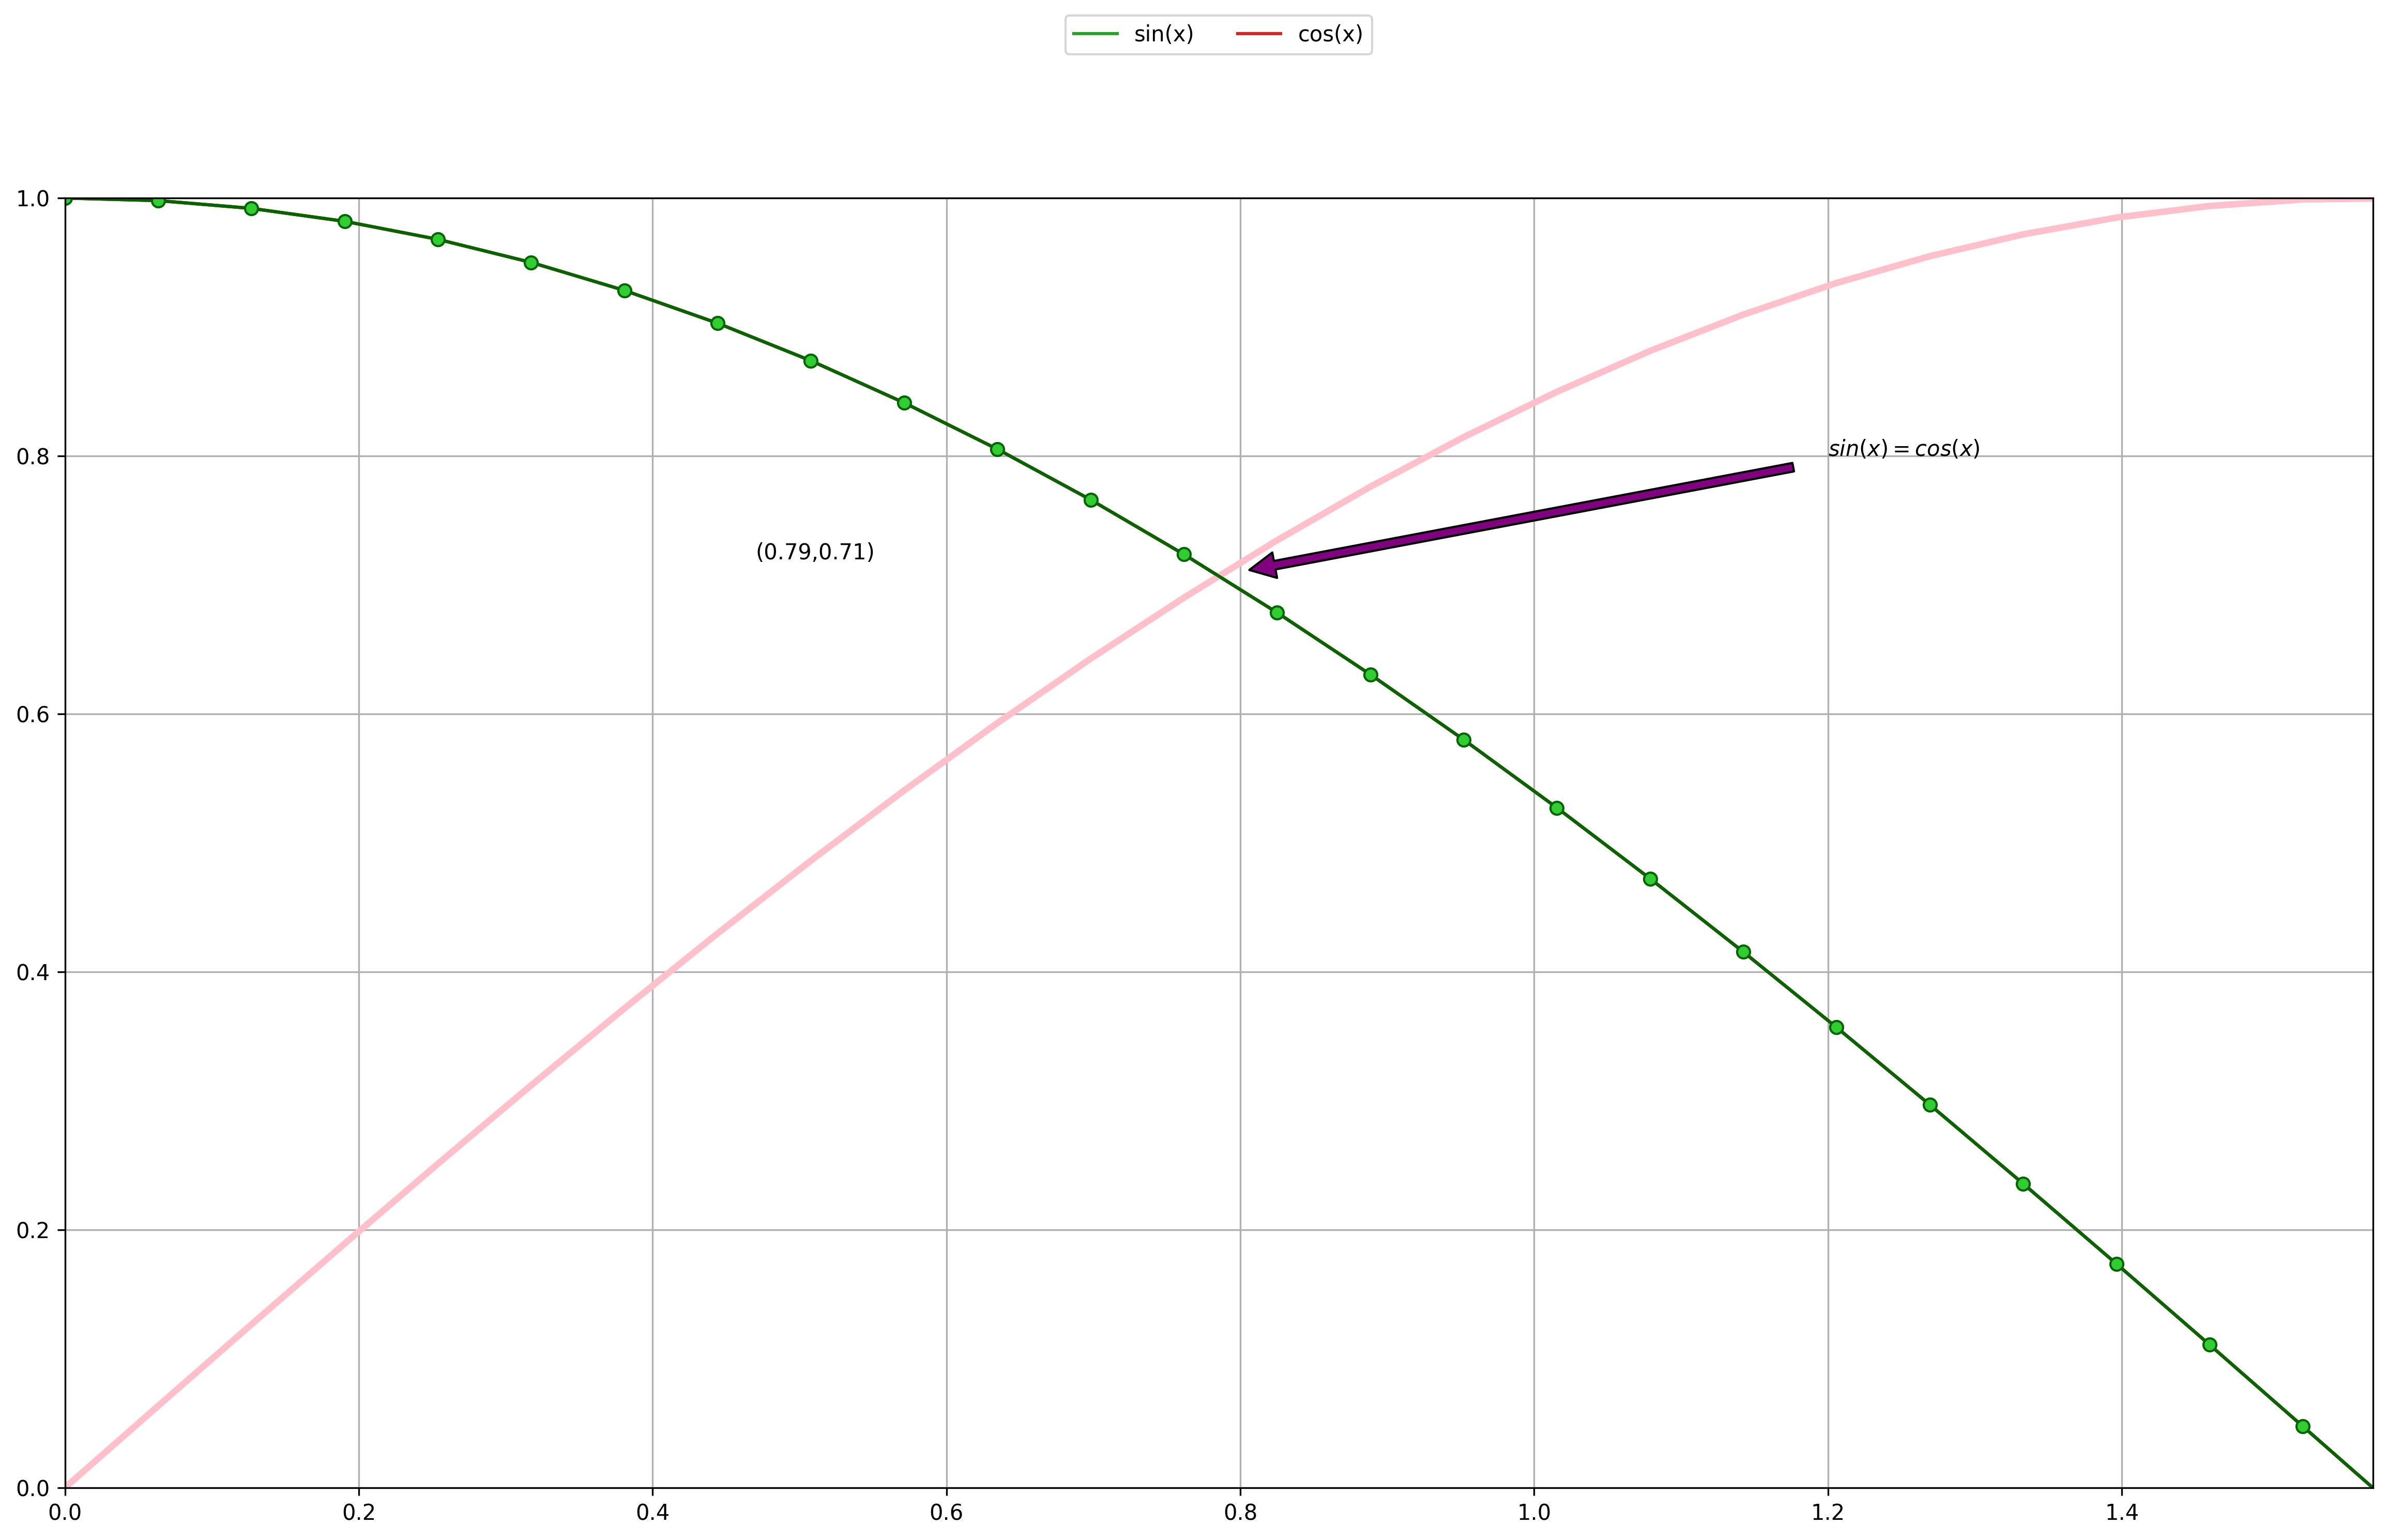

In [123]:
ax.annotate('$sin(x) = cos(x)$',xy=(xsol,ysol),xytext=(1.2,0.8),arrowprops=dict(facecolor='purple',shrink=0.05))
ax.text(0.47,0.72,f'({xsol:.2f},{ysol:.2f})')
fig

Tipos de gráficos<br>
Mediante matplotlib podemos hacer prácticamente cualquier tipo de gráfico. En esta sección
haremos un repaso por algunos de ellos.

Gráficos de barras<br>
Vamos a partir de un «dataset» que contiene los resultados de los Juegos Olímpicos de Tokio
2020. Hemos descargado el fichero medals.xlsx desde una página de Kaggle4.

In [124]:
import pandas as pd
df = pd.read_csv('Tokyo Medals 2021.csv',index_col=0)
df.head()

Gold Medal  Silver Medal  Bronze Medal  Total  \
Country                                                                     
United States of America            39            41            33    113   
People's Republic of China          38            32            18     88   
Japan                               27            14            17     58   
Great Britain                       22            21            22     65   
ROC                                 20            28            23     71   

                            Rank By Total  
Country                                    
United States of America                1  
People's Republic of China              2  
Japan                                   5  
Great Britain                           4  
ROC                                     3

In [125]:
df.tail()

Gold Medal  Silver Medal  Bronze Medal  Total  \
Country                                                               
Ghana                          0             0             1      1   
Grenada                        0             0             1      1   
Kuwait                         0             0             1      1   
Republic of Moldova            0             0             1      1   
Syrian Arab Republic           0             0             1      1   

                      Rank By Total  
Country                              
Ghana                            77  
Grenada                          77  
Kuwait                           77  
Republic of Moldova              77  
Syrian Arab Republic             77

In [126]:
df.columns

Index(['Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total', 'Rank By Total'], dtype='object')

In [127]:
df.rename(columns={'Country':'País','Gold Medal':'Oro','Silver Medal':'Plata','Bronze Medal':'Bronce','Rank By Total':'Rank'},inplace=True)

In [128]:
df.columns

Index(['Oro', 'Plata', 'Bronce', 'Total', 'Rank'], dtype='object')

In [129]:
df.index

Index(['United States of America', 'People's Republic of China', 'Japan',
       'Great Britain', 'ROC', 'Australia', 'Netherlands', 'France', 'Germany',
       'Italy', 'Canada', 'Brazil', 'New Zealand', 'Cuba', 'Hungary',
       'Republic of Korea', 'Poland', 'Czech Republic', 'Kenya', 'Norway',
       'Jamaica', 'Spain', 'Sweden', 'Switzerland', 'Denmark', 'Croatia',
       'Islamic Republic of Iran', 'Serbia', 'Belgium', 'Bulgaria', 'Slovenia',
       'Uzbekistan', 'Georgia', 'Chinese Taipei', 'Turkey', 'Greece', 'Uganda',
       'Ecuador', 'Ireland', 'Israel', 'Qatar', 'Bahamas', 'Kosovo', 'Ukraine',
       'Belarus', 'Romania', 'Venezuela', 'India', 'Hong Kong, China',
       'Philippines', 'Slovakia', 'South Africa', 'Austria', 'Egypt',
       'Indonesia', 'Ethiopia', 'Portugal', 'Tunisia', 'Estonia', 'Fiji',
       'Latvia', 'Thailand', 'Bermuda', 'Morocco', 'Puerto Rico', 'Colombia',
       'Azerbaijan', 'Dominican Republic', 'Armenia', 'Kyrgyzstan', 'Mongolia',
       'Argent

In [130]:
df.head

<bound method NDFrame.head of                             Oro  Plata  Bronce  Total  Rank
Country                                                    
United States of America     39     41      33    113     1
People's Republic of China   38     32      18     88     2
Japan                        27     14      17     58     5
Great Britain                22     21      22     65     4
ROC                          20     28      23     71     3
...                         ...    ...     ...    ...   ...
Ghana                         0      0       1      1    77
Grenada                       0      0       1      1    77
Kuwait                        0      0       1      1    77
Republic of Moldova           0      0       1      1    77
Syrian Arab Republic          0      0       1      1    77

[93 rows x 5 columns]>

Importante: Para la carga de ficheros Excel, es necesario instalar un paquete adicional
denominado openpyxl.

In [131]:

#df=pd.read_excel('xls.xlsx',index_col=0)


A continuación crearemos un gráfico de barras con las medallas de oro, plata y
bronce de los 10 primeros países ordenados por su ranking. Lo primero será crear el
subconjunto de datos sobre el que vamos a trabajar.

In [132]:
df_best = df.nsmallest(10,'Rank')
df_best

Oro  Plata  Bronce  Total  Rank
Country                                                    
United States of America     39     41      33    113     1
People's Republic of China   38     32      18     88     2
ROC                          20     28      23     71     3
Great Britain                22     21      22     65     4
Japan                        27     14      17     58     5
Australia                    17      7      22     46     6
Italy                        10     10      20     40     7
Germany                      10     11      16     37     8
Netherlands                  10     12      14     36     9
France                       10     12      11     33    10

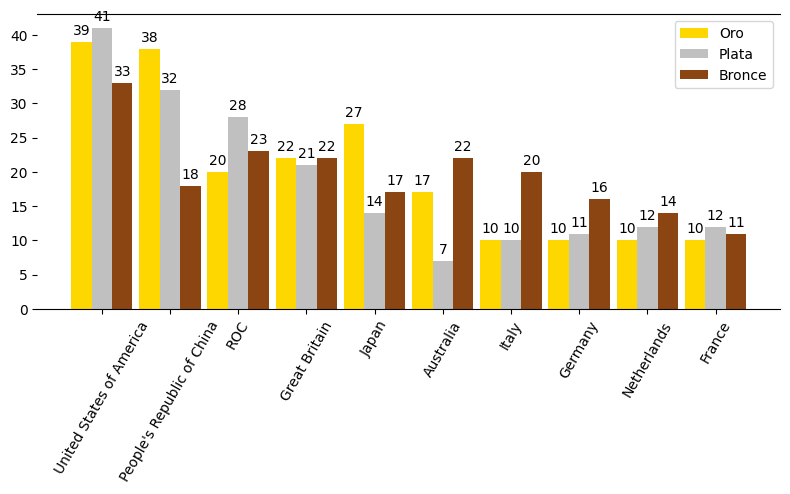

In [133]:
# Ahora el gráfico de Barras
fig, ax = plt.subplots(figsize=(8,5),dpi=100)
bar_width = 0.3
x = np.arange(df_best.index.size)
golden_medals = ax.bar(x - bar_width, df_best['Oro'], bar_width, label='Oro',color='gold')
silver_medals = ax.bar(x, df_best['Plata'], bar_width, label='Plata',color='silver')
bronze_medals = ax.bar(x + bar_width, df_best['Bronce'], bar_width, label='Bronce',color='saddlebrown')
ax.set_xticks(x)
ax.set_xticklabels(df_best.index,rotation=60)
ax.legend()
ax.bar_label(golden_medals, padding=3)
ax.bar_label(silver_medals, padding=3)
ax.bar_label(bronze_medals, padding=3)
ax.spines['right'].set_visible(False) # Elimina el borde derecho
ax.spines['left'].set_visible(False) # oculta el eje izquierdo
fig.tight_layout()# Ajusta el espacio entre los subplots



Partiendo del fichero topl2020.csv que contiene las valoraciones de los lenguajes
de programación más usados durante el año 2020 (según el índice TIOBE), cree el siguiente
gráfico de barras:

In [134]:
df_topl = pd.read_csv('topl2020.csv',index_col=0)
df_topl.head()

ID  Jan 2021  Jan 2020 Programming Language Ratings Annual Change
0   1         1         2                    C  17.38%        +1.61%
1   2         2         1                 Java  11.96%        -4.93%
2   3         3         3               Python  11.72%        +2.01%
3   4         4         4                  C++   7.56%        +1.99%
4   5         5         5                   C#   3.95%        -1.40%

In [135]:
x = np.array(df_topl['Ratings']) 
x

array(['17.38%', '11.96%', '11.72%', '7.56%', '3.95%', '3.84%', '2.20%',
       '1.99%', '1.90%', '1.84%', '1.64%', '1.61%', '1.43%', '1.41%',
       '1.30%', '1.15%', '1.02%', '1.00%', '0.79%', '0.79%'], dtype=object)

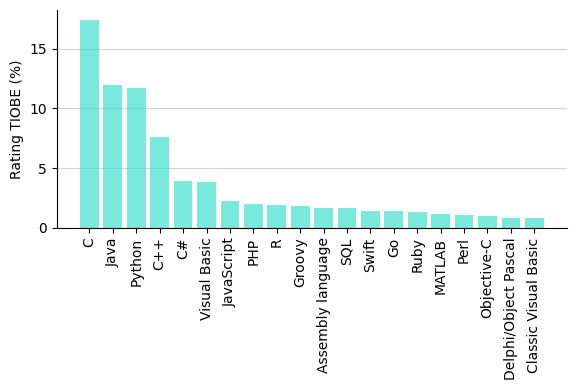

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_topl = pd.read_csv('tiobe-2020-clean.csv',index_col=0)

fig, ax = plt.subplots(figsize=(6, 4), dpi=100)

bar_width = 0.30
x = np.arange(df_topl.index.size)

barplot = ax.bar(x, df_topl['Ratings'], zorder=2, color='turquoise', alpha=0.7)

ax.set_xticks(x)
ax.set_xticklabels(df_topl.index, rotation=90)

ax.yaxis.grid(color='lightgray')
ax.set_ylabel('Rating TIOBE (%)')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()


Gráficos de dispersión<br>
Para este gráfico vamos a usar un «dataset» de jugadores de la NBA 5 extraído desde esta página de Kaggle. El fichero nba-data.csv contiene información desde 1996 hasta 2019.

In [137]:
#En primer lugar cargamos los datos y nos quedamos con un subconjunto de las columnas:
df = pd.read_csv('nba-data.csv', usecols=['pts', 'reb', 'ast'])
df.head()

pts  reb  ast
0  4.8  4.5  0.5
1  0.3  0.8  0.0
2  4.5  1.6  0.9
3  7.8  4.4  1.4
4  3.7  1.6  0.5

El objetivo es crear un gráfico de dispersión en el relacionaremos los puntos anotados con los rebotes capturados, así como las asistencias dadas:

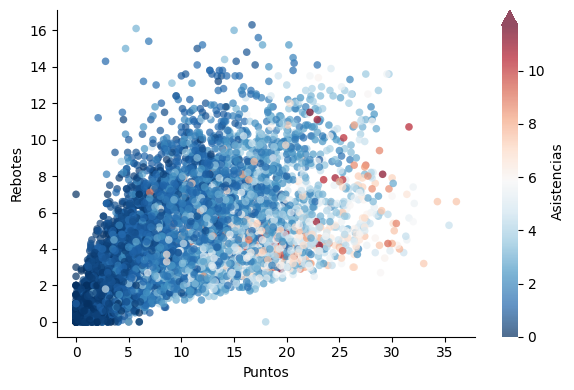

In [138]:
fig,ax=plt.subplots(figsize=(6,4),dpi=100)
# Creamos variables auxiliares para facilitar la lectura del código
x=df['pts']
y=df['reb']
colors = df['ast']
p = ax.scatter(x,y,
               s=30, # Tamaño de los puntos
               c=colors,cmap='RdBu_r', # Colores
               vmin=colors.min(),vmax=colors.max(), # Rango de colores
               alpha=0.7, 
               edgecolors='none')

# Barra de Colores
cb = fig.colorbar(p,ax=ax,label='Asistencias',extend='max')
cb.outline.set_visible(False)

ax.set_xlabel('Puntos')
ax.set_ylabel('Rebotes')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()

Histogramas<br>
En esta ocasión vamos a trabajar con un «dataset» de «Avengers» 6 extraído desde Kaggle. Hemos descargado el fichero avengers.csv.

In [139]:
df = pd.read_csv('avengers.csv', usecols=['Year'])
df.head()

Year
0  1963
1  1963
2  1963
3  1963
4  1963

In [140]:
# Filtramos para quedarnos con años mayores o iguales a 1960
df = df[df['Year']>= 1960]
df.shape

(159, 1)

Ahora ya podemos construir el histograma, que va a representar las frecuencias absolutas de creación de personajes Marvel según su año de creación.<br>

Aunque es posible indicar un número determinado de contenedores («bins»), en este caso vamos a especificar directamente los intervalos (cada 5 años):

In [141]:
df['Year'].min(),df['Year'].max()


(1963, 2015)

In [142]:
bins=np.arange(1960,2021,5)
bins

array([1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010,
       2015, 2020])

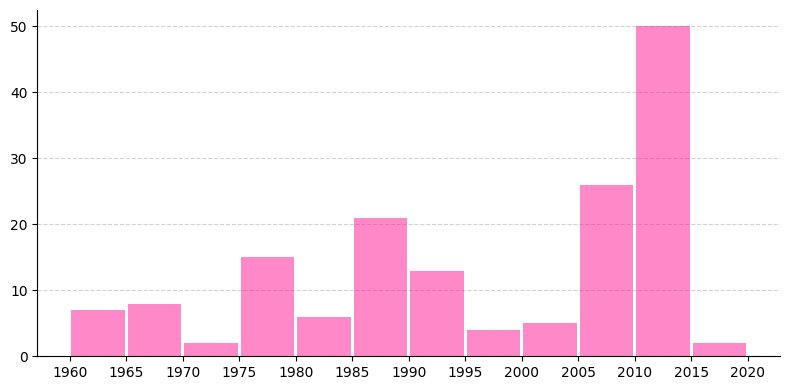

In [143]:
# Creamos el histograma
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)  # 800x400 px

ax.hist(df,
        bins=bins,     # intervalos de agrupación
        rwidth=0.95,   # ancho de cada barra
        zorder=2,      # barras por encima de rejilla
        color='deeppink',
        alpha=0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticks(bins)  # etiquetas de intervalos en el eje x
ax.yaxis.grid(color='lightgray', linestyle='--')  # rejilla

fig.tight_layout()

Partiendo del fichero pokemon.csv que contiene información sobre Pokemon 10, cree el siguiente histograma en el que se analiza el número de personajes «pokemons» en función de su velocidad (columna Speed):

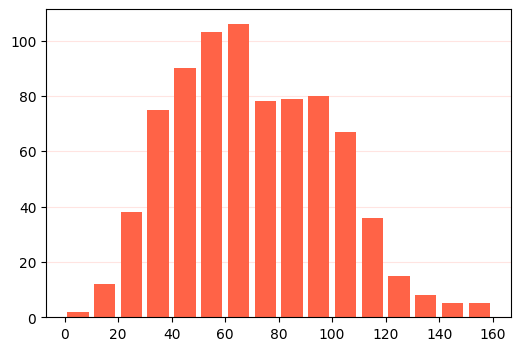

In [144]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('pokemon.csv')

fig, ax = plt.subplots(figsize=(6, 4), dpi=100)
bins = range(0, 161, 10)
ax.hist(df['Speed'], rwidth=0.8, color='tomato', bins=bins, zorder=2)
ax.yaxis.grid(color='mistyrose')


Gráficos para series temporales<br>
Vamos a trabajar con un conjunto de datos extraído desde esta página de Kaggle que contiene información histórica de temperaturas del planeta Tierra. El fichero global-temperatures.csv se ha descargado para su tratamiento.

In [145]:
df = pd.read_csv('global-temperatures.csv',
                 parse_dates=['dt'],  # conversión a tipo datetime
                 usecols=['dt', 'LandAverageTemperature'])

df.rename(columns={'dt': 'when', 'LandAverageTemperature': 'temp'}, inplace=True)
df.dropna(inplace=True)

df.head()



when    temp
0 1750-01-01   3.034
1 1750-02-01   3.083
2 1750-03-01   5.626
3 1750-04-01   8.490
4 1750-05-01  11.573

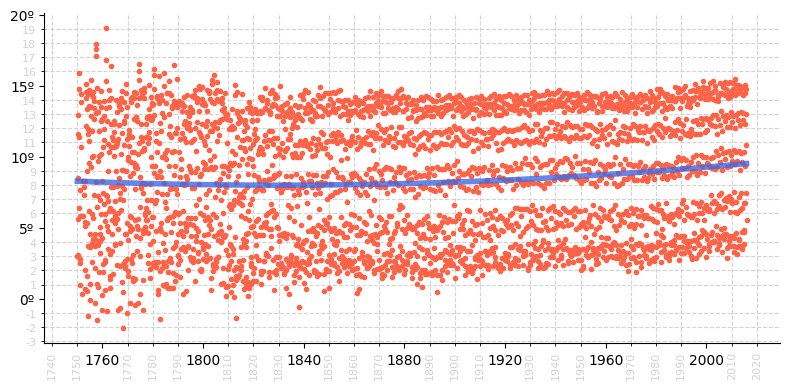

In [146]:
#A continuación montamos un gráfico en el que se representan todas las mediciones históricas 
# de la temperatura media global del planeta y añadimos una línea de tendencia:
# Necesitamos algunas utilidades de gestión de fechas
from matplotlib.dates import YearLocator, DateFormatter, date2num
from matplotlib.ticker import MultipleLocator

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)  # 800x400 px

# Alias para simplificar el acceso
x = df.when
y = df.temp

ax.plot(x, y,
        linestyle='None', marker='.', color='tomato',  # estilo de línea
        zorder=2)  # orden para colocar sobre rejilla

# Construcción de la línea de tendencia
x = date2num(x)
z = np.polyfit(x, y, 2)  # ajuste polinómico de grado 2
p = np.poly1d(z)
plt.plot(x, p(x), linewidth=4, alpha=0.8, color='royalblue')

# Formateo de los ejes
ax.xaxis.set_minor_locator(YearLocator(10))
ax.xaxis.set_minor_formatter(DateFormatter('%Y'))
ax.tick_params(axis='x', which='minor',
               labelsize=8, labelcolor='lightgray', rotation=90)
ax.xaxis.grid(which='minor', color='lightgray', linestyle='dashed')
ax.yaxis.set_major_formatter('{x:.0f}º')
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='y', which='minor',
               labelsize=8, labelcolor='lightgray')
ax.yaxis.grid(which='minor', linestyle='dashed', color='lightgray')
ax.yaxis.set_minor_formatter('{x:.0f}')
ax.tick_params(axis='y', which='minor', labelsize=8, labelcolor='lightgray')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.tight_layout()

Mapas de calor<br>
Para este tipo de gráfico vamos a utilizar un «dataset» que recoge las 1000 películas más valoradas en IMDB 7. Está sacado desde esta página de Kaggle y se ha descargado el fichero de datos en imdb-top-1000.csv.

En primer lugar vamos a cargar los datos quedándonos con las columnas Certificate (clasificación de la película según edades), Genre (géneros de la película) e IMDB_Rating (valoración de la película en IMDB):

In [147]:
df = pd.read_csv('imdb-top-1000.csv',
                 usecols=['Certificate', 'Genre', 'IMDB_Rating','Series_Title','Released_Year','Director'])

df.head()

Series_Title Released_Year Certificate                 Genre  \
0  The Shawshank Redemption          1994           A                 Drama   
1             The Godfather          1972           A          Crime, Drama   
2           The Dark Knight          2008          UA  Action, Crime, Drama   
3    The Godfather: Part II          1974           A          Crime, Drama   
4              12 Angry Men          1957           U          Crime, Drama   

   IMDB_Rating              Director  
0          9.3        Frank Darabont  
1          9.2  Francis Ford Coppola  
2          9.0     Christopher Nolan  
3          9.0  Francis Ford Coppola  
4          9.0          Sidney Lumet

Ahora creamos una nueva columna en el DataFrame donde guardaremos únicamente el género principal de cada película:

In [148]:
df['Main_Genre'] = df['Genre'].str.split(',', expand=True)[0]

df.head()


Series_Title Released_Year Certificate                 Genre  \
0  The Shawshank Redemption          1994           A                 Drama   
1             The Godfather          1972           A          Crime, Drama   
2           The Dark Knight          2008          UA  Action, Crime, Drama   
3    The Godfather: Part II          1974           A          Crime, Drama   
4              12 Angry Men          1957           U          Crime, Drama   

   IMDB_Rating              Director Main_Genre  
0          9.3        Frank Darabont      Drama  
1          9.2  Francis Ford Coppola      Crime  
2          9.0     Christopher Nolan     Action  
3          9.0  Francis Ford Coppola      Crime  
4          9.0          Sidney Lumet      Crime

In [149]:
#A continuación agrupamos y obtenemos los valores medios de las valoraciones:
# unstack permite disponer la agrupación en forma tabular (para el heatmap)
ratings = df.groupby(['Certificate', 'Main_Genre'])['IMDB_Rating'].mean().unstack()

# Nos quedamos con un subconjunto de certificados y géneros
review_certificates = ['U', 'UA', 'PG-13', 'R', 'A']
review_genres = ['Animation', 'Action', 'Adventure', 'Biography',
                 'Comedy', 'Crime', 'Drama']
ratings = ratings.loc[review_certificates, review_genres]

# Recodificamos los certificados (clasificación) con códigos más entendibles
certs_description = {'U': 'ALL', 'UA': '>12', 'PG-13': '>13', 'R': '>17', 'A': '>18'}
ratings.index = ratings.reset_index()['Certificate'].replace(certs_description)

ratings


Main_Genre   Animation    Action  Adventure  Biography    Comedy     Crime  \
Certificate                                                                  
ALL           7.947368  8.165000   7.953571   7.862500  7.940541  8.200000   
>12           7.883333  7.992424   7.958333   7.971429  7.885714  7.900000   
>13           7.866667  7.783333   7.600000   7.862500  7.785714  8.000000   
>17           7.800000  7.812500   7.900000   7.900000  7.824138  7.814286   
>18           7.866667  7.873171   7.912500   8.017647  7.877778  8.130233   

Main_Genre      Drama  
Certificate            
ALL          7.976364  
>12          7.953659  
>13          7.775000  
>17          7.915094  
>18          8.036364

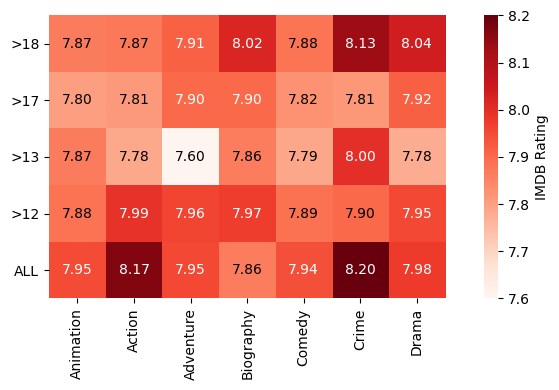

In [150]:
#Ahora ya podemos construir el mapa de calor usando el DataFrame ratings generado previamente:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)

text_colors = ('black', 'white')
im = ax.imshow(ratings, cmap='Reds')  # mapa de calor
cbar = fig.colorbar(im, ax=ax, label='IMDB Rating')  # leyenda
cbar.outline.set_visible(False)

x = ratings.columns
y = ratings.index

# Mostrar las etiquetas. El color del texto cambia en función de su normalización
for i in range(len(y)):
    for j in range(len(x)):
        value = ratings.iloc[i, j]
        text_color = text_colors[int(im.norm(value) > 0.5)]  # color etiqueta
        ax.text(j, i, f'{value:.2f}', color=text_color, va='center', ha='center')

# Formateo de los ejes
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90)
ax.set_yticks(range(len(y)))
ax.set_yticklabels(y)
ax.invert_yaxis()

ax.spines[:].set_visible(False)

fig.tight_layout()

Diagramas de caja<br>
Un diagrama de caja permite visualizar la distribución de los valores de manera rápida y muy visual:

![DiagramadeCaja](diagramadecaja.png)

Para mostrar el funcionamiento de los diagramas de caja en Matplotlib vamos a hacer uso de distintas distribuciones aleatorias que crearemos mediante funciones de Numpy:

In [151]:
DIST_SIZE = 100  # tamaño de la muestra

boxplots = []

boxplots.append(dict(
    dist=np.random.normal(0, 1, size=DIST_SIZE),
    label='Normal\n$\mu=0, \sigma=1$',
    fill_color='pink',
    brush_color='deeppink'))

boxplots.append(dict(
    dist=np.random.geometric(0.4, size=DIST_SIZE),
    label='Geometric\n$p=0.4$',
    fill_color='lightblue',
    brush_color='navy'))

boxplots.append(dict(
    dist=np.random.chisquare(2, size=DIST_SIZE),
    label='Chi-squared\n$df=2$',
    fill_color='lightgreen',
    brush_color='darkgreen'))
boxplots

[{'dist': array([ 0.00421247,  0.31638248,  2.0450778 , -0.49903386, -0.62423792,
         -0.75974316, -0.42647785, -1.36388   , -0.76098669,  0.83380628,
          0.90293054,  1.16359474,  0.26524044, -0.73342845,  0.71783889,
          0.2331342 ,  0.45578999,  0.0868164 , -0.9952944 , -0.18775862,
          2.25013669, -0.85633177, -0.66718764,  1.54297066,  0.76041613,
         -1.92252801, -0.24235423, -0.08392829,  2.21037172,  0.12018044,
         -1.74662476,  0.29737716, -0.19687299, -1.70233696, -1.5030934 ,
         -0.61874733, -2.23351269, -0.95544992, -0.65512782, -0.81516437,
         -1.26271004,  0.29362048, -2.53248245, -0.06052073, -1.39718948,
         -0.68001791,  1.11151709,  0.76320516,  0.52244286,  0.59596892,
         -1.57974201, -0.61343973,  1.68804536,  0.05283514, -0.32955344,
         -1.24215326,  1.42310679, -1.28992816,  0.35520772,  0.55078401,
         -1.05263429,  0.75652456, -1.55954365,  0.52226393, -0.79725589,
          0.72008033, -0.76605

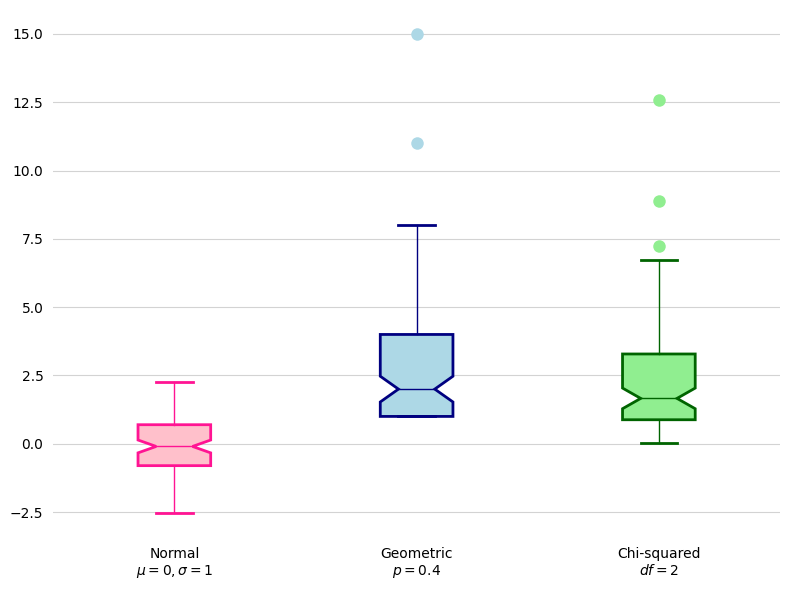

In [152]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)  # 800x600 px

for i, boxplot in enumerate(boxplots):
    fcolor, bcolor = boxplot['fill_color'], boxplot['brush_color']
    ax.boxplot(boxplot['dist'],
               labels=[boxplot['label']],
               positions=[i],
               widths=[.3],
               notch=True,
               patch_artist=True,
               boxprops=dict(edgecolor=bcolor,
                             facecolor=fcolor,
                             linewidth=2),
               capprops=dict(color=bcolor, linewidth=2),
               flierprops=dict(color=bcolor,
                               markerfacecolor=fcolor,
                               linestyle='none',
                               markeredgecolor='none',
                               markersize=9),
               medianprops=dict(color=bcolor),
               whiskerprops=dict(color=bcolor,
                                 linewidth=1))

ax.yaxis.grid(color='lightgray')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.spines[:].set_visible(False)

fig.tight_layout()

Gráficos de evolución<br>
Partiendo de un conjunto de datos temporales, vamos a aprovechar para elaborar un gráfico de evolución del precio de criptomonedas. En esta ocasión hemos utilizado el «dataset» eth-usd.csv descargado desde esta página de Kaggle. Contiene la valoración de la criptomoneda Ethereum en función de una marca temporal, así como el volumen de «moneda» existente en cada momento.<br>

El objetivo será crear un gráfico que represente el valor de la criptomoneda (a lo largo del tiempo) en contraposición al volumen de unidades.<br>

Lo primero que haremos, además de cargar los datos, será lo siguiente:<br>

Seleccionar las columnas Date (fecha de referencia), Open (precio de la moneda a la apertura) y Volume (volumen de moneda).<br>
<br>
Parsear el campo fecha.<br>

Filtrar sólo aquellos registros a partir del 1 de enero de 2017 (por simplicidad).<br>

Dividir la columna de volumen por 10M de cara a equiparar cantidades con la valoración (ajuste de gráfico).<br>

Aplicar una media móvil para suavizar las curvas a representar.<br>

In [153]:
import datetime

df = pd.read_csv('eth-usd.csv',
                  parse_dates=['Date'],
                  usecols=['Date', 'Open', 'Volume'],
                  index_col='Date')

min_date = datetime.datetime(year=2017, month=1, day=1)
df = df.loc[df.index > min_date]

df['Volume'] /= 1e7

df_smooth = df.rolling(20).mean().dropna()

df_smooth.head()


Open    Volume
Date                           
2017-01-21   9.968611  2.146882
2017-01-22  10.105573  2.117377
2017-01-23  10.222339  1.985587
2017-01-24  10.273270  1.821968
2017-01-25  10.239854  1.647938

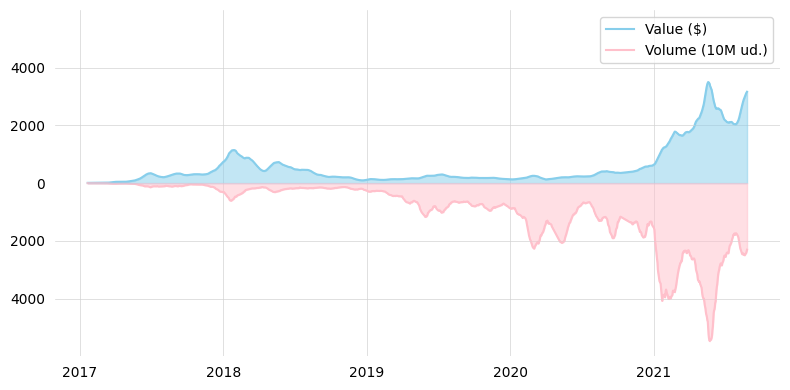

In [154]:
#Ahora ya podemos montar el gráfico dedicando algo de esfuerzo a la parte estética:
fig, ax = plt.subplots(figsize=(8, 4), dpi=100)  # 800x400px

# Alias para facilitar el acceso
x = df_smooth.index
y_open = df_smooth['Open']
y_vol = df_smooth['Volume']

# Líneas de evolución
ax.plot(x, y_open, label='Value ($)', color='skyblue', linewidth=1.5)
ax.plot(x, -y_vol, label='Volume (10M ud.)', color='pink', linewidth=1.5)
# Relleno del área
plt.fill_between(x, y_open, alpha=0.5, color='skyblue', zorder=3)
plt.fill_between(x, -y_vol, alpha=0.5, color='pink', zorder=3)

# Formateo de los ejes
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
y_ticks = [-4000, -2000, 0, 2000, 4000]
y_tick_labels = ['4000', '2000', '0', '2000', '4000']
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)
ax.set_ylim(-6000, 6000)

# Rejilla
ax.xaxis.grid(color='lightgray', linewidth=.5)
for y_tick in y_ticks:
    if y_tick != 0:
        ax.axhline(y_tick, color='lightgray', linewidth=.5)

ax.legend()
ax.spines[:].set_visible(False)

fig.tight_layout()

Scraping<br>
Si bien existen multitud de datos estructurados en forma de ficheros, hay otros muchos que están embebidos en páginas web y que están preparados para ser visualizados mediante un navegador.

Sin embargo, las técnicas de «scraping» nos permiten extraer este tipo de información web para convertirla en datos estructurados con los que poder trabajar de forma más cómoda.

Los paquetes que veremos en este capítulo bien podrían estar incluidos en otras temáticas, ya que no sólo se utilizan para «scraping».

